In [0]:
# save the dataset in the files before continuing. 

In [0]:
!pip install talos

In [0]:
# LSTM for electricity forecasting problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# Helper Function
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# fix random seed for reproducibility
numpy.random.seed(42)

In [0]:
# load the dataset take only load values 
dataframe = read_csv('/Users/pratik moghe/Documents/final.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# reshape into X=t and Y=t+1 i.e. train 48 values predict 49th value
look_back = 48
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
trainX[:2]

array([[[0.44517192, 0.40456685, 0.33808872, 0.2824142 , 0.24000764,
         0.2059764 , 0.17291117, 0.14637181, 0.12454566, 0.11055249,
         0.09825933, 0.09205115, 0.0992319 , 0.10687482, 0.11116511,
         0.12622857, 0.13813129, 0.17776644, 0.22705534, 0.28718108,
         0.3614662 , 0.4180936 , 0.48298654, 0.5364871 , 0.5533575 ,
         0.59870887, 0.61694515, 0.61078644, 0.57459414, 0.55255866,
         0.555604  , 0.56142485, 0.60079134, 0.70079577, 0.75462794,
         0.78949857, 0.77214587, 0.76662624, 0.7442137 , 0.7003666 ,
         0.67101955, 0.662133  , 0.6446836 , 0.6293764 , 0.57999694,
         0.53487265, 0.50145745, 0.45074025]],

       [[0.40456685, 0.33808872, 0.2824142 , 0.24000764, 0.2059764 ,
         0.17291117, 0.14637181, 0.12454566, 0.11055249, 0.09825933,
         0.09205115, 0.0992319 , 0.10687482, 0.11116511, 0.12622857,
         0.13813129, 0.17776644, 0.22705534, 0.28718108, 0.3614662 ,
         0.4180936 , 0.48298654, 0.5364871 , 0.5533575 

In [0]:
testX[:2]

array([[[0.33504984, 0.3328893 , 0.3418539 , 0.36403093, 0.39719066,
         0.4226267 , 0.4509708 , 0.4559655 , 0.41780266, 0.3840185 ,
         0.3888786 , 0.4141325 , 0.42492548, 0.4770517 , 0.5130446 ,
         0.47485742, 0.41442224, 0.3478727 , 0.2844821 , 0.21223521,
         0.15017018, 0.10865381, 0.07180822, 0.04721531, 0.03056325,
         0.02269764, 0.01902889, 0.01635486, 0.01416542, 0.01583104,
         0.02186877, 0.0425663 , 0.07608619, 0.10627842, 0.19464922,
         0.28171444, 0.3282934 , 0.31972823, 0.34415123, 0.35488108,
         0.36245784, 0.35523894, 0.35871014, 0.34592238, 0.36394873,
         0.38177237, 0.3674151 , 0.33679858]],

       [[0.3328893 , 0.3418539 , 0.36403093, 0.39719066, 0.4226267 ,
         0.4509708 , 0.4559655 , 0.41780266, 0.3840185 , 0.3888786 ,
         0.4141325 , 0.42492548, 0.4770517 , 0.5130446 , 0.47485742,
         0.41442224, 0.3478727 , 0.2844821 , 0.21223521, 0.15017018,
         0.10865381, 0.07180822, 0.04721531, 0.03056325

In [0]:
# Defining parameters

# Parameters for test runs. 
# p = {
#     'first_neurons': [2],
#     'optimizer': ['adam'], 
#     'epochs': [20],
#     'batch_size': [30, 40]
# }

# parameters for final Round
p = {
    'first_neurons': [2, 4, 8],
    'optimizer': ['adam'], 
    'epochs': [20, 35, 50, 100, 200],
    'batch_size': [1, 2, 4, 6, 8, 10, 20, 40]
}

In [0]:
def lstm_model(trainX, trainY, testX, testY, params):
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(params['first_neurons'] , input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_percentage_error', optimizer=params['optimizer'])
    # train model
    out = model.fit(trainX, trainY, epochs=params['epochs'], batch_size=params['batch_size'], verbose=2)

    return out, model

In [0]:
import talos

In [0]:
scan_object = talos.Scan(x = trainX,
                         y = trainY,
                         model = lstm_model,
                         params = p,
                         experiment_name = 'lstm_hyp_opt')

  0%|                                                                                          | 0/120 [00:00<?, ?it/s]





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





 - 37s - loss: 1807.2947
Epoch 2/20
 - 33s - loss: 16692.9436
Epoch 3/20
 - 33s - loss: 3245.3262
Epoch 4/20
 - 32s - loss: 12581.5181
Epoch 5/20
 - 32s - loss: 714.3478
Epoch 6/20
 - 32s - loss: 16825.0624
Epoch 7/20
 - 33s - loss: 767.3775
Epoch 8/20
 - 33s - loss: 15830.0222
Epoch 9/20
 - 37s - loss: 732.0374
Epoch 10/20
 - 32s - loss: 9532.0252
Epoch 11/20
 - 33s - loss: 5265.7421
Epoch 12/20
 - 37s - loss: 10942.6690
Epoch 13/20
 - 36s - loss: 799.3583
Epoch 14/20
 - 33s - loss: 14132.7514
Epoch 15/20
 - 38s - loss: 802.0855
Epoch 16/20
 - 40s - loss: 14498.3100
Epoch 17/20
 - 40s - loss: 673.9167
Epoch 18/20
 - 39s - loss: 14758.3669
Epoch 19/20
 - 41s - loss: 756.7654
Epoch 20/20
 - 41s - loss: 9926.6176




  1%|▋                                                                             | 1/120 [11:59<23:46:47, 719.39s/it]

Epoch 1/20
 - 34s - loss: 522.6019
Epoch 2/20
 - 33s - loss: 16998.7426
Epoch 3/20
 - 39s - loss: 449.1218
Epoch 4/20
 - 37s - loss: 1867.0369
Epoch 5/20
 - 37s - loss: 18553.5597
Epoch 6/20
 - 39s - loss: 2113.8627
Epoch 7/20
 - 35s - loss: 6702.6332
Epoch 8/20
 - 34s - loss: 11229.7702
Epoch 9/20
 - 34s - loss: 507.4217
Epoch 10/20
 - 33s - loss: 4606.5085
Epoch 11/20
 - 34s - loss: 8113.5459
Epoch 12/20
 - 33s - loss: 1350.7346
Epoch 13/20
 - 33s - loss: 11006.8346
Epoch 14/20
 - 33s - loss: 1547.6240
Epoch 15/20
 - 34s - loss: 7408.7392
Epoch 16/20
 - 33s - loss: 3040.8555
Epoch 17/20
 - 34s - loss: 5794.9522
Epoch 18/20
 - 33s - loss: 4552.8118
Epoch 19/20
 - 34s - loss: 120.6541
Epoch 20/20
 - 34s - loss: 16999.8660


  2%|█▎                                                                            | 2/120 [23:33<23:19:39, 711.69s/it]

Epoch 1/20
 - 39s - loss: 1260.2266
Epoch 2/20
 - 38s - loss: 35638.6812
Epoch 3/20
 - 38s - loss: 1122.9700
Epoch 4/20
 - 39s - loss: 23131.6862
Epoch 5/20
 - 40s - loss: 1189.3880
Epoch 6/20
 - 37s - loss: 15053.0356
Epoch 7/20
 - 40s - loss: 2504.8331
Epoch 8/20
 - 40s - loss: 347.7516
Epoch 9/20
 - 26s - loss: 23963.9707
Epoch 10/20
 - 22s - loss: 767.9899
Epoch 11/20
 - 23s - loss: 19146.6562
Epoch 12/20
 - 24s - loss: 5869.0312
Epoch 13/20
 - 25s - loss: 253.4303
Epoch 14/20
 - 26s - loss: 19182.1635
Epoch 15/20
 - 23s - loss: 138.7018
Epoch 16/20
 - 23s - loss: 71.3525
Epoch 17/20
 - 24s - loss: 23797.6566
Epoch 18/20
 - 24s - loss: 234.0554
Epoch 19/20
 - 24s - loss: 24233.1803
Epoch 20/20
 - 23s - loss: 2787.4800


  2%|█▉                                                                            | 3/120 [33:32<22:02:16, 678.09s/it]

Epoch 1/35
 - 23s - loss: 727.7620
Epoch 2/35
 - 21s - loss: 11167.3098
Epoch 3/35
 - 21s - loss: 195.4736
Epoch 4/35
 - 20s - loss: 7195.7605
Epoch 5/35
 - 20s - loss: 1723.9130
Epoch 6/35
 - 20s - loss: 6132.6457
Epoch 7/35
 - 25s - loss: 1473.7708
Epoch 8/35
 - 24s - loss: 8078.3898
Epoch 9/35
 - 26s - loss: 1418.9339
Epoch 10/35
 - 27s - loss: 6558.0329
Epoch 11/35
 - 24s - loss: 1261.3844
Epoch 12/35
 - 22s - loss: 6602.8447
Epoch 13/35
 - 20s - loss: 1368.3957
Epoch 14/35
 - 23s - loss: 4360.3419
Epoch 15/35
 - 25s - loss: 1540.0184
Epoch 16/35
 - 24s - loss: 5244.9435
Epoch 17/35
 - 22s - loss: 2559.8980
Epoch 18/35
 - 24s - loss: 2687.7820
Epoch 19/35
 - 23s - loss: 5410.2185
Epoch 20/35
 - 22s - loss: 556.5114
Epoch 21/35
 - 26s - loss: 6408.5726
Epoch 22/35
 - 25s - loss: 812.9513
Epoch 23/35
 - 24s - loss: 6003.0045
Epoch 24/35
 - 19s - loss: 1105.8665
Epoch 25/35
 - 20s - loss: 6684.7037
Epoch 26/35
 - 19s - loss: 899.7132
Epoch 27/35
 - 18s - loss: 4327.4333
Epoch 28/35
 -

  3%|██▌                                                                           | 4/120 [46:10<22:36:56, 701.87s/it]

Epoch 1/35
 - 18s - loss: 1924.5851
Epoch 2/35
 - 18s - loss: 11108.8639
Epoch 3/35
 - 19s - loss: 1057.7864
Epoch 4/35
 - 21s - loss: 9172.7455
Epoch 5/35
 - 21s - loss: 1203.9122
Epoch 6/35
 - 19s - loss: 5116.6827
Epoch 7/35
 - 19s - loss: 1242.2081
Epoch 8/35
 - 20s - loss: 221.9206
Epoch 9/35
 - 19s - loss: 2527.0479
Epoch 10/35
 - 21s - loss: 11320.3501
Epoch 11/35
 - 20s - loss: 3451.0559
Epoch 12/35
 - 19s - loss: 14025.1101
Epoch 13/35
 - 20s - loss: 2345.7311
Epoch 14/35
 - 20s - loss: 431.7683
Epoch 15/35
 - 21s - loss: 203.8604
Epoch 16/35
 - 20s - loss: 23087.6684
Epoch 17/35
 - 20s - loss: 1281.2218
Epoch 18/35
 - 20s - loss: 16748.2637
Epoch 19/35
 - 20s - loss: 371.8237
Epoch 20/35
 - 20s - loss: 10443.2367
Epoch 21/35
 - 19s - loss: 9416.9009
Epoch 22/35
 - 20s - loss: 8745.3528
Epoch 23/35
 - 20s - loss: 471.6070
Epoch 24/35
 - 20s - loss: 25001.5246
Epoch 25/35
 - 19s - loss: 413.2273
Epoch 26/35
 - 20s - loss: 26408.3569
Epoch 27/35
 - 19s - loss: 682.3534
Epoch 28/

  4%|███▎                                                                          | 5/120 [57:40<22:18:22, 698.28s/it]

Epoch 1/35
 - 19s - loss: 453.6084
Epoch 2/35
 - 20s - loss: 10253.3794
Epoch 3/35
 - 18s - loss: 7891.7462
Epoch 4/35
 - 20s - loss: 7924.5144
Epoch 5/35
 - 23s - loss: 8704.0303
Epoch 6/35
 - 16s - loss: 410.3964
Epoch 7/35
 - 18s - loss: 12694.6798
Epoch 8/35
 - 17s - loss: 309.2541
Epoch 9/35
 - 17s - loss: 1391.0866
Epoch 10/35
 - 17s - loss: 870.7486
Epoch 11/35
 - 17s - loss: 1275.1814
Epoch 12/35
 - 17s - loss: 23547.2924
Epoch 13/35
 - 18s - loss: 123.6482
Epoch 14/35
 - 17s - loss: 3385.8131
Epoch 15/35
 - 17s - loss: 1590.5170
Epoch 16/35
 - 17s - loss: 17126.8128
Epoch 17/35
 - 17s - loss: 2155.8730
Epoch 18/35
 - 17s - loss: 1794.5583
Epoch 19/35
 - 17s - loss: 15254.5210
Epoch 20/35
 - 17s - loss: 1425.3778
Epoch 21/35
 - 17s - loss: 1724.8241
Epoch 22/35
 - 18s - loss: 14845.2487
Epoch 23/35
 - 17s - loss: 1741.1094
Epoch 24/35
 - 17s - loss: 9396.1670
Epoch 25/35
 - 17s - loss: 916.0466
Epoch 26/35
 - 17s - loss: 18110.0304
Epoch 27/35
 - 17s - loss: 1073.1100
Epoch 28/

  5%|███▊                                                                        | 6/120 [1:07:58<21:21:26, 674.45s/it]

Epoch 1/50
 - 19s - loss: 2835.8595
Epoch 2/50
 - 18s - loss: 5055.5530
Epoch 3/50
 - 18s - loss: 5498.8804
Epoch 4/50
 - 18s - loss: 188.0666
Epoch 5/50
 - 18s - loss: 5982.3730
Epoch 6/50
 - 18s - loss: 833.4039
Epoch 7/50
 - 18s - loss: 872.0845
Epoch 8/50
 - 18s - loss: 6304.3077
Epoch 9/50
 - 19s - loss: 1043.1174
Epoch 10/50
 - 18s - loss: 9558.3734
Epoch 11/50
 - 18s - loss: 750.4838
Epoch 12/50
 - 18s - loss: 7140.7103
Epoch 13/50
 - 18s - loss: 627.0551
Epoch 14/50
 - 18s - loss: 275.7539
Epoch 15/50
 - 18s - loss: 7390.3343
Epoch 16/50
 - 18s - loss: 341.2042
Epoch 17/50
 - 17s - loss: 1036.5354
Epoch 18/50
 - 17s - loss: 11126.8528
Epoch 19/50
 - 18s - loss: 5638.3579
Epoch 20/50
 - 18s - loss: 284.3803
Epoch 21/50
 - 18s - loss: 15459.9237
Epoch 22/50
 - 17s - loss: 294.1589
Epoch 23/50
 - 18s - loss: 14939.7541
Epoch 24/50
 - 18s - loss: 731.5347
Epoch 25/50
 - 18s - loss: 12758.4374
Epoch 26/50
 - 18s - loss: 623.5735
Epoch 27/50
 - 18s - loss: 11723.5702
Epoch 28/50
 - 1

  6%|████▍                                                                       | 7/120 [1:22:52<23:14:01, 740.19s/it]

Epoch 1/50
 - 17s - loss: 946.3328
Epoch 2/50
 - 16s - loss: 19298.1117
Epoch 3/50
 - 16s - loss: 1065.6594
Epoch 4/50
 - 16s - loss: 11160.4876
Epoch 5/50
 - 16s - loss: 2095.6733
Epoch 6/50
 - 16s - loss: 7766.8740
Epoch 7/50
 - 16s - loss: 2310.4768
Epoch 8/50
 - 16s - loss: 6390.4878
Epoch 9/50
 - 16s - loss: 973.9395
Epoch 10/50
 - 16s - loss: 13232.0977
Epoch 11/50
 - 16s - loss: 837.7229
Epoch 12/50
 - 16s - loss: 13317.5601
Epoch 13/50
 - 16s - loss: 802.7128
Epoch 14/50
 - 16s - loss: 659.7852
Epoch 15/50
 - 17s - loss: 8211.8488
Epoch 16/50
 - 16s - loss: 6305.1870
Epoch 17/50
 - 17s - loss: 9645.2236
Epoch 18/50
 - 16s - loss: 1644.2571
Epoch 19/50
 - 17s - loss: 12796.8648
Epoch 20/50
 - 16s - loss: 2772.3122
Epoch 21/50
 - 16s - loss: 202.4012
Epoch 22/50
 - 16s - loss: 18517.7306
Epoch 23/50
 - 16s - loss: 1729.7921
Epoch 24/50
 - 16s - loss: 15514.7723
Epoch 25/50
 - 16s - loss: 119.1704
Epoch 26/50
 - 16s - loss: 18747.3526
Epoch 27/50
 - 16s - loss: 316.7987
Epoch 28/5

  7%|█████                                                                       | 8/120 [1:36:22<23:40:32, 761.01s/it]

Epoch 1/50
 - 17s - loss: 1646.4905
Epoch 2/50
 - 15s - loss: 522.9800
Epoch 3/50
 - 15s - loss: 27139.8557
Epoch 4/50
 - 15s - loss: 8101.1359
Epoch 5/50
 - 16s - loss: 4333.8943
Epoch 6/50
 - 15s - loss: 20749.8414
Epoch 7/50
 - 15s - loss: 2854.2813
Epoch 8/50
 - 15s - loss: 20583.8403
Epoch 9/50
 - 15s - loss: 670.5716
Epoch 10/50
 - 15s - loss: 1430.8364
Epoch 11/50
 - 15s - loss: 34280.9582
Epoch 12/50
 - 16s - loss: 1238.1392
Epoch 13/50
 - 16s - loss: 27650.3092
Epoch 14/50
 - 16s - loss: 2544.7527
Epoch 15/50
 - 16s - loss: 19452.4812
Epoch 16/50
 - 16s - loss: 7037.2011
Epoch 17/50
 - 15s - loss: 809.7422
Epoch 18/50
 - 15s - loss: 29234.3288
Epoch 19/50
 - 16s - loss: 943.5484
Epoch 20/50
 - 16s - loss: 828.0361
Epoch 21/50
 - 16s - loss: 38265.9648
Epoch 22/50
 - 18s - loss: 1984.1657
Epoch 23/50
 - 17s - loss: 23660.2750
Epoch 24/50
 - 17s - loss: 15531.1618
Epoch 25/50
 - 17s - loss: 25155.4992
Epoch 26/50
 - 17s - loss: 416.1107
Epoch 27/50
 - 17s - loss: 37054.2519
Epoc

  8%|█████▋                                                                      | 9/120 [1:49:57<23:57:59, 777.29s/it]

Epoch 1/100
 - 17s - loss: 1726.3960
Epoch 2/100
 - 17s - loss: 7768.2859
Epoch 3/100
 - 17s - loss: 3213.6906
Epoch 4/100
 - 17s - loss: 5225.2291
Epoch 5/100
 - 16s - loss: 2833.7461
Epoch 6/100
 - 17s - loss: 3364.5630
Epoch 7/100
 - 17s - loss: 1240.8373
Epoch 8/100
 - 17s - loss: 7025.0882
Epoch 9/100
 - 17s - loss: 1109.4794
Epoch 10/100
 - 17s - loss: 1228.9861
Epoch 11/100
 - 17s - loss: 9505.7986
Epoch 12/100
 - 17s - loss: 1273.3359
Epoch 13/100
 - 17s - loss: 11022.4242
Epoch 14/100
 - 17s - loss: 210.7650
Epoch 15/100
 - 17s - loss: 5044.3812
Epoch 16/100
 - 18s - loss: 1079.4472
Epoch 17/100
 - 16s - loss: 9467.1369
Epoch 18/100
 - 16s - loss: 931.2208
Epoch 19/100
 - 17s - loss: 6540.6843
Epoch 20/100
 - 17s - loss: 1224.5112
Epoch 21/100
 - 17s - loss: 133.3942
Epoch 22/100
 - 17s - loss: 7650.8778
Epoch 23/100
 - 17s - loss: 52.5153
Epoch 24/100
 - 17s - loss: 1494.1847
Epoch 25/100
 - 17s - loss: 5994.1855
Epoch 26/100
 - 16s - loss: 8347.7954
Epoch 27/100
 - 16s - los

  8%|██████▏                                                                   | 10/120 [2:19:03<32:37:50, 1067.92s/it]

Epoch 1/100
 - 17s - loss: 907.0692
Epoch 2/100
 - 16s - loss: 9012.8428
Epoch 3/100
 - 16s - loss: 7835.5048
Epoch 4/100
 - 16s - loss: 3754.8021
Epoch 5/100
 - 16s - loss: 1711.5981
Epoch 6/100
 - 16s - loss: 103.1021
Epoch 7/100
 - 16s - loss: 1029.6301
Epoch 8/100
 - 16s - loss: 7529.7635
Epoch 9/100
 - 16s - loss: 780.9372
Epoch 10/100
 - 16s - loss: 733.6763
Epoch 11/100
 - 16s - loss: 11630.8282
Epoch 12/100
 - 16s - loss: 111.5357
Epoch 13/100
 - 16s - loss: 7819.9262
Epoch 14/100
 - 16s - loss: 2964.9132
Epoch 15/100
 - 16s - loss: 3819.4963
Epoch 16/100
 - 16s - loss: 86.2403
Epoch 17/100
 - 16s - loss: 12032.3862
Epoch 18/100
 - 16s - loss: 501.3731
Epoch 19/100
 - 16s - loss: 5464.1157
Epoch 20/100
 - 16s - loss: 2121.0781
Epoch 21/100
 - 16s - loss: 8654.6727
Epoch 22/100
 - 16s - loss: 3121.2713
Epoch 23/100
 - 16s - loss: 1420.9646
Epoch 24/100
 - 16s - loss: 7471.8406
Epoch 25/100
 - 16s - loss: 4212.5285
Epoch 26/100
 - 16s - loss: 7479.6666
Epoch 27/100
 - 16s - loss:

  9%|██████▊                                                                   | 11/120 [2:45:53<37:15:30, 1230.55s/it]

Epoch 1/100
 - 16s - loss: 91.3213
Epoch 2/100
 - 15s - loss: 20614.9566
Epoch 3/100
 - 15s - loss: 1845.9471
Epoch 4/100
 - 15s - loss: 104.0135
Epoch 5/100
 - 15s - loss: 15416.3943
Epoch 6/100
 - 16s - loss: 3587.2448
Epoch 7/100
 - 15s - loss: 9638.7864
Epoch 8/100
 - 15s - loss: 4324.8256
Epoch 9/100
 - 15s - loss: 482.7382
Epoch 10/100
 - 15s - loss: 16975.3687
Epoch 11/100
 - 15s - loss: 658.5906
Epoch 12/100
 - 15s - loss: 13061.1401
Epoch 13/100
 - 15s - loss: 1857.8465
Epoch 14/100
 - 15s - loss: 13636.9496
Epoch 15/100
 - 15s - loss: 831.4465
Epoch 16/100
 - 15s - loss: 979.5147
Epoch 17/100
 - 15s - loss: 329.8254
Epoch 18/100
 - 15s - loss: 19126.0078
Epoch 19/100
 - 15s - loss: 400.5541
Epoch 20/100
 - 15s - loss: 2838.7854
Epoch 21/100
 - 16s - loss: 930.8287
Epoch 22/100
 - 15s - loss: 29991.0743
Epoch 23/100
 - 15s - loss: 4473.8310
Epoch 24/100
 - 15s - loss: 5672.1434
Epoch 25/100
 - 15s - loss: 27301.0825
Epoch 26/100
 - 15s - loss: 1955.5489
Epoch 27/100
 - 15s - l

 10%|███████▍                                                                  | 12/120 [3:11:08<39:28:26, 1315.80s/it]

Epoch 1/200
 - 17s - loss: 1394.6017
Epoch 2/200
 - 18s - loss: 1926.5911
Epoch 3/200
 - 18s - loss: 3336.9015
Epoch 4/200
 - 18s - loss: 544.6062
Epoch 5/200
 - 17s - loss: 1355.9879
Epoch 6/200
 - 18s - loss: 289.7399
Epoch 7/200
 - 18s - loss: 10428.9780
Epoch 8/200
 - 17s - loss: 259.0174
Epoch 9/200
 - 17s - loss: 9403.2354
Epoch 10/200
 - 17s - loss: 433.1583
Epoch 11/200
 - 17s - loss: 8311.0049
Epoch 12/200
 - 17s - loss: 585.0295
Epoch 13/200
 - 18s - loss: 780.3938
Epoch 14/200
 - 18s - loss: 13285.2221
Epoch 15/200
 - 18s - loss: 378.0945
Epoch 16/200
 - 17s - loss: 6757.9200
Epoch 17/200
 - 17s - loss: 161.0500
Epoch 18/200
 - 18s - loss: 3966.0671
Epoch 19/200
 - 18s - loss: 5398.2239
Epoch 20/200
 - 18s - loss: 5497.4033
Epoch 21/200
 - 17s - loss: 4099.7065
Epoch 22/200
 - 17s - loss: 4852.0491
Epoch 23/200
 - 18s - loss: 3534.2934
Epoch 24/200
 - 18s - loss: 2705.7395
Epoch 25/200
 - 18s - loss: 8222.6899
Epoch 26/200
 - 18s - loss: 111.1370
Epoch 27/200
 - 18s - loss: 

 11%|████████                                                                  | 13/120 [4:10:37<59:11:58, 1991.76s/it]

Epoch 1/200
 - 19s - loss: 1061.4370
Epoch 2/200
 - 17s - loss: 11524.4682
Epoch 3/200
 - 17s - loss: 2360.5412
Epoch 4/200
 - 17s - loss: 8162.1297
Epoch 5/200
 - 17s - loss: 1232.1706
Epoch 6/200
 - 17s - loss: 8794.4543
Epoch 7/200
 - 17s - loss: 1197.8119
Epoch 8/200
 - 17s - loss: 5737.1665
Epoch 9/200
 - 17s - loss: 599.3331
Epoch 10/200
 - 17s - loss: 1002.4004
Epoch 11/200
 - 18s - loss: 12378.2282
Epoch 12/200
 - 17s - loss: 1345.8318
Epoch 13/200
 - 18s - loss: 303.6090
Epoch 14/200
 - 17s - loss: 12390.3465
Epoch 15/200
 - 17s - loss: 1060.6117
Epoch 16/200
 - 18s - loss: 1543.1777
Epoch 17/200
 - 18s - loss: 15848.7488
Epoch 18/200
 - 18s - loss: 894.6772
Epoch 19/200
 - 18s - loss: 15467.9574
Epoch 20/200
 - 18s - loss: 894.6303
Epoch 21/200
 - 18s - loss: 16029.3868
Epoch 22/200
 - 18s - loss: 876.1588
Epoch 23/200
 - 18s - loss: 15958.6749
Epoch 24/200
 - 18s - loss: 868.0103
Epoch 25/200
 - 18s - loss: 15129.5122
Epoch 26/200
 - 18s - loss: 810.1352
Epoch 27/200
 - 18s 

 12%|████████▋                                                                 | 14/120 [5:09:07<72:03:35, 2447.31s/it]

Epoch 1/200
 - 18s - loss: 324.0054
Epoch 2/200
 - 16s - loss: 22070.1102
Epoch 3/200
 - 16s - loss: 957.8564
Epoch 4/200
 - 16s - loss: 767.8771
Epoch 5/200
 - 16s - loss: 20558.4410
Epoch 6/200
 - 17s - loss: 474.6693
Epoch 7/200
 - 16s - loss: 19694.1798
Epoch 8/200
 - 16s - loss: 545.7824
Epoch 9/200
 - 16s - loss: 19070.3772
Epoch 10/200
 - 16s - loss: 162.9763
Epoch 11/200
 - 16s - loss: 732.8521
Epoch 12/200
 - 16s - loss: 618.6535
Epoch 13/200
 - 17s - loss: 28028.4394
Epoch 14/200
 - 16s - loss: 6984.7746
Epoch 15/200
 - 16s - loss: 3262.3009
Epoch 16/200
 - 16s - loss: 28157.3969
Epoch 17/200
 - 16s - loss: 4656.5018
Epoch 18/200
 - 16s - loss: 1128.5893
Epoch 19/200
 - 16s - loss: 16750.4032
Epoch 20/200
 - 16s - loss: 18460.7542
Epoch 21/200
 - 16s - loss: 3192.0463
Epoch 22/200
 - 16s - loss: 31728.9962
Epoch 23/200
 - 16s - loss: 2284.0675
Epoch 24/200
 - 16s - loss: 29658.5855
Epoch 25/200
 - 16s - loss: 1082.0005
Epoch 26/200
 - 16s - loss: 32670.5969
Epoch 27/200
 - 16

 12%|█████████▎                                                                | 15/120 [6:03:44<78:38:18, 2696.17s/it]

Epoch 1/20
 - 10s - loss: 119.4334
Epoch 2/20
 - 8s - loss: 17824.6531
Epoch 3/20
 - 8s - loss: 540.9983
Epoch 4/20
 - 8s - loss: 11965.4119
Epoch 5/20
 - 8s - loss: 671.6468
Epoch 6/20
 - 8s - loss: 8101.4763
Epoch 7/20
 - 8s - loss: 908.5152
Epoch 8/20
 - 8s - loss: 5258.6265
Epoch 9/20
 - 8s - loss: 1214.5622
Epoch 10/20
 - 8s - loss: 3232.5999
Epoch 11/20
 - 8s - loss: 1019.7097
Epoch 12/20
 - 8s - loss: 2379.0920
Epoch 13/20
 - 8s - loss: 2132.7286
Epoch 14/20
 - 8s - loss: 1750.6886
Epoch 15/20
 - 8s - loss: 2701.4060
Epoch 16/20
 - 8s - loss: 786.8121
Epoch 17/20
 - 8s - loss: 4846.5788
Epoch 18/20
 - 8s - loss: 256.5134
Epoch 19/20
 - 8s - loss: 2129.5480
Epoch 20/20
 - 8s - loss: 7374.4255


 13%|█████████▊                                                                | 16/120 [6:06:31<55:58:18, 1937.49s/it]

Epoch 1/20
 - 9s - loss: 358.4901
Epoch 2/20
 - 8s - loss: 14876.3440
Epoch 3/20
 - 8s - loss: 197.0712
Epoch 4/20
 - 8s - loss: 8952.3772
Epoch 5/20
 - 8s - loss: 257.8426
Epoch 6/20
 - 8s - loss: 4136.4155
Epoch 7/20
 - 9s - loss: 1843.4183
Epoch 8/20
 - 8s - loss: 2943.6519
Epoch 9/20
 - 8s - loss: 1449.7936
Epoch 10/20
 - 8s - loss: 2507.4910
Epoch 11/20
 - 8s - loss: 1461.5757
Epoch 12/20
 - 8s - loss: 599.0066
Epoch 13/20
 - 8s - loss: 9349.8291
Epoch 14/20
 - 8s - loss: 72.3915
Epoch 15/20
 - 8s - loss: 3949.5036
Epoch 16/20
 - 8s - loss: 8313.0296
Epoch 17/20
 - 8s - loss: 2007.1010
Epoch 18/20
 - 8s - loss: 8922.4156
Epoch 19/20
 - 8s - loss: 2054.5251
Epoch 20/20
 - 8s - loss: 996.1135


 14%|██████████▍                                                               | 17/120 [6:09:17<40:13:53, 1406.15s/it]

Epoch 1/20
 - 10s - loss: 1055.7461
Epoch 2/20
 - 9s - loss: 23748.3975
Epoch 3/20
 - 8s - loss: 16302.1906
Epoch 4/20
 - 8s - loss: 21119.7755
Epoch 5/20
 - 8s - loss: 6238.7895
Epoch 6/20
 - 8s - loss: 22974.4161
Epoch 7/20
 - 8s - loss: 3125.5392
Epoch 8/20
 - 8s - loss: 21267.2566
Epoch 9/20
 - 8s - loss: 951.9598
Epoch 10/20
 - 8s - loss: 23275.4272
Epoch 11/20
 - 8s - loss: 1968.7929
Epoch 12/20
 - 8s - loss: 15061.7318
Epoch 13/20
 - 8s - loss: 1876.5798
Epoch 14/20
 - 8s - loss: 12195.4563
Epoch 15/20
 - 8s - loss: 2769.8693
Epoch 16/20
 - 8s - loss: 9837.6444
Epoch 17/20
 - 8s - loss: 3088.1288
Epoch 18/20
 - 8s - loss: 8850.9679
Epoch 19/20
 - 8s - loss: 2729.3879
Epoch 20/20
 - 8s - loss: 9162.1545


 15%|███████████                                                               | 18/120 [6:12:04<29:18:29, 1034.41s/it]

Epoch 1/35
 - 9s - loss: 2377.2115
Epoch 2/35
 - 8s - loss: 10627.4718
Epoch 3/35
 - 9s - loss: 9303.2591
Epoch 4/35
 - 8s - loss: 6702.6233
Epoch 5/35
 - 8s - loss: 6591.8888
Epoch 6/35
 - 8s - loss: 9117.3261
Epoch 7/35
 - 8s - loss: 4993.8594
Epoch 8/35
 - 8s - loss: 9074.3889
Epoch 9/35
 - 8s - loss: 5668.2098
Epoch 10/35
 - 8s - loss: 7949.8192
Epoch 11/35
 - 8s - loss: 5979.8252
Epoch 12/35
 - 8s - loss: 5824.9518
Epoch 13/35
 - 8s - loss: 6514.9377
Epoch 14/35
 - 8s - loss: 4105.5529
Epoch 15/35
 - 8s - loss: 6861.1140
Epoch 16/35
 - 8s - loss: 1390.8034
Epoch 17/35
 - 8s - loss: 7760.3911
Epoch 18/35
 - 8s - loss: 556.0657
Epoch 19/35
 - 8s - loss: 7197.3727
Epoch 20/35
 - 8s - loss: 591.2315
Epoch 21/35
 - 8s - loss: 7233.5434
Epoch 22/35
 - 8s - loss: 350.1925
Epoch 23/35
 - 9s - loss: 7205.4523
Epoch 24/35
 - 8s - loss: 162.2755
Epoch 25/35
 - 8s - loss: 6393.7163
Epoch 26/35
 - 8s - loss: 835.2566
Epoch 27/35
 - 8s - loss: 5298.3811
Epoch 28/35
 - 8s - loss: 1309.3304
Epoch

 16%|███████████▉                                                               | 19/120 [6:16:56<22:46:16, 811.65s/it]

Epoch 1/35
 - 8s - loss: 1118.7624
Epoch 2/35
 - 7s - loss: 14171.8400
Epoch 3/35
 - 8s - loss: 1014.9188
Epoch 4/35
 - 7s - loss: 8344.8952
Epoch 5/35
 - 7s - loss: 502.4170
Epoch 6/35
 - 7s - loss: 5191.2946
Epoch 7/35
 - 7s - loss: 433.4997
Epoch 8/35
 - 7s - loss: 3564.1184
Epoch 9/35
 - 7s - loss: 2152.4719
Epoch 10/35
 - 7s - loss: 3154.0388
Epoch 11/35
 - 7s - loss: 1359.5895
Epoch 12/35
 - 8s - loss: 753.9988
Epoch 13/35
 - 7s - loss: 6296.8162
Epoch 14/35
 - 7s - loss: 566.5169
Epoch 15/35
 - 7s - loss: 7219.8195
Epoch 16/35
 - 7s - loss: 2254.7541
Epoch 17/35
 - 7s - loss: 5521.9830
Epoch 18/35
 - 7s - loss: 138.8358
Epoch 19/35
 - 7s - loss: 10983.6761
Epoch 20/35
 - 7s - loss: 489.1609
Epoch 21/35
 - 7s - loss: 7431.1340
Epoch 22/35
 - 7s - loss: 2204.8822
Epoch 23/35
 - 8s - loss: 5789.0783
Epoch 24/35
 - 7s - loss: 3057.0655
Epoch 25/35
 - 8s - loss: 3096.5048
Epoch 26/35
 - 7s - loss: 4277.0267
Epoch 27/35
 - 7s - loss: 2483.3663
Epoch 28/35
 - 7s - loss: 4445.2045
Epoch

 17%|████████████▌                                                              | 20/120 [6:21:15<17:56:28, 645.88s/it]

Epoch 1/35
 - 9s - loss: 700.1280
Epoch 2/35
 - 9s - loss: 26227.6537
Epoch 3/35
 - 8s - loss: 1630.3494
Epoch 4/35
 - 8s - loss: 21391.5523
Epoch 5/35
 - 8s - loss: 1345.9594
Epoch 6/35
 - 8s - loss: 20659.8685
Epoch 7/35
 - 8s - loss: 405.7403
Epoch 8/35
 - 8s - loss: 16611.7051
Epoch 9/35
 - 8s - loss: 1504.1819
Epoch 10/35
 - 9s - loss: 1376.2131
Epoch 11/35
 - 8s - loss: 19962.5386
Epoch 12/35
 - 9s - loss: 1977.5024
Epoch 13/35
 - 8s - loss: 12769.4498
Epoch 14/35
 - 9s - loss: 2207.0931
Epoch 15/35
 - 8s - loss: 12993.7619
Epoch 16/35
 - 9s - loss: 331.9748
Epoch 17/35
 - 8s - loss: 11577.2546
Epoch 18/35
 - 8s - loss: 1419.5877
Epoch 19/35
 - 8s - loss: 19361.5665
Epoch 20/35
 - 9s - loss: 2473.1822
Epoch 21/35
 - 9s - loss: 19855.4012
Epoch 22/35
 - 8s - loss: 1861.1269
Epoch 23/35
 - 8s - loss: 14765.8378
Epoch 24/35
 - 8s - loss: 4395.9391
Epoch 25/35
 - 9s - loss: 13250.2099
Epoch 26/35
 - 8s - loss: 3384.0193
Epoch 27/35
 - 9s - loss: 14617.2623
Epoch 28/35
 - 8s - loss: 5

 18%|█████████████▏                                                             | 21/120 [6:26:12<14:52:37, 540.98s/it]

Epoch 1/50
 - 8s - loss: 1576.6807
Epoch 2/50
 - 8s - loss: 15480.4941
Epoch 3/50
 - 7s - loss: 90.0224
Epoch 4/50
 - 7s - loss: 12850.8776
Epoch 5/50
 - 7s - loss: 1297.2579
Epoch 6/50
 - 8s - loss: 7147.6841
Epoch 7/50
 - 7s - loss: 97.4271
Epoch 8/50
 - 7s - loss: 7300.9496
Epoch 9/50
 - 7s - loss: 416.8529
Epoch 10/50
 - 7s - loss: 5725.5995
Epoch 11/50
 - 7s - loss: 933.7432
Epoch 12/50
 - 7s - loss: 6969.4503
Epoch 13/50
 - 7s - loss: 1314.4434
Epoch 14/50
 - 7s - loss: 4983.2136
Epoch 15/50
 - 7s - loss: 1840.2412
Epoch 16/50
 - 7s - loss: 4518.7993
Epoch 17/50
 - 7s - loss: 1873.5593
Epoch 18/50
 - 7s - loss: 3998.9612
Epoch 19/50
 - 8s - loss: 2050.0572
Epoch 20/50
 - 7s - loss: 3095.7021
Epoch 21/50
 - 8s - loss: 2384.5587
Epoch 22/50
 - 7s - loss: 2003.1058
Epoch 23/50
 - 7s - loss: 2592.2229
Epoch 24/50
 - 7s - loss: 1389.6458
Epoch 25/50
 - 7s - loss: 1907.4917
Epoch 26/50
 - 7s - loss: 3612.8436
Epoch 27/50
 - 7s - loss: 1532.4482
Epoch 28/50
 - 8s - loss: 1726.4790
Epoch

 18%|█████████████▋                                                             | 22/120 [6:32:20<13:18:54, 489.13s/it]

Epoch 1/50
 - 9s - loss: 1609.6702
Epoch 2/50
 - 8s - loss: 29578.5595
Epoch 3/50
 - 8s - loss: 1251.4146
Epoch 4/50
 - 8s - loss: 22025.3934
Epoch 5/50
 - 8s - loss: 1502.8676
Epoch 6/50
 - 8s - loss: 10972.3993
Epoch 7/50
 - 8s - loss: 1047.1149
Epoch 8/50
 - 8s - loss: 6755.7118
Epoch 9/50
 - 8s - loss: 568.7990
Epoch 10/50
 - 8s - loss: 4114.3013
Epoch 11/50
 - 8s - loss: 66.8213
Epoch 12/50
 - 8s - loss: 4901.7858
Epoch 13/50
 - 8s - loss: 301.7937
Epoch 14/50
 - 8s - loss: 3721.2301
Epoch 15/50
 - 8s - loss: 2314.2881
Epoch 16/50
 - 8s - loss: 3504.8763
Epoch 17/50
 - 8s - loss: 2169.3118
Epoch 18/50
 - 8s - loss: 2011.5484
Epoch 19/50
 - 8s - loss: 2103.0073
Epoch 20/50
 - 8s - loss: 12015.1379
Epoch 21/50
 - 8s - loss: 3200.2232
Epoch 22/50
 - 8s - loss: 425.1486
Epoch 23/50
 - 8s - loss: 18647.6296
Epoch 24/50
 - 8s - loss: 2016.4597
Epoch 25/50
 - 8s - loss: 16565.7394
Epoch 26/50
 - 8s - loss: 3455.5112
Epoch 27/50
 - 8s - loss: 14254.0275
Epoch 28/50
 - 8s - loss: 4421.2382

 19%|██████████████▍                                                            | 23/120 [6:38:53<12:24:03, 460.25s/it]

Epoch 1/50
 - 9s - loss: 318.1041
Epoch 2/50
 - 8s - loss: 28434.7801
Epoch 3/50
 - 8s - loss: 737.9558
Epoch 4/50
 - 8s - loss: 25582.5374
Epoch 5/50
 - 8s - loss: 6462.3763
Epoch 6/50
 - 8s - loss: 3675.0622
Epoch 7/50
 - 8s - loss: 22466.4532
Epoch 8/50
 - 8s - loss: 2169.9710
Epoch 9/50
 - 8s - loss: 22608.7885
Epoch 10/50
 - 8s - loss: 2474.9598
Epoch 11/50
 - 8s - loss: 17004.5989
Epoch 12/50
 - 8s - loss: 1748.4524
Epoch 13/50
 - 8s - loss: 26309.9333
Epoch 14/50
 - 8s - loss: 1519.1955
Epoch 15/50
 - 8s - loss: 381.4523
Epoch 16/50
 - 8s - loss: 35517.8323
Epoch 17/50
 - 8s - loss: 3675.4144
Epoch 18/50
 - 8s - loss: 29335.1729
Epoch 19/50
 - 8s - loss: 3814.4670
Epoch 20/50
 - 8s - loss: 26366.9017
Epoch 21/50
 - 8s - loss: 1407.1812
Epoch 22/50
 - 8s - loss: 35056.9475
Epoch 23/50
 - 8s - loss: 1832.9316
Epoch 24/50
 - 8s - loss: 32090.8207
Epoch 25/50
 - 8s - loss: 4352.7785
Epoch 26/50
 - 8s - loss: 23993.4516
Epoch 27/50
 - 8s - loss: 10182.8777
Epoch 28/50
 - 8s - loss: 1

 20%|███████████████                                                            | 24/120 [6:45:40<11:50:54, 444.32s/it]

Epoch 1/100
 - 9s - loss: 1698.8038
Epoch 2/100
 - 8s - loss: 19723.7316
Epoch 3/100
 - 8s - loss: 902.5069
Epoch 4/100
 - 8s - loss: 13633.5558
Epoch 5/100
 - 8s - loss: 60.9704
Epoch 6/100
 - 8s - loss: 12078.6680
Epoch 7/100
 - 8s - loss: 1150.5193
Epoch 8/100
 - 8s - loss: 7228.9022
Epoch 9/100
 - 8s - loss: 1275.7198
Epoch 10/100
 - 8s - loss: 5466.8465
Epoch 11/100
 - 8s - loss: 1157.3698
Epoch 12/100
 - 8s - loss: 3605.5472
Epoch 13/100
 - 9s - loss: 1924.6415
Epoch 14/100
 - 8s - loss: 3116.7295
Epoch 15/100
 - 8s - loss: 900.5393
Epoch 16/100
 - 8s - loss: 7924.7054
Epoch 17/100
 - 8s - loss: 1584.3364
Epoch 18/100
 - 8s - loss: 6047.4659
Epoch 19/100
 - 8s - loss: 837.0542
Epoch 20/100
 - 8s - loss: 6808.9533
Epoch 21/100
 - 8s - loss: 153.8166
Epoch 22/100
 - 8s - loss: 7974.4880
Epoch 23/100
 - 8s - loss: 280.6848
Epoch 24/100
 - 8s - loss: 5487.2787
Epoch 25/100
 - 8s - loss: 289.9796
Epoch 26/100
 - 8s - loss: 4936.7325
Epoch 27/100
 - 8s - loss: 829.4769
Epoch 28/100
 - 

 21%|███████████████▋                                                           | 25/120 [6:59:14<14:39:20, 555.37s/it]

Epoch 1/100
 - 9s - loss: 1023.9357
Epoch 2/100
 - 8s - loss: 28066.9320
Epoch 3/100
 - 8s - loss: 2338.1337
Epoch 4/100
 - 8s - loss: 19284.1166
Epoch 5/100
 - 8s - loss: 321.6338
Epoch 6/100
 - 8s - loss: 11971.5961
Epoch 7/100
 - 8s - loss: 1548.5318
Epoch 8/100
 - 8s - loss: 8515.5182
Epoch 9/100
 - 8s - loss: 1100.2413
Epoch 10/100
 - 8s - loss: 7764.3557
Epoch 11/100
 - 8s - loss: 366.2432
Epoch 12/100
 - 8s - loss: 8316.8811
Epoch 13/100
 - 8s - loss: 1807.9932
Epoch 14/100
 - 8s - loss: 987.1768
Epoch 15/100
 - 8s - loss: 17118.2156
Epoch 16/100
 - 8s - loss: 1486.7274
Epoch 17/100
 - 8s - loss: 11811.6660
Epoch 18/100
 - 8s - loss: 4298.0645
Epoch 19/100
 - 8s - loss: 8724.7864
Epoch 20/100
 - 8s - loss: 3454.9937
Epoch 21/100
 - 8s - loss: 570.7003
Epoch 22/100
 - 8s - loss: 18069.1273
Epoch 23/100
 - 8s - loss: 469.7816
Epoch 24/100
 - 8s - loss: 17839.1591
Epoch 25/100
 - 8s - loss: 2939.7720
Epoch 26/100
 - 8s - loss: 11732.3792
Epoch 27/100
 - 8s - loss: 1827.6193
Epoch 2

 22%|████████████████▎                                                          | 26/120 [7:12:58<16:36:01, 635.76s/it]

Epoch 1/100
 - 9s - loss: 1608.3774
Epoch 2/100
 - 8s - loss: 29061.7908
Epoch 3/100
 - 8s - loss: 1890.3855
Epoch 4/100
 - 8s - loss: 18738.7802
Epoch 5/100
 - 8s - loss: 2316.7790
Epoch 6/100
 - 8s - loss: 15722.5512
Epoch 7/100
 - 8s - loss: 1291.7283
Epoch 8/100
 - 8s - loss: 1535.8811
Epoch 9/100
 - 8s - loss: 17355.0440
Epoch 10/100
 - 8s - loss: 897.2666
Epoch 11/100
 - 8s - loss: 17092.9099
Epoch 12/100
 - 8s - loss: 901.2345
Epoch 13/100
 - 8s - loss: 1197.0192
Epoch 14/100
 - 8s - loss: 1894.5720
Epoch 15/100
 - 8s - loss: 1352.3394
Epoch 16/100
 - 8s - loss: 38082.7015
Epoch 17/100
 - 8s - loss: 717.7058
Epoch 18/100
 - 8s - loss: 40319.1739
Epoch 19/100
 - 8s - loss: 4807.5307
Epoch 20/100
 - 8s - loss: 32922.5425
Epoch 21/100
 - 8s - loss: 5427.1301
Epoch 22/100
 - 8s - loss: 34125.4673
Epoch 23/100
 - 8s - loss: 5291.8190
Epoch 24/100
 - 8s - loss: 25486.1982
Epoch 25/100
 - 8s - loss: 13268.0295
Epoch 26/100
 - 8s - loss: 2321.9056
Epoch 27/100
 - 8s - loss: 41323.2043
E

 22%|████████████████▉                                                          | 27/120 [7:26:46<17:55:14, 693.71s/it]

Epoch 1/200
 - 10s - loss: 1867.5482
Epoch 2/200
 - 8s - loss: 13218.4428
Epoch 3/200
 - 8s - loss: 94.4793
Epoch 4/200
 - 9s - loss: 12148.7906
Epoch 5/200
 - 9s - loss: 272.9405
Epoch 6/200
 - 8s - loss: 7484.0568
Epoch 7/200
 - 8s - loss: 150.4652
Epoch 8/200
 - 8s - loss: 4223.6899
Epoch 9/200
 - 8s - loss: 715.1455
Epoch 10/200
 - 8s - loss: 3942.6117
Epoch 11/200
 - 8s - loss: 106.9187
Epoch 12/200
 - 8s - loss: 3808.9419
Epoch 13/200
 - 8s - loss: 797.2232
Epoch 14/200
 - 8s - loss: 4102.6871
Epoch 15/200
 - 8s - loss: 1098.5050
Epoch 16/200
 - 8s - loss: 2585.6899
Epoch 17/200
 - 8s - loss: 2218.3262
Epoch 18/200
 - 8s - loss: 645.9220
Epoch 19/200
 - 8s - loss: 7124.4562
Epoch 20/200
 - 8s - loss: 549.9161
Epoch 21/200
 - 8s - loss: 7174.2722
Epoch 22/200
 - 8s - loss: 399.1979
Epoch 23/200
 - 8s - loss: 6918.8021
Epoch 24/200
 - 8s - loss: 115.7741
Epoch 25/200
 - 8s - loss: 5474.9781
Epoch 26/200
 - 8s - loss: 184.6319
Epoch 27/200
 - 8s - loss: 6239.8991
Epoch 28/200
 - 8s 

 23%|█████████████████▌                                                         | 28/120 [7:53:48<24:50:37, 972.15s/it]

Epoch 1/200
 - 9s - loss: 940.1047
Epoch 2/200
 - 8s - loss: 14002.5331
Epoch 3/200
 - 8s - loss: 582.5935
Epoch 4/200
 - 8s - loss: 10899.5537
Epoch 5/200
 - 8s - loss: 1178.0193
Epoch 6/200
 - 8s - loss: 9752.5782
Epoch 7/200
 - 8s - loss: 427.7669
Epoch 8/200
 - 8s - loss: 5967.4272
Epoch 9/200
 - 8s - loss: 904.3308
Epoch 10/200
 - 8s - loss: 4533.9032
Epoch 11/200
 - 8s - loss: 667.2203
Epoch 12/200
 - 8s - loss: 4573.3470
Epoch 13/200
 - 8s - loss: 1668.0904
Epoch 14/200
 - 8s - loss: 973.2254
Epoch 15/200
 - 8s - loss: 7292.5087
Epoch 16/200
 - 8s - loss: 1023.8253
Epoch 17/200
 - 8s - loss: 8508.3014
Epoch 18/200
 - 8s - loss: 1685.7389
Epoch 19/200
 - 8s - loss: 8336.7193
Epoch 20/200
 - 8s - loss: 1776.9090
Epoch 21/200
 - 8s - loss: 8078.8046
Epoch 22/200
 - 8s - loss: 846.5968
Epoch 23/200
 - 8s - loss: 7919.9195
Epoch 24/200
 - 8s - loss: 1114.2136
Epoch 25/200
 - 8s - loss: 7913.4431
Epoch 26/200
 - 8s - loss: 1082.8913
Epoch 27/200
 - 8s - loss: 7510.7430
Epoch 28/200
 -

 24%|█████████████████▉                                                        | 29/120 [8:20:49<29:29:43, 1166.85s/it]

Epoch 1/200
 - 9s - loss: 667.9280
Epoch 2/200
 - 8s - loss: 27693.4276
Epoch 3/200
 - 8s - loss: 13165.3734
Epoch 4/200
 - 8s - loss: 19280.0046
Epoch 5/200
 - 8s - loss: 11004.1223
Epoch 6/200
 - 8s - loss: 18669.4676
Epoch 7/200
 - 8s - loss: 8447.0173
Epoch 8/200
 - 8s - loss: 15840.1418
Epoch 9/200
 - 8s - loss: 11102.2975
Epoch 10/200
 - 8s - loss: 11333.2741
Epoch 11/200
 - 8s - loss: 1585.6003
Epoch 12/200
 - 8s - loss: 22583.1062
Epoch 13/200
 - 8s - loss: 2363.2401
Epoch 14/200
 - 8s - loss: 17492.2913
Epoch 15/200
 - 8s - loss: 3691.0918
Epoch 16/200
 - 8s - loss: 865.0274
Epoch 17/200
 - 8s - loss: 21463.7809
Epoch 18/200
 - 8s - loss: 732.5338
Epoch 19/200
 - 8s - loss: 8207.9566
Epoch 20/200
 - 8s - loss: 19300.2523
Epoch 21/200
 - 8s - loss: 9435.5259
Epoch 22/200
 - 8s - loss: 14161.7911
Epoch 23/200
 - 8s - loss: 13243.1441
Epoch 24/200
 - 8s - loss: 513.6170
Epoch 25/200
 - 8s - loss: 34350.3929
Epoch 26/200
 - 8s - loss: 279.0584
Epoch 27/200
 - 8s - loss: 1035.9624


 25%|██████████████████▌                                                       | 30/120 [8:48:20<32:47:45, 1311.83s/it]

Epoch 1/20
 - 5s - loss: 2704.1279
Epoch 2/20
 - 5s - loss: 12455.8777
Epoch 3/20
 - 4s - loss: 6082.6127
Epoch 4/20
 - 4s - loss: 14879.7295
Epoch 5/20
 - 4s - loss: 1512.2505
Epoch 6/20
 - 4s - loss: 14594.3237
Epoch 7/20
 - 4s - loss: 1444.3481
Epoch 8/20
 - 4s - loss: 13467.2914
Epoch 9/20
 - 4s - loss: 1422.7797
Epoch 10/20
 - 4s - loss: 12130.1503
Epoch 11/20
 - 4s - loss: 998.7508
Epoch 12/20
 - 4s - loss: 10614.8484
Epoch 13/20
 - 4s - loss: 1108.9874
Epoch 14/20
 - 4s - loss: 9051.9052
Epoch 15/20
 - 4s - loss: 568.6879
Epoch 16/20
 - 4s - loss: 5652.4158
Epoch 17/20
 - 4s - loss: 2748.2180
Epoch 18/20
 - 4s - loss: 4145.5943
Epoch 19/20
 - 4s - loss: 1936.6712
Epoch 20/20
 - 4s - loss: 4312.4332


 26%|███████████████████▍                                                       | 31/120 [8:49:46<23:20:41, 944.29s/it]

Epoch 1/20
 - 5s - loss: 217.8972
Epoch 2/20
 - 4s - loss: 28242.5609
Epoch 3/20
 - 4s - loss: 4728.1075
Epoch 4/20
 - 4s - loss: 15413.5877
Epoch 5/20
 - 4s - loss: 3076.6381
Epoch 6/20
 - 4s - loss: 16824.6578
Epoch 7/20
 - 4s - loss: 2290.8202
Epoch 8/20
 - 4s - loss: 10998.6563
Epoch 9/20
 - 4s - loss: 2298.9112
Epoch 10/20
 - 4s - loss: 6545.1089
Epoch 11/20
 - 4s - loss: 2680.8212
Epoch 12/20
 - 4s - loss: 2779.2874
Epoch 13/20
 - 4s - loss: 4121.6638
Epoch 14/20
 - 4s - loss: 218.0259
Epoch 15/20
 - 4s - loss: 3894.5978
Epoch 16/20
 - 4s - loss: 313.8707
Epoch 17/20
 - 4s - loss: 3616.3654
Epoch 18/20
 - 4s - loss: 719.6773
Epoch 19/20
 - 4s - loss: 4758.8543
Epoch 20/20
 - 4s - loss: 136.0215


 27%|████████████████████                                                       | 32/120 [8:51:10<16:46:27, 686.22s/it]

Epoch 1/20
 - 5s - loss: 1536.2121
Epoch 2/20
 - 4s - loss: 31894.2246
Epoch 3/20
 - 4s - loss: 2063.2674
Epoch 4/20
 - 4s - loss: 26677.0218
Epoch 5/20
 - 4s - loss: 1638.9936
Epoch 6/20
 - 4s - loss: 26272.1666
Epoch 7/20
 - 4s - loss: 5432.1048
Epoch 8/20
 - 4s - loss: 17701.0243
Epoch 9/20
 - 4s - loss: 2683.7168
Epoch 10/20
 - 4s - loss: 10555.5797
Epoch 11/20
 - 4s - loss: 9923.8319
Epoch 12/20
 - 4s - loss: 9392.0675
Epoch 13/20
 - 4s - loss: 8330.7655
Epoch 14/20
 - 4s - loss: 8780.4639
Epoch 15/20
 - 4s - loss: 6816.7938
Epoch 16/20
 - 4s - loss: 8905.6788
Epoch 17/20
 - 4s - loss: 5247.6522
Epoch 18/20
 - 4s - loss: 7961.1175
Epoch 19/20
 - 4s - loss: 4721.1458
Epoch 20/20
 - 4s - loss: 1256.1312


 28%|████████████████████▋                                                      | 33/120 [8:52:36<12:13:58, 506.19s/it]

Epoch 1/35
 - 5s - loss: 1776.3485
Epoch 2/35
 - 4s - loss: 13571.6531
Epoch 3/35
 - 4s - loss: 3158.7565
Epoch 4/35
 - 4s - loss: 7673.2740
Epoch 5/35
 - 4s - loss: 3043.2919
Epoch 6/35
 - 4s - loss: 3948.9476
Epoch 7/35
 - 4s - loss: 2031.6776
Epoch 8/35
 - 4s - loss: 2980.5466
Epoch 9/35
 - 4s - loss: 2097.2292
Epoch 10/35
 - 4s - loss: 1956.1699
Epoch 11/35
 - 4s - loss: 2028.4325
Epoch 12/35
 - 4s - loss: 1187.7148
Epoch 13/35
 - 4s - loss: 2488.2838
Epoch 14/35
 - 4s - loss: 2009.8933
Epoch 15/35
 - 4s - loss: 4951.8978
Epoch 16/35
 - 4s - loss: 419.2444
Epoch 17/35
 - 4s - loss: 4174.5669
Epoch 18/35
 - 4s - loss: 1186.3175
Epoch 19/35
 - 4s - loss: 3820.5924
Epoch 20/35
 - 4s - loss: 588.1968
Epoch 21/35
 - 4s - loss: 3941.1776
Epoch 22/35
 - 4s - loss: 238.3402
Epoch 23/35
 - 4s - loss: 3944.5035
Epoch 24/35
 - 4s - loss: 890.5177
Epoch 25/35
 - 4s - loss: 3298.7590
Epoch 26/35
 - 4s - loss: 1179.6628
Epoch 27/35
 - 4s - loss: 3024.5408
Epoch 28/35
 - 4s - loss: 827.6445
Epoch

 28%|█████████████████████▌                                                      | 34/120 [8:55:06<9:32:07, 399.16s/it]

Epoch 1/35
 - 5s - loss: 821.5793
Epoch 2/35
 - 4s - loss: 19630.5595
Epoch 3/35
 - 4s - loss: 310.7438
Epoch 4/35
 - 4s - loss: 20266.7541
Epoch 5/35
 - 4s - loss: 4312.2456
Epoch 6/35
 - 4s - loss: 11871.8518
Epoch 7/35
 - 4s - loss: 767.1336
Epoch 8/35
 - 4s - loss: 12348.1792
Epoch 9/35
 - 4s - loss: 2197.9407
Epoch 10/35
 - 4s - loss: 7911.9821
Epoch 11/35
 - 4s - loss: 1849.5895
Epoch 12/35
 - 4s - loss: 7705.6880
Epoch 13/35
 - 4s - loss: 504.9553
Epoch 14/35
 - 4s - loss: 6065.1760
Epoch 15/35
 - 4s - loss: 1511.4167
Epoch 16/35
 - 4s - loss: 5660.8379
Epoch 17/35
 - 4s - loss: 2420.8151
Epoch 18/35
 - 4s - loss: 5680.5927
Epoch 19/35
 - 4s - loss: 1082.6112
Epoch 20/35
 - 4s - loss: 5838.1152
Epoch 21/35
 - 4s - loss: 128.1576
Epoch 22/35
 - 4s - loss: 5773.3835
Epoch 23/35
 - 4s - loss: 273.8143
Epoch 24/35
 - 4s - loss: 4873.4000
Epoch 25/35
 - 4s - loss: 123.9366
Epoch 26/35
 - 4s - loss: 4494.0046
Epoch 27/35
 - 4s - loss: 455.3462
Epoch 28/35
 - 4s - loss: 4045.7640
Epoch

 29%|██████████████████████▏                                                     | 35/120 [8:57:24<7:34:43, 320.98s/it]

Epoch 1/35
 - 4s - loss: 2842.5046
Epoch 2/35
 - 4s - loss: 13155.3922
Epoch 3/35
 - 4s - loss: 13119.4000
Epoch 4/35
 - 4s - loss: 9207.9590
Epoch 5/35
 - 4s - loss: 7052.7480
Epoch 6/35
 - 4s - loss: 8378.8734
Epoch 7/35
 - 4s - loss: 2363.3828
Epoch 8/35
 - 4s - loss: 8539.0804
Epoch 9/35
 - 4s - loss: 353.2965
Epoch 10/35
 - 4s - loss: 8234.6712
Epoch 11/35
 - 4s - loss: 623.5606
Epoch 12/35
 - 4s - loss: 6879.4792
Epoch 13/35
 - 4s - loss: 336.2349
Epoch 14/35
 - 4s - loss: 5172.6238
Epoch 15/35
 - 4s - loss: 1017.1869
Epoch 16/35
 - 4s - loss: 198.8521
Epoch 17/35
 - 4s - loss: 17039.8919
Epoch 18/35
 - 4s - loss: 2475.3999
Epoch 19/35
 - 4s - loss: 10318.2248
Epoch 20/35
 - 4s - loss: 466.2115
Epoch 21/35
 - 4s - loss: 10366.4465
Epoch 22/35
 - 4s - loss: 771.1118
Epoch 23/35
 - 4s - loss: 7733.8441
Epoch 24/35
 - 4s - loss: 1182.4464
Epoch 25/35
 - 4s - loss: 8282.1051
Epoch 26/35
 - 4s - loss: 500.7779
Epoch 27/35
 - 4s - loss: 7541.5003
Epoch 28/35
 - 4s - loss: 838.4102
Epoc

 30%|██████████████████████▊                                                     | 36/120 [8:59:43<6:12:38, 266.17s/it]

Epoch 1/50
 - 5s - loss: 2546.0316
Epoch 2/50
 - 5s - loss: 7182.7109
Epoch 3/50
 - 5s - loss: 11595.7582
Epoch 4/50
 - 4s - loss: 3240.8930
Epoch 5/50
 - 4s - loss: 8176.5688
Epoch 6/50
 - 4s - loss: 4892.9041
Epoch 7/50
 - 4s - loss: 8212.5515
Epoch 8/50
 - 4s - loss: 2909.8417
Epoch 9/50
 - 4s - loss: 7812.4121
Epoch 10/50
 - 4s - loss: 239.1093
Epoch 11/50
 - 4s - loss: 9439.0147
Epoch 12/50
 - 4s - loss: 1950.9029
Epoch 13/50
 - 4s - loss: 6658.3259
Epoch 14/50
 - 4s - loss: 1355.3682
Epoch 15/50
 - 4s - loss: 6508.8789
Epoch 16/50
 - 4s - loss: 1903.8620
Epoch 17/50
 - 4s - loss: 5568.5119
Epoch 18/50
 - 4s - loss: 1623.5221
Epoch 19/50
 - 4s - loss: 5276.4863
Epoch 20/50
 - 4s - loss: 1312.9180
Epoch 21/50
 - 4s - loss: 4855.3630
Epoch 22/50
 - 4s - loss: 1608.4414
Epoch 23/50
 - 4s - loss: 4735.4433
Epoch 24/50
 - 4s - loss: 1043.9389
Epoch 25/50
 - 4s - loss: 4948.4702
Epoch 26/50
 - 4s - loss: 833.2036
Epoch 27/50
 - 4s - loss: 5077.4857
Epoch 28/50
 - 4s - loss: 814.2484
Epo

 31%|███████████████████████▍                                                    | 37/120 [9:03:15<5:45:52, 250.03s/it]

Epoch 1/50
 - 5s - loss: 1674.5658
Epoch 2/50
 - 5s - loss: 25134.6110
Epoch 3/50
 - 4s - loss: 4580.9460
Epoch 4/50
 - 4s - loss: 13883.0230
Epoch 5/50
 - 4s - loss: 5395.6424
Epoch 6/50
 - 4s - loss: 8971.6775
Epoch 7/50
 - 4s - loss: 3255.4695
Epoch 8/50
 - 4s - loss: 8582.9794
Epoch 9/50
 - 4s - loss: 390.1325
Epoch 10/50
 - 4s - loss: 8632.8876
Epoch 11/50
 - 4s - loss: 491.0197
Epoch 12/50
 - 4s - loss: 5971.4091
Epoch 13/50
 - 4s - loss: 822.5881
Epoch 14/50
 - 4s - loss: 5502.2142
Epoch 15/50
 - 4s - loss: 954.6783
Epoch 16/50
 - 4s - loss: 1371.3320
Epoch 17/50
 - 4s - loss: 10853.7748
Epoch 18/50
 - 4s - loss: 232.6155
Epoch 19/50
 - 4s - loss: 9292.9070
Epoch 20/50
 - 4s - loss: 405.6046
Epoch 21/50
 - 4s - loss: 10427.5242
Epoch 22/50
 - 4s - loss: 374.4480
Epoch 23/50
 - 4s - loss: 8377.1958
Epoch 24/50
 - 4s - loss: 210.8165
Epoch 25/50
 - 4s - loss: 9017.0604
Epoch 26/50
 - 4s - loss: 178.3673
Epoch 27/50
 - 4s - loss: 8898.3508
Epoch 28/50
 - 4s - loss: 1848.2456
Epoch 

 32%|████████████████████████                                                    | 38/120 [9:06:50<5:27:14, 239.45s/it]

Epoch 1/50
 - 5s - loss: 1674.5487
Epoch 2/50
 - 4s - loss: 11911.8693
Epoch 3/50
 - 4s - loss: 37270.4947
Epoch 4/50
 - 4s - loss: 6217.2402
Epoch 5/50
 - 4s - loss: 27684.0609
Epoch 6/50
 - 4s - loss: 5701.5117
Epoch 7/50
 - 4s - loss: 24151.0557
Epoch 8/50
 - 4s - loss: 4209.4529
Epoch 9/50
 - 4s - loss: 20676.6840
Epoch 10/50
 - 4s - loss: 392.1727
Epoch 11/50
 - 4s - loss: 25969.1507
Epoch 12/50
 - 4s - loss: 3188.3203
Epoch 13/50
 - 4s - loss: 16126.7576
Epoch 14/50
 - 4s - loss: 968.5885
Epoch 15/50
 - 4s - loss: 13059.7840
Epoch 16/50
 - 4s - loss: 2161.9902
Epoch 17/50
 - 4s - loss: 12971.2882
Epoch 18/50
 - 4s - loss: 805.1700
Epoch 19/50
 - 4s - loss: 1160.7151
Epoch 20/50
 - 4s - loss: 2210.2117
Epoch 21/50
 - 4s - loss: 23892.3036
Epoch 22/50
 - 4s - loss: 313.9452
Epoch 23/50
 - 4s - loss: 315.3514
Epoch 24/50
 - 4s - loss: 25972.3001
Epoch 25/50
 - 4s - loss: 1610.5059
Epoch 26/50
 - 4s - loss: 4341.5195
Epoch 27/50
 - 4s - loss: 31259.7763
Epoch 28/50
 - 4s - loss: 2645

 32%|████████████████████████▋                                                   | 39/120 [9:10:20<5:11:29, 230.73s/it]

Epoch 1/100
 - 5s - loss: 301.0755
Epoch 2/100
 - 4s - loss: 19332.4664
Epoch 3/100
 - 4s - loss: 4362.0271
Epoch 4/100
 - 4s - loss: 14218.1612
Epoch 5/100
 - 4s - loss: 2574.6979
Epoch 6/100
 - 4s - loss: 13914.5232
Epoch 7/100
 - 4s - loss: 450.3281
Epoch 8/100
 - 4s - loss: 11334.4957
Epoch 9/100
 - 4s - loss: 690.5544
Epoch 10/100
 - 4s - loss: 9912.3246
Epoch 11/100
 - 4s - loss: 1315.1122
Epoch 12/100
 - 4s - loss: 6995.6619
Epoch 13/100
 - 4s - loss: 3894.3861
Epoch 14/100
 - 4s - loss: 5741.4435
Epoch 15/100
 - 4s - loss: 3765.2305
Epoch 16/100
 - 4s - loss: 3380.6872
Epoch 17/100
 - 4s - loss: 4384.2387
Epoch 18/100
 - 4s - loss: 2625.8924
Epoch 19/100
 - 4s - loss: 5468.3708
Epoch 20/100
 - 4s - loss: 184.1651
Epoch 21/100
 - 4s - loss: 6330.7132
Epoch 22/100
 - 4s - loss: 2387.1171
Epoch 23/100
 - 4s - loss: 4755.8927
Epoch 24/100
 - 4s - loss: 1881.7253
Epoch 25/100
 - 4s - loss: 5493.9297
Epoch 26/100
 - 4s - loss: 1080.5177
Epoch 27/100
 - 4s - loss: 5924.8804
Epoch 28/1

 33%|█████████████████████████▎                                                  | 40/120 [9:17:11<6:19:33, 284.67s/it]

Epoch 1/100
 - 5s - loss: 2500.2507
Epoch 2/100
 - 4s - loss: 8800.0865
Epoch 3/100
 - 4s - loss: 15367.5497
Epoch 4/100
 - 4s - loss: 3544.7588
Epoch 5/100
 - 5s - loss: 13089.5624
Epoch 6/100
 - 4s - loss: 363.7068
Epoch 7/100
 - 4s - loss: 12048.7957
Epoch 8/100
 - 4s - loss: 2310.9006
Epoch 9/100
 - 4s - loss: 9844.5473
Epoch 10/100
 - 4s - loss: 1740.8535
Epoch 11/100
 - 4s - loss: 6288.7306
Epoch 12/100
 - 4s - loss: 3187.6585
Epoch 13/100
 - 4s - loss: 4161.7476
Epoch 14/100
 - 4s - loss: 3628.3974
Epoch 15/100
 - 4s - loss: 2651.1078
Epoch 16/100
 - 4s - loss: 2656.3708
Epoch 17/100
 - 4s - loss: 4855.9410
Epoch 18/100
 - 4s - loss: 2415.7059
Epoch 19/100
 - 4s - loss: 3414.4820
Epoch 20/100
 - 4s - loss: 2193.8298
Epoch 21/100
 - 4s - loss: 1995.2124
Epoch 22/100
 - 4s - loss: 2599.4361
Epoch 23/100
 - 4s - loss: 1586.7556
Epoch 24/100
 - 4s - loss: 2618.4243
Epoch 25/100
 - 4s - loss: 1544.3600
Epoch 26/100
 - 4s - loss: 8228.9185
Epoch 27/100
 - 4s - loss: 163.3553
Epoch 28/

 34%|█████████████████████████▉                                                  | 41/120 [9:24:14<7:09:43, 326.38s/it]

Epoch 1/100
 - 5s - loss: 1080.9536
Epoch 2/100
 - 4s - loss: 27537.1765
Epoch 3/100
 - 4s - loss: 408.4915
Epoch 4/100
 - 4s - loss: 17559.1587
Epoch 5/100
 - 4s - loss: 316.7372
Epoch 6/100
 - 4s - loss: 14531.6912
Epoch 7/100
 - 4s - loss: 3975.5925
Epoch 8/100
 - 4s - loss: 5863.7450
Epoch 9/100
 - 4s - loss: 3237.2509
Epoch 10/100
 - 4s - loss: 3380.6357
Epoch 11/100
 - 4s - loss: 2253.7450
Epoch 12/100
 - 4s - loss: 2918.0495
Epoch 13/100
 - 4s - loss: 2052.9088
Epoch 14/100
 - 4s - loss: 4709.2082
Epoch 15/100
 - 4s - loss: 1450.7504
Epoch 16/100
 - 4s - loss: 3657.8979
Epoch 17/100
 - 4s - loss: 2410.0378
Epoch 18/100
 - 4s - loss: 2434.2766
Epoch 19/100
 - 4s - loss: 2167.4339
Epoch 20/100
 - 4s - loss: 2823.7770
Epoch 21/100
 - 4s - loss: 5504.4913
Epoch 22/100
 - 4s - loss: 1347.7722
Epoch 23/100
 - 4s - loss: 5019.2332
Epoch 24/100
 - 4s - loss: 264.4446
Epoch 25/100
 - 4s - loss: 670.0830
Epoch 26/100
 - 4s - loss: 13713.6139
Epoch 27/100
 - 4s - loss: 184.9746
Epoch 28/10

 35%|██████████████████████████▌                                                 | 42/120 [9:30:51<7:31:35, 347.37s/it]

Epoch 1/200
 - 5s - loss: 983.4037
Epoch 2/200
 - 4s - loss: 22541.0686
Epoch 3/200
 - 4s - loss: 949.1599
Epoch 4/200
 - 4s - loss: 25187.1302
Epoch 5/200
 - 4s - loss: 2889.0455
Epoch 6/200
 - 4s - loss: 22133.8767
Epoch 7/200
 - 4s - loss: 629.9033
Epoch 8/200
 - 4s - loss: 20075.1099
Epoch 9/200
 - 4s - loss: 3717.1774
Epoch 10/200
 - 4s - loss: 15257.8678
Epoch 11/200
 - 4s - loss: 5172.4522
Epoch 12/200
 - 4s - loss: 17874.1123
Epoch 13/200
 - 4s - loss: 1025.6974
Epoch 14/200
 - 4s - loss: 17359.7017
Epoch 15/200
 - 4s - loss: 2029.9832
Epoch 16/200
 - 4s - loss: 19072.3295
Epoch 17/200
 - 4s - loss: 963.7815
Epoch 18/200
 - 4s - loss: 18898.4241
Epoch 19/200
 - 4s - loss: 1113.4053
Epoch 20/200
 - 4s - loss: 17583.0951
Epoch 21/200
 - 4s - loss: 1185.9037
Epoch 22/200
 - 4s - loss: 15982.4752
Epoch 23/200
 - 4s - loss: 1761.4995
Epoch 24/200
 - 4s - loss: 17161.5751
Epoch 25/200
 - 4s - loss: 1374.4408
Epoch 26/200
 - 4s - loss: 16686.6735
Epoch 27/200
 - 4s - loss: 241.9398
Ep

 36%|██████████████████████████▉                                                | 43/120 [9:44:20<10:23:36, 485.93s/it]

Epoch 1/200
 - 5s - loss: 846.1886
Epoch 2/200
 - 4s - loss: 23763.8037
Epoch 3/200
 - 4s - loss: 5411.4536
Epoch 4/200
 - 4s - loss: 13592.9466
Epoch 5/200
 - 4s - loss: 5678.6882
Epoch 6/200
 - 4s - loss: 11489.5138
Epoch 7/200
 - 4s - loss: 2946.3856
Epoch 8/200
 - 4s - loss: 10665.4135
Epoch 9/200
 - 4s - loss: 3339.5849
Epoch 10/200
 - 4s - loss: 5963.6518
Epoch 11/200
 - 4s - loss: 4599.5844
Epoch 12/200
 - 4s - loss: 6037.7620
Epoch 13/200
 - 4s - loss: 3145.5737
Epoch 14/200
 - 4s - loss: 6635.3121
Epoch 15/200
 - 4s - loss: 1608.4671
Epoch 16/200
 - 4s - loss: 7558.1322
Epoch 17/200
 - 4s - loss: 1282.6007
Epoch 18/200
 - 4s - loss: 4396.8778
Epoch 19/200
 - 4s - loss: 3045.9115
Epoch 20/200
 - 4s - loss: 2766.1279
Epoch 21/200
 - 4s - loss: 3123.8863
Epoch 22/200
 - 4s - loss: 1968.5922
Epoch 23/200
 - 4s - loss: 2579.2281
Epoch 24/200
 - 4s - loss: 1566.9222
Epoch 25/200
 - 4s - loss: 2709.4012
Epoch 26/200
 - 4s - loss: 1226.2336
Epoch 27/200
 - 4s - loss: 404.3500
Epoch 28

 37%|███████████████████████████▍                                               | 44/120 [9:58:29<12:33:25, 594.81s/it]

Epoch 1/200
 - 5s - loss: 558.9126
Epoch 2/200
 - 4s - loss: 28954.3899
Epoch 3/200
 - 4s - loss: 5523.8578
Epoch 4/200
 - 4s - loss: 13759.1102
Epoch 5/200
 - 4s - loss: 3955.3641
Epoch 6/200
 - 4s - loss: 8577.4359
Epoch 7/200
 - 4s - loss: 477.4254
Epoch 8/200
 - 4s - loss: 9498.0777
Epoch 9/200
 - 4s - loss: 1921.0217
Epoch 10/200
 - 4s - loss: 6645.2414
Epoch 11/200
 - 4s - loss: 894.6208
Epoch 12/200
 - 4s - loss: 5729.8872
Epoch 13/200
 - 4s - loss: 1548.1853
Epoch 14/200
 - 4s - loss: 3696.9298
Epoch 15/200
 - 4s - loss: 2104.3389
Epoch 16/200
 - 4s - loss: 2030.2112
Epoch 17/200
 - 4s - loss: 2843.6898
Epoch 18/200
 - 4s - loss: 2678.3576
Epoch 19/200
 - 4s - loss: 582.0194
Epoch 20/200
 - 4s - loss: 371.7000
Epoch 21/200
 - 4s - loss: 916.3367
Epoch 22/200
 - 4s - loss: 29091.0668
Epoch 23/200
 - 4s - loss: 802.0432
Epoch 24/200
 - 4s - loss: 1323.0098
Epoch 25/200
 - 4s - loss: 26919.8705
Epoch 26/200
 - 4s - loss: 4494.8232
Epoch 27/200
 - 4s - loss: 27122.9718
Epoch 28/200

 38%|███████████████████████████▊                                              | 45/120 [10:11:58<13:43:53, 659.11s/it]

Epoch 1/20
 - 3s - loss: 258.5422
Epoch 2/20
 - 3s - loss: 12195.5387
Epoch 3/20
 - 3s - loss: 742.4037
Epoch 4/20
 - 3s - loss: 10254.6140
Epoch 5/20
 - 3s - loss: 361.0645
Epoch 6/20
 - 3s - loss: 6358.0066
Epoch 7/20
 - 3s - loss: 1196.4450
Epoch 8/20
 - 3s - loss: 3319.0892
Epoch 9/20
 - 3s - loss: 1650.7661
Epoch 10/20
 - 3s - loss: 2147.3768
Epoch 11/20
 - 3s - loss: 1524.4671
Epoch 12/20
 - 3s - loss: 2299.9453
Epoch 13/20
 - 3s - loss: 842.7872
Epoch 14/20
 - 3s - loss: 1716.2336
Epoch 15/20
 - 3s - loss: 5201.3643
Epoch 16/20
 - 3s - loss: 1181.7399
Epoch 17/20
 - 3s - loss: 3619.1887
Epoch 18/20
 - 3s - loss: 1957.3881
Epoch 19/20
 - 3s - loss: 3168.4476
Epoch 20/20
 - 3s - loss: 1648.3963


 38%|████████████████████████████▊                                              | 46/120 [10:12:56<9:50:22, 478.68s/it]

Epoch 1/20
 - 4s - loss: 876.0025
Epoch 2/20
 - 3s - loss: 20744.1938
Epoch 3/20
 - 3s - loss: 1903.9140
Epoch 4/20
 - 3s - loss: 20215.1148
Epoch 5/20
 - 3s - loss: 2127.0583
Epoch 6/20
 - 3s - loss: 14600.8290
Epoch 7/20
 - 3s - loss: 3059.0575
Epoch 8/20
 - 3s - loss: 10876.5075
Epoch 9/20
 - 3s - loss: 3539.8156
Epoch 10/20
 - 3s - loss: 8106.6517
Epoch 11/20
 - 3s - loss: 4490.2513
Epoch 12/20
 - 3s - loss: 3915.6225
Epoch 13/20
 - 3s - loss: 5642.5427
Epoch 14/20
 - 3s - loss: 2137.6853
Epoch 15/20
 - 3s - loss: 5730.1564
Epoch 16/20
 - 3s - loss: 2322.7269
Epoch 17/20
 - 3s - loss: 3835.3457
Epoch 18/20
 - 3s - loss: 1853.6746
Epoch 19/20
 - 3s - loss: 4647.9899
Epoch 20/20
 - 3s - loss: 1849.0958


 39%|█████████████████████████████▍                                             | 47/120 [10:13:54<7:09:00, 352.61s/it]

Epoch 1/20
 - 3s - loss: 1853.9205
Epoch 2/20
 - 3s - loss: 24427.3132
Epoch 3/20
 - 3s - loss: 9207.3114
Epoch 4/20
 - 3s - loss: 18146.1738
Epoch 5/20
 - 3s - loss: 10300.6763
Epoch 6/20
 - 3s - loss: 11296.4489
Epoch 7/20
 - 3s - loss: 8340.9186
Epoch 8/20
 - 3s - loss: 7479.8515
Epoch 9/20
 - 3s - loss: 9418.9695
Epoch 10/20
 - 3s - loss: 3858.3391
Epoch 11/20
 - 3s - loss: 6719.5767
Epoch 12/20
 - 3s - loss: 2033.5591
Epoch 13/20
 - 3s - loss: 6421.7161
Epoch 14/20
 - 3s - loss: 1796.9833
Epoch 15/20
 - 3s - loss: 5304.6371
Epoch 16/20
 - 3s - loss: 2915.8770
Epoch 17/20
 - 3s - loss: 3631.4536
Epoch 18/20
 - 3s - loss: 1565.8195
Epoch 19/20
 - 3s - loss: 2518.5487
Epoch 20/20
 - 3s - loss: 1417.3902


 40%|██████████████████████████████                                             | 48/120 [10:14:50<5:16:07, 263.44s/it]

Epoch 1/35
 - 4s - loss: 268.3212
Epoch 2/35
 - 3s - loss: 10554.9726
Epoch 3/35
 - 3s - loss: 1533.6435
Epoch 4/35
 - 3s - loss: 9312.1225
Epoch 5/35
 - 3s - loss: 1197.3812
Epoch 6/35
 - 3s - loss: 8422.1217
Epoch 7/35
 - 3s - loss: 485.1061
Epoch 8/35
 - 3s - loss: 7906.4695
Epoch 9/35
 - 3s - loss: 727.0958
Epoch 10/35
 - 3s - loss: 8710.8066
Epoch 11/35
 - 3s - loss: 1178.5123
Epoch 12/35
 - 3s - loss: 6072.0390
Epoch 13/35
 - 3s - loss: 1628.1066
Epoch 14/35
 - 3s - loss: 5596.9954
Epoch 15/35
 - 3s - loss: 1421.9335
Epoch 16/35
 - 3s - loss: 5001.0866
Epoch 17/35
 - 3s - loss: 1241.6102
Epoch 18/35
 - 3s - loss: 4658.8302
Epoch 19/35
 - 3s - loss: 2345.9712
Epoch 20/35
 - 3s - loss: 2896.4699
Epoch 21/35
 - 3s - loss: 3914.4785
Epoch 22/35
 - 3s - loss: 2623.1117
Epoch 23/35
 - 3s - loss: 3440.5733
Epoch 24/35
 - 3s - loss: 2831.4606
Epoch 25/35
 - 3s - loss: 3077.5946
Epoch 26/35
 - 3s - loss: 2119.2312
Epoch 27/35
 - 3s - loss: 4119.0154
Epoch 28/35
 - 3s - loss: 1492.7182
Epo

 41%|██████████████████████████████▋                                            | 49/120 [10:16:27<4:12:45, 213.60s/it]

Epoch 1/35
 - 3s - loss: 1235.8914
Epoch 2/35
 - 3s - loss: 21527.7349
Epoch 3/35
 - 3s - loss: 415.1810
Epoch 4/35
 - 3s - loss: 13550.7138
Epoch 5/35
 - 3s - loss: 3233.8359
Epoch 6/35
 - 3s - loss: 8699.5494
Epoch 7/35
 - 3s - loss: 2455.6806
Epoch 8/35
 - 3s - loss: 4643.6617
Epoch 9/35
 - 3s - loss: 2596.3276
Epoch 10/35
 - 3s - loss: 2901.3288
Epoch 11/35
 - 3s - loss: 2175.0970
Epoch 12/35
 - 3s - loss: 2801.0054
Epoch 13/35
 - 3s - loss: 2307.1386
Epoch 14/35
 - 3s - loss: 1453.0724
Epoch 15/35
 - 3s - loss: 2681.4670
Epoch 16/35
 - 3s - loss: 1077.5403
Epoch 17/35
 - 3s - loss: 3736.5129
Epoch 18/35
 - 3s - loss: 846.3154
Epoch 19/35
 - 3s - loss: 3224.4896
Epoch 20/35
 - 3s - loss: 232.8251
Epoch 21/35
 - 3s - loss: 3284.3889
Epoch 22/35
 - 3s - loss: 118.9380
Epoch 23/35
 - 3s - loss: 795.8187
Epoch 24/35
 - 3s - loss: 6576.4193
Epoch 25/35
 - 3s - loss: 453.4234
Epoch 26/35
 - 3s - loss: 6242.8911
Epoch 27/35
 - 3s - loss: 1607.7363
Epoch 28/35
 - 3s - loss: 5712.1247
Epoch

 42%|███████████████████████████████▎                                           | 50/120 [10:18:11<3:30:57, 180.81s/it]

Epoch 1/35
 - 4s - loss: 326.6596
Epoch 2/35
 - 3s - loss: 40495.6751
Epoch 3/35
 - 3s - loss: 1632.7536
Epoch 4/35
 - 3s - loss: 28693.4868
Epoch 5/35
 - 3s - loss: 2727.9138
Epoch 6/35
 - 3s - loss: 20893.2786
Epoch 7/35
 - 3s - loss: 2526.6423
Epoch 8/35
 - 3s - loss: 16013.2228
Epoch 9/35
 - 3s - loss: 1872.0460
Epoch 10/35
 - 3s - loss: 12205.1628
Epoch 11/35
 - 3s - loss: 1265.3403
Epoch 12/35
 - 3s - loss: 10400.2834
Epoch 13/35
 - 3s - loss: 644.4969
Epoch 14/35
 - 3s - loss: 7800.4557
Epoch 15/35
 - 3s - loss: 880.3238
Epoch 16/35
 - 3s - loss: 4706.2038
Epoch 17/35
 - 3s - loss: 828.1357
Epoch 18/35
 - 3s - loss: 8129.9163
Epoch 19/35
 - 3s - loss: 207.3753
Epoch 20/35
 - 3s - loss: 8403.2898
Epoch 21/35
 - 3s - loss: 78.5569
Epoch 22/35
 - 3s - loss: 6370.5149
Epoch 23/35
 - 3s - loss: 2533.2215
Epoch 24/35
 - 3s - loss: 5860.2056
Epoch 25/35
 - 3s - loss: 5385.7461
Epoch 26/35
 - 3s - loss: 4966.1680
Epoch 27/35
 - 3s - loss: 2525.9120
Epoch 28/35
 - 3s - loss: 5037.1325
Ep

 42%|███████████████████████████████▉                                           | 51/120 [10:19:51<2:59:51, 156.40s/it]

Epoch 1/50
 - 3s - loss: 387.0727
Epoch 2/50
 - 3s - loss: 15227.0066
Epoch 3/50
 - 3s - loss: 518.1851
Epoch 4/50
 - 3s - loss: 10684.1807
Epoch 5/50
 - 3s - loss: 866.3266
Epoch 6/50
 - 3s - loss: 10728.5718
Epoch 7/50
 - 3s - loss: 1882.7234
Epoch 8/50
 - 3s - loss: 5880.2275
Epoch 9/50
 - 3s - loss: 4347.3718
Epoch 10/50
 - 3s - loss: 3394.8548
Epoch 11/50
 - 3s - loss: 3532.1071
Epoch 12/50
 - 3s - loss: 2946.8991
Epoch 13/50
 - 3s - loss: 4629.7779
Epoch 14/50
 - 3s - loss: 1122.1367
Epoch 15/50
 - 3s - loss: 4873.7942
Epoch 16/50
 - 3s - loss: 68.5326
Epoch 17/50
 - 3s - loss: 5553.2170
Epoch 18/50
 - 3s - loss: 1709.3579
Epoch 19/50
 - 3s - loss: 4059.4266
Epoch 20/50
 - 3s - loss: 1628.1243
Epoch 21/50
 - 3s - loss: 3446.0020
Epoch 22/50
 - 3s - loss: 1833.3158
Epoch 23/50
 - 3s - loss: 2553.0363
Epoch 24/50
 - 3s - loss: 3208.1181
Epoch 25/50
 - 3s - loss: 652.9794
Epoch 26/50
 - 3s - loss: 3882.1167
Epoch 27/50
 - 3s - loss: 370.6164
Epoch 28/50
 - 3s - loss: 3379.4480
Epoch

 43%|████████████████████████████████▌                                          | 52/120 [10:22:08<2:50:51, 150.75s/it]

Epoch 1/50
 - 4s - loss: 872.5915
Epoch 2/50
 - 3s - loss: 25455.4404
Epoch 3/50
 - 3s - loss: 3506.5402
Epoch 4/50
 - 3s - loss: 14519.6645
Epoch 5/50
 - 3s - loss: 1944.3881
Epoch 6/50
 - 3s - loss: 8808.9779
Epoch 7/50
 - 3s - loss: 2644.0712
Epoch 8/50
 - 3s - loss: 4769.5750
Epoch 9/50
 - 3s - loss: 2054.4474
Epoch 10/50
 - 3s - loss: 2795.3761
Epoch 11/50
 - 3s - loss: 1575.8246
Epoch 12/50
 - 3s - loss: 2384.8600
Epoch 13/50
 - 3s - loss: 1348.5422
Epoch 14/50
 - 3s - loss: 1953.3823
Epoch 15/50
 - 3s - loss: 1635.7428
Epoch 16/50
 - 3s - loss: 2087.5669
Epoch 17/50
 - 3s - loss: 884.5829
Epoch 18/50
 - 3s - loss: 1922.1884
Epoch 19/50
 - 3s - loss: 7486.2944
Epoch 20/50
 - 3s - loss: 1620.2512
Epoch 21/50
 - 3s - loss: 83.1662
Epoch 22/50
 - 3s - loss: 15702.4832
Epoch 23/50
 - 3s - loss: 1472.1635
Epoch 24/50
 - 3s - loss: 12281.3680
Epoch 25/50
 - 3s - loss: 1869.3640
Epoch 26/50
 - 3s - loss: 12164.2881
Epoch 27/50
 - 3s - loss: 568.7231
Epoch 28/50
 - 3s - loss: 9694.4383
E

 44%|█████████████████████████████████▏                                         | 53/120 [10:24:28<2:44:33, 147.37s/it]

Epoch 1/50
 - 3s - loss: 504.2636
Epoch 2/50
 - 3s - loss: 34506.4042
Epoch 3/50
 - 3s - loss: 4100.9831
Epoch 4/50
 - 3s - loss: 30178.4479
Epoch 5/50
 - 3s - loss: 3998.9995
Epoch 6/50
 - 3s - loss: 24054.5662
Epoch 7/50
 - 3s - loss: 1717.6184
Epoch 8/50
 - 3s - loss: 22793.0472
Epoch 9/50
 - 3s - loss: 1603.5757
Epoch 10/50
 - 3s - loss: 16355.4248
Epoch 11/50
 - 3s - loss: 2901.8858
Epoch 12/50
 - 3s - loss: 16835.0174
Epoch 13/50
 - 3s - loss: 248.8478
Epoch 14/50
 - 3s - loss: 17996.7764
Epoch 15/50
 - 3s - loss: 3288.2103
Epoch 16/50
 - 3s - loss: 10163.7891
Epoch 17/50
 - 3s - loss: 5466.5857
Epoch 18/50
 - 3s - loss: 10136.9211
Epoch 19/50
 - 3s - loss: 1364.0835
Epoch 20/50
 - 3s - loss: 10904.8900
Epoch 21/50
 - 3s - loss: 3168.2579
Epoch 22/50
 - 3s - loss: 7852.3797
Epoch 23/50
 - 3s - loss: 3186.0280
Epoch 24/50
 - 3s - loss: 8384.9013
Epoch 25/50
 - 3s - loss: 2008.3721
Epoch 26/50
 - 3s - loss: 230.1063
Epoch 27/50
 - 3s - loss: 16095.3113
Epoch 28/50
 - 3s - loss: 256

 45%|█████████████████████████████████▊                                         | 54/120 [10:26:47<2:39:26, 144.95s/it]

Epoch 1/100
 - 4s - loss: 16662.8008
Epoch 2/100
 - 3s - loss: 11690.7323
Epoch 3/100
 - 3s - loss: 11297.3249
Epoch 4/100
 - 3s - loss: 15946.0340
Epoch 5/100
 - 3s - loss: 3740.7684
Epoch 6/100
 - 3s - loss: 17515.5695
Epoch 7/100
 - 3s - loss: 4165.1816
Epoch 8/100
 - 3s - loss: 16849.7216
Epoch 9/100
 - 3s - loss: 4136.7073
Epoch 10/100
 - 3s - loss: 13065.4947
Epoch 11/100
 - 3s - loss: 3986.7451
Epoch 12/100
 - 3s - loss: 12583.1015
Epoch 13/100
 - 3s - loss: 2386.0785
Epoch 14/100
 - 3s - loss: 12264.8806
Epoch 15/100
 - 3s - loss: 2419.3462
Epoch 16/100
 - 3s - loss: 11634.3654
Epoch 17/100
 - 3s - loss: 302.1448
Epoch 18/100
 - 3s - loss: 11069.9788
Epoch 19/100
 - 3s - loss: 497.8211
Epoch 20/100
 - 3s - loss: 10046.5364
Epoch 21/100
 - 3s - loss: 463.5212
Epoch 22/100
 - 3s - loss: 6056.7622
Epoch 23/100
 - 3s - loss: 696.3483
Epoch 24/100
 - 3s - loss: 5113.6743
Epoch 25/100
 - 3s - loss: 254.8401
Epoch 26/100
 - 3s - loss: 6999.9739
Epoch 27/100
 - 3s - loss: 297.2236
Epoc

 46%|██████████████████████████████████▍                                        | 55/120 [10:31:27<3:20:52, 185.43s/it]

Epoch 1/100
 - 3s - loss: 1277.4375
Epoch 2/100
 - 3s - loss: 16934.3729
Epoch 3/100
 - 3s - loss: 2371.2648
Epoch 4/100
 - 3s - loss: 11034.4770
Epoch 5/100
 - 3s - loss: 3303.7476
Epoch 6/100
 - 3s - loss: 7760.1993
Epoch 7/100
 - 3s - loss: 1802.9469
Epoch 8/100
 - 3s - loss: 5157.5519
Epoch 9/100
 - 3s - loss: 2893.8599
Epoch 10/100
 - 3s - loss: 3003.5069
Epoch 11/100
 - 3s - loss: 3243.2403
Epoch 12/100
 - 3s - loss: 1813.5246
Epoch 13/100
 - 3s - loss: 1947.6421
Epoch 14/100
 - 3s - loss: 1969.8370
Epoch 15/100
 - 3s - loss: 2135.7420
Epoch 16/100
 - 3s - loss: 1360.0794
Epoch 17/100
 - 3s - loss: 1957.2469
Epoch 18/100
 - 3s - loss: 1497.9998
Epoch 19/100
 - 3s - loss: 2181.5704
Epoch 20/100
 - 3s - loss: 1280.0629
Epoch 21/100
 - 3s - loss: 2257.6126
Epoch 22/100
 - 3s - loss: 188.2848
Epoch 23/100
 - 3s - loss: 3931.0564
Epoch 24/100
 - 3s - loss: 63.6533
Epoch 25/100
 - 3s - loss: 4160.5160
Epoch 26/100
 - 3s - loss: 87.4588
Epoch 27/100
 - 3s - loss: 3588.1056
Epoch 28/100


 47%|███████████████████████████████████                                        | 56/120 [10:35:53<3:43:42, 209.73s/it]

Epoch 1/100
 - 4s - loss: 1448.1210
Epoch 2/100
 - 3s - loss: 27875.9427
Epoch 3/100
 - 3s - loss: 181.7370
Epoch 4/100
 - 3s - loss: 23349.9962
Epoch 5/100
 - 3s - loss: 885.1653
Epoch 6/100
 - 3s - loss: 17057.1357
Epoch 7/100
 - 3s - loss: 509.1681
Epoch 8/100
 - 3s - loss: 13850.6756
Epoch 9/100
 - 3s - loss: 1173.5398
Epoch 10/100
 - 3s - loss: 8043.2951
Epoch 11/100
 - 3s - loss: 2013.6274
Epoch 12/100
 - 3s - loss: 6814.6779
Epoch 13/100
 - 3s - loss: 2294.7512
Epoch 14/100
 - 3s - loss: 4173.0204
Epoch 15/100
 - 3s - loss: 3795.4927
Epoch 16/100
 - 3s - loss: 1907.9074
Epoch 17/100
 - 3s - loss: 4409.5329
Epoch 18/100
 - 3s - loss: 2066.0924
Epoch 19/100
 - 3s - loss: 4437.1874
Epoch 20/100
 - 3s - loss: 72.3909
Epoch 21/100
 - 3s - loss: 8173.9346
Epoch 22/100
 - 3s - loss: 1731.0609
Epoch 23/100
 - 3s - loss: 3939.6691
Epoch 24/100
 - 3s - loss: 1670.6671
Epoch 25/100
 - 3s - loss: 560.3254
Epoch 26/100
 - 3s - loss: 7046.9400
Epoch 27/100
 - 3s - loss: 1098.7535
Epoch 28/100

 48%|███████████████████████████████████▋                                       | 57/120 [10:40:42<4:05:00, 233.33s/it]

Epoch 1/200
 - 3s - loss: 1579.5254
Epoch 2/200
 - 3s - loss: 16488.5026
Epoch 3/200
 - 3s - loss: 2753.9454
Epoch 4/200
 - 3s - loss: 10975.5563
Epoch 5/200
 - 3s - loss: 2873.2992
Epoch 6/200
 - 3s - loss: 9315.2368
Epoch 7/200
 - 3s - loss: 1513.7422
Epoch 8/200
 - 3s - loss: 9543.5391
Epoch 9/200
 - 3s - loss: 1557.0274
Epoch 10/200
 - 2s - loss: 7582.1662
Epoch 11/200
 - 2s - loss: 680.7787
Epoch 12/200
 - 2s - loss: 5737.3804
Epoch 13/200
 - 3s - loss: 584.9040
Epoch 14/200
 - 3s - loss: 5482.3958
Epoch 15/200
 - 3s - loss: 573.2392
Epoch 16/200
 - 2s - loss: 3793.8552
Epoch 17/200
 - 3s - loss: 1260.7229
Epoch 18/200
 - 3s - loss: 3258.0021
Epoch 19/200
 - 3s - loss: 1456.1486
Epoch 20/200
 - 3s - loss: 3067.4038
Epoch 21/200
 - 2s - loss: 1423.5031
Epoch 22/200
 - 3s - loss: 2834.0829
Epoch 23/200
 - 3s - loss: 1537.7472
Epoch 24/200
 - 3s - loss: 2507.3801
Epoch 25/200
 - 3s - loss: 1084.5577
Epoch 26/200
 - 3s - loss: 2909.4210
Epoch 27/200
 - 3s - loss: 762.2250
Epoch 28/200

 48%|████████████████████████████████████▎                                      | 58/120 [10:49:24<5:30:34, 319.91s/it]

Epoch 1/200
 - 3s - loss: 1930.6087
Epoch 2/200
 - 3s - loss: 3509.3481
Epoch 3/200
 - 3s - loss: 13319.2907
Epoch 4/200
 - 3s - loss: 750.8657
Epoch 5/200
 - 3s - loss: 13045.6570
Epoch 6/200
 - 3s - loss: 394.9428
Epoch 7/200
 - 3s - loss: 12116.9195
Epoch 8/200
 - 3s - loss: 309.3941
Epoch 9/200
 - 3s - loss: 11993.3973
Epoch 10/200
 - 3s - loss: 349.7258
Epoch 11/200
 - 3s - loss: 11624.2544
Epoch 12/200
 - 3s - loss: 553.0821
Epoch 13/200
 - 3s - loss: 9170.0682
Epoch 14/200
 - 3s - loss: 1305.2205
Epoch 15/200
 - 3s - loss: 8677.8718
Epoch 16/200
 - 3s - loss: 215.3602
Epoch 17/200
 - 3s - loss: 9598.5410
Epoch 18/200
 - 3s - loss: 1053.8397
Epoch 19/200
 - 3s - loss: 7615.4563
Epoch 20/200
 - 3s - loss: 1601.6719
Epoch 21/200
 - 3s - loss: 5754.2368
Epoch 22/200
 - 3s - loss: 1267.7577
Epoch 23/200
 - 3s - loss: 6246.9027
Epoch 24/200
 - 3s - loss: 1489.5408
Epoch 25/200
 - 3s - loss: 4450.0537
Epoch 26/200
 - 3s - loss: 2070.9606
Epoch 27/200
 - 3s - loss: 4391.9245
Epoch 28/20

 49%|████████████████████████████████████▉                                      | 59/120 [10:58:22<6:31:50, 385.42s/it]

Epoch 1/200
 - 4s - loss: 662.1960
Epoch 2/200
 - 3s - loss: 37841.4677
Epoch 3/200
 - 3s - loss: 4419.4768
Epoch 4/200
 - 3s - loss: 21303.7954
Epoch 5/200
 - 3s - loss: 4370.2709
Epoch 6/200
 - 3s - loss: 13923.9622
Epoch 7/200
 - 3s - loss: 2942.1126
Epoch 8/200
 - 3s - loss: 8839.1950
Epoch 9/200
 - 3s - loss: 317.0628
Epoch 10/200
 - 3s - loss: 6196.8748
Epoch 11/200
 - 3s - loss: 449.6855
Epoch 12/200
 - 3s - loss: 5719.2598
Epoch 13/200
 - 3s - loss: 555.0539
Epoch 14/200
 - 3s - loss: 3352.7564
Epoch 15/200
 - 3s - loss: 995.9629
Epoch 16/200
 - 3s - loss: 3208.6238
Epoch 17/200
 - 3s - loss: 1053.3295
Epoch 18/200
 - 3s - loss: 2966.1224
Epoch 19/200
 - 3s - loss: 1086.5825
Epoch 20/200
 - 3s - loss: 3702.9163
Epoch 21/200
 - 3s - loss: 94.4127
Epoch 22/200
 - 3s - loss: 4964.8924
Epoch 23/200
 - 3s - loss: 310.4147
Epoch 24/200
 - 3s - loss: 3836.9357
Epoch 25/200
 - 3s - loss: 642.5773
Epoch 26/200
 - 3s - loss: 4106.0841
Epoch 27/200
 - 3s - loss: 872.3683
Epoch 28/200
 - 3

 50%|█████████████████████████████████████▌                                     | 60/120 [11:10:47<8:13:22, 493.37s/it]

Epoch 1/20
 - 3s - loss: 1017.3162
Epoch 2/20
 - 3s - loss: 9362.4603
Epoch 3/20
 - 3s - loss: 7381.7920
Epoch 4/20
 - 3s - loss: 3990.2040
Epoch 5/20
 - 3s - loss: 6960.9767
Epoch 6/20
 - 3s - loss: 424.5383
Epoch 7/20
 - 3s - loss: 6875.8706
Epoch 8/20
 - 2s - loss: 2213.8386
Epoch 9/20
 - 2s - loss: 2493.7904
Epoch 10/20
 - 2s - loss: 2924.8739
Epoch 11/20
 - 2s - loss: 580.6741
Epoch 12/20
 - 2s - loss: 3228.3308
Epoch 13/20
 - 2s - loss: 244.6157
Epoch 14/20
 - 2s - loss: 2974.2322
Epoch 15/20
 - 3s - loss: 174.4016
Epoch 16/20
 - 3s - loss: 3069.0959
Epoch 17/20
 - 3s - loss: 52.1637
Epoch 18/20
 - 3s - loss: 3282.7015
Epoch 19/20
 - 3s - loss: 724.1956
Epoch 20/20
 - 2s - loss: 3122.7486


 51%|██████████████████████████████████████▏                                    | 61/120 [11:11:42<5:55:44, 361.77s/it]

Epoch 1/20
 - 3s - loss: 845.5458
Epoch 2/20
 - 2s - loss: 15383.0310
Epoch 3/20
 - 2s - loss: 9208.4725
Epoch 4/20
 - 2s - loss: 9148.5416
Epoch 5/20
 - 2s - loss: 7345.6185
Epoch 6/20
 - 2s - loss: 6295.3804
Epoch 7/20
 - 2s - loss: 8829.3452
Epoch 8/20
 - 2s - loss: 1898.1672
Epoch 9/20
 - 2s - loss: 8726.6719
Epoch 10/20
 - 2s - loss: 498.0330
Epoch 11/20
 - 2s - loss: 9468.2920
Epoch 12/20
 - 2s - loss: 1068.9463
Epoch 13/20
 - 2s - loss: 8682.8897
Epoch 14/20
 - 2s - loss: 967.1741
Epoch 15/20
 - 2s - loss: 5383.9053
Epoch 16/20
 - 2s - loss: 2234.0398
Epoch 17/20
 - 2s - loss: 3578.3320
Epoch 18/20
 - 2s - loss: 2736.8703
Epoch 19/20
 - 2s - loss: 2976.7767
Epoch 20/20
 - 2s - loss: 1752.2559


 52%|██████████████████████████████████████▊                                    | 62/120 [11:12:23<4:16:36, 265.45s/it]

Epoch 1/20
 - 3s - loss: 986.7876
Epoch 2/20
 - 2s - loss: 38367.0532
Epoch 3/20
 - 2s - loss: 9790.9486
Epoch 4/20
 - 2s - loss: 21066.3028
Epoch 5/20
 - 2s - loss: 9634.0217
Epoch 6/20
 - 2s - loss: 11513.6907
Epoch 7/20
 - 2s - loss: 11342.0696
Epoch 8/20
 - 2s - loss: 5302.2935
Epoch 9/20
 - 2s - loss: 9734.0637
Epoch 10/20
 - 2s - loss: 3335.8326
Epoch 11/20
 - 2s - loss: 7260.7082
Epoch 12/20
 - 2s - loss: 2922.3736
Epoch 13/20
 - 2s - loss: 4941.0736
Epoch 14/20
 - 2s - loss: 2060.3827
Epoch 15/20
 - 2s - loss: 3409.7698
Epoch 16/20
 - 2s - loss: 2554.3751
Epoch 17/20
 - 2s - loss: 2421.0682
Epoch 18/20
 - 2s - loss: 2626.5091
Epoch 19/20
 - 2s - loss: 857.2209
Epoch 20/20
 - 2s - loss: 3377.0176


 52%|███████████████████████████████████████▍                                   | 63/120 [11:13:08<3:09:30, 199.48s/it]

Epoch 1/35
 - 3s - loss: 555.5390
Epoch 2/35
 - 2s - loss: 22173.5035
Epoch 3/35
 - 2s - loss: 1336.4849
Epoch 4/35
 - 2s - loss: 19291.1612
Epoch 5/35
 - 2s - loss: 159.1792
Epoch 6/35
 - 2s - loss: 21182.4027
Epoch 7/35
 - 2s - loss: 4851.5024
Epoch 8/35
 - 2s - loss: 13459.6603
Epoch 9/35
 - 2s - loss: 6973.7014
Epoch 10/35
 - 2s - loss: 9933.2017
Epoch 11/35
 - 2s - loss: 5010.9279
Epoch 12/35
 - 2s - loss: 9035.5303
Epoch 13/35
 - 2s - loss: 7397.3265
Epoch 14/35
 - 2s - loss: 4688.0153
Epoch 15/35
 - 2s - loss: 7713.9329
Epoch 16/35
 - 2s - loss: 3240.2003
Epoch 17/35
 - 2s - loss: 7512.8994
Epoch 18/35
 - 2s - loss: 3384.8807
Epoch 19/35
 - 2s - loss: 6421.1012
Epoch 20/35
 - 2s - loss: 1303.1587
Epoch 21/35
 - 2s - loss: 6879.0422
Epoch 22/35
 - 2s - loss: 286.2059
Epoch 23/35
 - 2s - loss: 5848.9394
Epoch 24/35
 - 2s - loss: 966.1879
Epoch 25/35
 - 2s - loss: 4256.8106
Epoch 26/35
 - 2s - loss: 909.7159
Epoch 27/35
 - 2s - loss: 3598.9858
Epoch 28/35
 - 2s - loss: 1050.6412
Ep

 53%|████████████████████████████████████████                                   | 64/120 [11:14:25<2:31:52, 162.73s/it]

Epoch 1/35
 - 3s - loss: 1212.7960
Epoch 2/35
 - 2s - loss: 17696.3875
Epoch 3/35
 - 2s - loss: 1409.1613
Epoch 4/35
 - 2s - loss: 15940.4305
Epoch 5/35
 - 2s - loss: 1842.2996
Epoch 6/35
 - 2s - loss: 10418.2536
Epoch 7/35
 - 2s - loss: 1517.4491
Epoch 8/35
 - 2s - loss: 7301.8644
Epoch 9/35
 - 2s - loss: 2761.7816
Epoch 10/35
 - 2s - loss: 3627.4731
Epoch 11/35
 - 2s - loss: 1932.2986
Epoch 12/35
 - 2s - loss: 2669.2473
Epoch 13/35
 - 2s - loss: 2073.7282
Epoch 14/35
 - 2s - loss: 1580.6356
Epoch 15/35
 - 2s - loss: 1455.0625
Epoch 16/35
 - 2s - loss: 1894.3959
Epoch 17/35
 - 2s - loss: 1289.4947
Epoch 18/35
 - 2s - loss: 2437.3354
Epoch 19/35
 - 2s - loss: 592.2409
Epoch 20/35
 - 2s - loss: 3888.1587
Epoch 21/35
 - 2s - loss: 73.9065
Epoch 22/35
 - 2s - loss: 3506.0101
Epoch 23/35
 - 2s - loss: 128.4384
Epoch 24/35
 - 2s - loss: 2719.5455
Epoch 25/35
 - 2s - loss: 1787.7646
Epoch 26/35
 - 2s - loss: 2511.3330
Epoch 27/35
 - 2s - loss: 477.8292
Epoch 28/35
 - 2s - loss: 2716.3229
Epo

 54%|████████████████████████████████████████▋                                  | 65/120 [11:15:41<2:05:14, 136.62s/it]

Epoch 1/35
 - 3s - loss: 3404.4803
Epoch 2/35
 - 2s - loss: 5578.6624
Epoch 3/35
 - 2s - loss: 36865.0445
Epoch 4/35
 - 2s - loss: 5519.9341
Epoch 5/35
 - 2s - loss: 20215.9179
Epoch 6/35
 - 2s - loss: 9089.0678
Epoch 7/35
 - 2s - loss: 17092.5774
Epoch 8/35
 - 2s - loss: 10544.8511
Epoch 9/35
 - 2s - loss: 9288.6187
Epoch 10/35
 - 2s - loss: 10918.2173
Epoch 11/35
 - 2s - loss: 6730.1881
Epoch 12/35
 - 2s - loss: 10740.5363
Epoch 13/35
 - 2s - loss: 4959.1763
Epoch 14/35
 - 2s - loss: 11807.5081
Epoch 15/35
 - 2s - loss: 389.2231
Epoch 16/35
 - 2s - loss: 10996.3418
Epoch 17/35
 - 2s - loss: 1014.0968
Epoch 18/35
 - 2s - loss: 10121.8300
Epoch 19/35
 - 2s - loss: 163.4719
Epoch 20/35
 - 2s - loss: 9176.8966
Epoch 21/35
 - 2s - loss: 1356.6440
Epoch 22/35
 - 2s - loss: 7799.7360
Epoch 23/35
 - 2s - loss: 390.5215
Epoch 24/35
 - 2s - loss: 8366.1303
Epoch 25/35
 - 2s - loss: 924.1231
Epoch 26/35
 - 2s - loss: 6936.7792
Epoch 27/35
 - 2s - loss: 900.8093
Epoch 28/35
 - 2s - loss: 6418.15

 55%|█████████████████████████████████████████▎                                 | 66/120 [11:16:56<1:46:22, 118.19s/it]

Epoch 1/50
 - 3s - loss: 1443.2605
Epoch 2/50
 - 2s - loss: 16634.3532
Epoch 3/50
 - 2s - loss: 1501.1475
Epoch 4/50
 - 2s - loss: 10731.8439
Epoch 5/50
 - 2s - loss: 2843.3505
Epoch 6/50
 - 2s - loss: 6539.1029
Epoch 7/50
 - 2s - loss: 2025.9212
Epoch 8/50
 - 2s - loss: 4520.8739
Epoch 9/50
 - 2s - loss: 3060.0879
Epoch 10/50
 - 2s - loss: 1289.7128
Epoch 11/50
 - 2s - loss: 3264.9224
Epoch 12/50
 - 2s - loss: 421.7010
Epoch 13/50
 - 2s - loss: 3295.7889
Epoch 14/50
 - 2s - loss: 43.6804
Epoch 15/50
 - 2s - loss: 2851.8369
Epoch 16/50
 - 2s - loss: 519.8833
Epoch 17/50
 - 2s - loss: 2554.6325
Epoch 18/50
 - 2s - loss: 403.2876
Epoch 19/50
 - 2s - loss: 2844.6257
Epoch 20/50
 - 2s - loss: 233.9741
Epoch 21/50
 - 2s - loss: 3111.1260
Epoch 22/50
 - 2s - loss: 117.2895
Epoch 23/50
 - 2s - loss: 3031.5576
Epoch 24/50
 - 2s - loss: 363.5631
Epoch 25/50
 - 2s - loss: 2572.2111
Epoch 26/50
 - 2s - loss: 709.5950
Epoch 27/50
 - 2s - loss: 2134.9868
Epoch 28/50
 - 2s - loss: 225.4692
Epoch 29/

 56%|█████████████████████████████████████████▉                                 | 67/120 [11:18:49<1:42:56, 116.54s/it]

Epoch 1/50
 - 3s - loss: 527.3638
Epoch 2/50
 - 2s - loss: 23744.0336
Epoch 3/50
 - 2s - loss: 4826.1227
Epoch 4/50
 - 2s - loss: 16833.3497
Epoch 5/50
 - 2s - loss: 2479.9503
Epoch 6/50
 - 2s - loss: 16053.2318
Epoch 7/50
 - 2s - loss: 4362.9514
Epoch 8/50
 - 2s - loss: 11843.5883
Epoch 9/50
 - 2s - loss: 6030.4297
Epoch 10/50
 - 2s - loss: 11339.8722
Epoch 11/50
 - 2s - loss: 3053.6653
Epoch 12/50
 - 2s - loss: 11077.9444
Epoch 13/50
 - 2s - loss: 4749.4219
Epoch 14/50
 - 2s - loss: 10406.1092
Epoch 15/50
 - 2s - loss: 2412.3513
Epoch 16/50
 - 2s - loss: 10357.6105
Epoch 17/50
 - 2s - loss: 3424.9951
Epoch 18/50
 - 2s - loss: 10620.7776
Epoch 19/50
 - 2s - loss: 1407.7256
Epoch 20/50
 - 2s - loss: 9721.7276
Epoch 21/50
 - 2s - loss: 255.9635
Epoch 22/50
 - 2s - loss: 12143.3393
Epoch 23/50
 - 2s - loss: 1064.5605
Epoch 24/50
 - 2s - loss: 8812.3991
Epoch 25/50
 - 2s - loss: 2203.0357
Epoch 26/50
 - 2s - loss: 6797.6002
Epoch 27/50
 - 2s - loss: 1808.6738
Epoch 28/50
 - 2s - loss: 700

 57%|██████████████████████████████████████████▌                                | 68/120 [11:20:38<1:39:10, 114.42s/it]

Epoch 1/50
 - 3s - loss: 861.1842
Epoch 2/50
 - 2s - loss: 16272.1334
Epoch 3/50
 - 2s - loss: 12247.4909
Epoch 4/50
 - 2s - loss: 12070.1288
Epoch 5/50
 - 2s - loss: 8882.7897
Epoch 6/50
 - 2s - loss: 5936.2239
Epoch 7/50
 - 2s - loss: 8616.9760
Epoch 8/50
 - 2s - loss: 3758.4417
Epoch 9/50
 - 2s - loss: 7093.7820
Epoch 10/50
 - 2s - loss: 2171.2431
Epoch 11/50
 - 2s - loss: 4839.4608
Epoch 12/50
 - 2s - loss: 2348.7236
Epoch 13/50
 - 2s - loss: 3545.3909
Epoch 14/50
 - 2s - loss: 2264.9001
Epoch 15/50
 - 2s - loss: 1252.3575
Epoch 16/50
 - 2s - loss: 3120.4625
Epoch 17/50
 - 2s - loss: 157.6611
Epoch 18/50
 - 2s - loss: 4168.8947
Epoch 19/50
 - 2s - loss: 91.8991
Epoch 20/50
 - 2s - loss: 3459.5549
Epoch 21/50
 - 2s - loss: 387.6085
Epoch 22/50
 - 2s - loss: 2733.6254
Epoch 23/50
 - 2s - loss: 1633.2274
Epoch 24/50
 - 2s - loss: 2786.1127
Epoch 25/50
 - 2s - loss: 757.0344
Epoch 26/50
 - 2s - loss: 2266.3080
Epoch 27/50
 - 2s - loss: 2383.4585
Epoch 28/50
 - 2s - loss: 2292.8422
Epoc

 57%|███████████████████████████████████████████▏                               | 69/120 [11:22:24<1:35:05, 111.88s/it]

Epoch 1/100
 - 3s - loss: 3176.8671
Epoch 2/100
 - 2s - loss: 10736.0590
Epoch 3/100
 - 2s - loss: 6758.4047
Epoch 4/100
 - 2s - loss: 11217.6681
Epoch 5/100
 - 2s - loss: 3201.7172
Epoch 6/100
 - 2s - loss: 10181.3826
Epoch 7/100
 - 2s - loss: 3957.1720
Epoch 8/100
 - 2s - loss: 6559.2672
Epoch 9/100
 - 2s - loss: 2389.9095
Epoch 10/100
 - 2s - loss: 7787.6762
Epoch 11/100
 - 2s - loss: 656.5957
Epoch 12/100
 - 2s - loss: 8908.9741
Epoch 13/100
 - 2s - loss: 1073.1247
Epoch 14/100
 - 2s - loss: 7413.3751
Epoch 15/100
 - 2s - loss: 1159.4803
Epoch 16/100
 - 2s - loss: 5794.2037
Epoch 17/100
 - 2s - loss: 1596.9377
Epoch 18/100
 - 2s - loss: 3969.2700
Epoch 19/100
 - 2s - loss: 2462.4731
Epoch 20/100
 - 2s - loss: 2282.2659
Epoch 21/100
 - 2s - loss: 2634.4199
Epoch 22/100
 - 2s - loss: 1951.6009
Epoch 23/100
 - 2s - loss: 3359.9718
Epoch 24/100
 - 2s - loss: 653.8533
Epoch 25/100
 - 2s - loss: 3172.3955
Epoch 26/100
 - 2s - loss: 191.2331
Epoch 27/100
 - 2s - loss: 3468.2083
Epoch 28/1

 58%|███████████████████████████████████████████▊                               | 70/120 [11:26:02<1:59:37, 143.55s/it]

Epoch 1/100
 - 3s - loss: 722.8191
Epoch 2/100
 - 2s - loss: 12437.5240
Epoch 3/100
 - 2s - loss: 13184.4917
Epoch 4/100
 - 2s - loss: 8007.9334
Epoch 5/100
 - 2s - loss: 15128.4859
Epoch 6/100
 - 2s - loss: 3027.0076
Epoch 7/100
 - 2s - loss: 12523.4315
Epoch 8/100
 - 2s - loss: 746.6935
Epoch 9/100
 - 2s - loss: 11178.6103
Epoch 10/100
 - 2s - loss: 891.6082
Epoch 11/100
 - 2s - loss: 10003.4534
Epoch 12/100
 - 2s - loss: 567.1630
Epoch 13/100
 - 2s - loss: 9006.4616
Epoch 14/100
 - 2s - loss: 996.1328
Epoch 15/100
 - 2s - loss: 6425.2558
Epoch 16/100
 - 2s - loss: 680.3980
Epoch 17/100
 - 2s - loss: 5937.8976
Epoch 18/100
 - 2s - loss: 331.8605
Epoch 19/100
 - 2s - loss: 6235.6884
Epoch 20/100
 - 2s - loss: 680.4259
Epoch 21/100
 - 2s - loss: 4583.4860
Epoch 22/100
 - 2s - loss: 733.8879
Epoch 23/100
 - 2s - loss: 4688.3582
Epoch 24/100
 - 2s - loss: 379.3789
Epoch 25/100
 - 2s - loss: 4378.8165
Epoch 26/100
 - 2s - loss: 620.7612
Epoch 27/100
 - 2s - loss: 3669.1718
Epoch 28/100
 -

 59%|████████████████████████████████████████████▍                              | 71/120 [11:29:37<2:14:45, 165.01s/it]

Epoch 1/100
 - 3s - loss: 1270.1577
Epoch 2/100
 - 2s - loss: 15049.2725
Epoch 3/100
 - 2s - loss: 6495.3752
Epoch 4/100
 - 2s - loss: 10718.9712
Epoch 5/100
 - 2s - loss: 7462.7962
Epoch 6/100
 - 2s - loss: 5285.4022
Epoch 7/100
 - 2s - loss: 5513.8284
Epoch 8/100
 - 2s - loss: 3770.1986
Epoch 9/100
 - 2s - loss: 4817.3229
Epoch 10/100
 - 2s - loss: 2601.2526
Epoch 11/100
 - 2s - loss: 3737.2658
Epoch 12/100
 - 2s - loss: 1561.1651
Epoch 13/100
 - 2s - loss: 3774.8738
Epoch 14/100
 - 2s - loss: 253.3502
Epoch 15/100
 - 2s - loss: 3752.1766
Epoch 16/100
 - 2s - loss: 1786.9289
Epoch 17/100
 - 2s - loss: 3507.2857
Epoch 18/100
 - 2s - loss: 1044.7041
Epoch 19/100
 - 2s - loss: 3302.3246
Epoch 20/100
 - 2s - loss: 173.7079
Epoch 21/100
 - 2s - loss: 4059.7482
Epoch 22/100
 - 2s - loss: 2527.7993
Epoch 23/100
 - 2s - loss: 2973.7725
Epoch 24/100
 - 2s - loss: 1565.2252
Epoch 25/100
 - 2s - loss: 2686.5767
Epoch 26/100
 - 2s - loss: 1451.8090
Epoch 27/100
 - 2s - loss: 2624.2259
Epoch 28/1

 60%|█████████████████████████████████████████████                              | 72/120 [11:33:10<2:23:34, 179.47s/it]

Epoch 1/200
 - 2s - loss: 457.1105
Epoch 2/200
 - 2s - loss: 17740.9479
Epoch 3/200
 - 2s - loss: 193.7610
Epoch 4/200
 - 2s - loss: 17878.6386
Epoch 5/200
 - 2s - loss: 48.3410
Epoch 6/200
 - 2s - loss: 18684.0575
Epoch 7/200
 - 2s - loss: 1208.6659
Epoch 8/200
 - 2s - loss: 15716.8427
Epoch 9/200
 - 2s - loss: 1620.9641
Epoch 10/200
 - 2s - loss: 13650.8863
Epoch 11/200
 - 2s - loss: 2125.5819
Epoch 12/200
 - 2s - loss: 14618.1184
Epoch 13/200
 - 2s - loss: 1026.7851
Epoch 14/200
 - 2s - loss: 12416.2345
Epoch 15/200
 - 2s - loss: 2584.3309
Epoch 16/200
 - 2s - loss: 11851.9508
Epoch 17/200
 - 2s - loss: 1687.2398
Epoch 18/200
 - 2s - loss: 13445.0829
Epoch 19/200
 - 2s - loss: 2190.3178
Epoch 20/200
 - 2s - loss: 11996.2053
Epoch 21/200
 - 2s - loss: 958.5822
Epoch 22/200
 - 2s - loss: 11774.6602
Epoch 23/200
 - 2s - loss: 1268.1776
Epoch 24/200
 - 2s - loss: 11154.3411
Epoch 25/200
 - 2s - loss: 599.2988
Epoch 26/200
 - 2s - loss: 10597.5061
Epoch 27/200
 - 2s - loss: 1289.5072
Epo

 61%|█████████████████████████████████████████████▌                             | 73/120 [11:39:46<3:11:29, 244.46s/it]

Epoch 1/200
 - 2s - loss: 1438.9589
Epoch 2/200
 - 2s - loss: 20405.7195
Epoch 3/200
 - 2s - loss: 8127.0776
Epoch 4/200
 - 2s - loss: 14985.3330
Epoch 5/200
 - 2s - loss: 9241.1836
Epoch 6/200
 - 2s - loss: 13506.8884
Epoch 7/200
 - 2s - loss: 8359.2552
Epoch 8/200
 - 2s - loss: 12248.5869
Epoch 9/200
 - 2s - loss: 5700.2801
Epoch 10/200
 - 2s - loss: 9951.1317
Epoch 11/200
 - 2s - loss: 6179.1028
Epoch 12/200
 - 2s - loss: 10667.6577
Epoch 13/200
 - 2s - loss: 5482.1070
Epoch 14/200
 - 2s - loss: 8571.5547
Epoch 15/200
 - 2s - loss: 6425.6564
Epoch 16/200
 - 2s - loss: 5526.5574
Epoch 17/200
 - 2s - loss: 7331.8577
Epoch 18/200
 - 2s - loss: 6125.9031
Epoch 19/200
 - 2s - loss: 7822.3056
Epoch 20/200
 - 2s - loss: 3891.6965
Epoch 21/200
 - 2s - loss: 7560.0912
Epoch 22/200
 - 2s - loss: 5079.9467
Epoch 23/200
 - 2s - loss: 6948.7710
Epoch 24/200
 - 2s - loss: 4732.8186
Epoch 25/200
 - 2s - loss: 6070.8307
Epoch 26/200
 - 2s - loss: 4454.3821
Epoch 27/200
 - 2s - loss: 4779.0424
Epoch

 62%|██████████████████████████████████████████████▎                            | 74/120 [11:46:52<3:49:08, 298.89s/it]

Epoch 1/200
 - 3s - loss: 442.6397
Epoch 2/200
 - 2s - loss: 27357.1413
Epoch 3/200
 - 2s - loss: 4496.1263
Epoch 4/200
 - 2s - loss: 24653.3758
Epoch 5/200
 - 2s - loss: 571.7187
Epoch 6/200
 - 2s - loss: 16284.5259
Epoch 7/200
 - 2s - loss: 1652.4195
Epoch 8/200
 - 2s - loss: 11580.9445
Epoch 9/200
 - 2s - loss: 1324.5006
Epoch 10/200
 - 2s - loss: 7765.8286
Epoch 11/200
 - 2s - loss: 1730.3935
Epoch 12/200
 - 2s - loss: 5442.5475
Epoch 13/200
 - 2s - loss: 1909.8188
Epoch 14/200
 - 2s - loss: 3118.4165
Epoch 15/200
 - 2s - loss: 3381.1537
Epoch 16/200
 - 2s - loss: 1378.8668
Epoch 17/200
 - 2s - loss: 3275.2271
Epoch 18/200
 - 2s - loss: 1016.0523
Epoch 19/200
 - 2s - loss: 2205.2032
Epoch 20/200
 - 2s - loss: 1312.9384
Epoch 21/200
 - 2s - loss: 1726.8033
Epoch 22/200
 - 2s - loss: 1520.3841
Epoch 23/200
 - 2s - loss: 1892.5634
Epoch 24/200
 - 2s - loss: 1088.1049
Epoch 25/200
 - 2s - loss: 2356.1692
Epoch 26/200
 - 2s - loss: 552.8694
Epoch 27/200
 - 2s - loss: 3303.9788
Epoch 28/

 62%|██████████████████████████████████████████████▉                            | 75/120 [11:53:50<4:11:05, 334.78s/it]

Epoch 1/20
 - 2s - loss: 4075.5782
Epoch 2/20
 - 2s - loss: 818.8906
Epoch 3/20
 - 2s - loss: 5888.3553
Epoch 4/20
 - 2s - loss: 1905.1192
Epoch 5/20
 - 2s - loss: 4638.4328
Epoch 6/20
 - 2s - loss: 1102.9680
Epoch 7/20
 - 2s - loss: 4653.0502
Epoch 8/20
 - 2s - loss: 390.3616
Epoch 9/20
 - 2s - loss: 4263.6495
Epoch 10/20
 - 2s - loss: 773.6117
Epoch 11/20
 - 2s - loss: 3957.5933
Epoch 12/20
 - 2s - loss: 442.2247
Epoch 13/20
 - 2s - loss: 3171.2371
Epoch 14/20
 - 2s - loss: 736.5394
Epoch 15/20
 - 2s - loss: 2678.3931
Epoch 16/20
 - 2s - loss: 1188.8645
Epoch 17/20
 - 2s - loss: 1874.3905
Epoch 18/20
 - 2s - loss: 1586.6252
Epoch 19/20
 - 2s - loss: 1481.2570
Epoch 20/20
 - 2s - loss: 1303.4239


 63%|███████████████████████████████████████████████▌                           | 76/120 [11:54:25<2:59:26, 244.70s/it]

Epoch 1/20
 - 2s - loss: 1681.2494
Epoch 2/20
 - 2s - loss: 20313.6322
Epoch 3/20
 - 2s - loss: 3116.5319
Epoch 4/20
 - 2s - loss: 11011.9218
Epoch 5/20
 - 2s - loss: 3380.4613
Epoch 6/20
 - 2s - loss: 9196.2351
Epoch 7/20
 - 2s - loss: 2386.6841
Epoch 8/20
 - 2s - loss: 6730.9128
Epoch 9/20
 - 2s - loss: 672.1478
Epoch 10/20
 - 2s - loss: 6600.0001
Epoch 11/20
 - 2s - loss: 718.2457
Epoch 12/20
 - 2s - loss: 6318.3645
Epoch 13/20
 - 2s - loss: 622.3017
Epoch 14/20
 - 2s - loss: 4116.2634
Epoch 15/20
 - 2s - loss: 1553.0010
Epoch 16/20
 - 2s - loss: 2863.0103
Epoch 17/20
 - 2s - loss: 1455.5513
Epoch 18/20
 - 2s - loss: 2107.9768
Epoch 19/20
 - 2s - loss: 1386.7300
Epoch 20/20
 - 2s - loss: 1642.7183


 64%|████████████████████████████████████████████████▏                          | 77/120 [11:55:01<2:10:37, 182.27s/it]

Epoch 1/20
 - 2s - loss: 693.1947
Epoch 2/20
 - 2s - loss: 22035.0226
Epoch 3/20
 - 2s - loss: 430.0517
Epoch 4/20
 - 2s - loss: 18944.6805
Epoch 5/20
 - 2s - loss: 978.9981
Epoch 6/20
 - 2s - loss: 12957.4814
Epoch 7/20
 - 2s - loss: 474.4624
Epoch 8/20
 - 2s - loss: 9478.8141
Epoch 9/20
 - 2s - loss: 546.0611
Epoch 10/20
 - 2s - loss: 7340.4288
Epoch 11/20
 - 2s - loss: 192.8949
Epoch 12/20
 - 2s - loss: 6557.8303
Epoch 13/20
 - 2s - loss: 153.9225
Epoch 14/20
 - 2s - loss: 4581.5291
Epoch 15/20
 - 2s - loss: 218.9423
Epoch 16/20
 - 2s - loss: 3390.4089
Epoch 17/20
 - 2s - loss: 277.9337
Epoch 18/20
 - 2s - loss: 3395.9531
Epoch 19/20
 - 2s - loss: 701.6080
Epoch 20/20
 - 2s - loss: 2526.4721


 65%|████████████████████████████████████████████████▊                          | 78/120 [11:55:37<1:36:49, 138.33s/it]

Epoch 1/35
 - 2s - loss: 6414.5849
Epoch 2/35
 - 2s - loss: 1997.9627
Epoch 3/35
 - 2s - loss: 10921.7101
Epoch 4/35
 - 2s - loss: 3088.9432
Epoch 5/35
 - 2s - loss: 6304.3718
Epoch 6/35
 - 2s - loss: 2199.2433
Epoch 7/35
 - 2s - loss: 6145.5883
Epoch 8/35
 - 2s - loss: 937.3109
Epoch 9/35
 - 2s - loss: 4736.0808
Epoch 10/35
 - 2s - loss: 759.8329
Epoch 11/35
 - 2s - loss: 3785.8814
Epoch 12/35
 - 2s - loss: 1445.7686
Epoch 13/35
 - 2s - loss: 1914.4890
Epoch 14/35
 - 2s - loss: 2078.4653
Epoch 15/35
 - 2s - loss: 1178.9085
Epoch 16/35
 - 2s - loss: 2494.0620
Epoch 17/35
 - 2s - loss: 907.2093
Epoch 18/35
 - 2s - loss: 2071.2343
Epoch 19/35
 - 2s - loss: 1124.1025
Epoch 20/35
 - 2s - loss: 1758.8690
Epoch 21/35
 - 2s - loss: 1082.6923
Epoch 22/35
 - 2s - loss: 2249.6866
Epoch 23/35
 - 2s - loss: 980.6239
Epoch 24/35
 - 2s - loss: 2078.7646
Epoch 25/35
 - 2s - loss: 631.7743
Epoch 26/35
 - 2s - loss: 2366.8467
Epoch 27/35
 - 2s - loss: 855.6930
Epoch 28/35
 - 2s - loss: 2178.3867
Epoch 

 66%|█████████████████████████████████████████████████▍                         | 79/120 [11:56:39<1:18:52, 115.42s/it]

Epoch 1/35
 - 2s - loss: 883.1691
Epoch 2/35
 - 2s - loss: 30792.0501
Epoch 3/35
 - 2s - loss: 879.7320
Epoch 4/35
 - 2s - loss: 22545.4150
Epoch 5/35
 - 2s - loss: 2547.1293
Epoch 6/35
 - 2s - loss: 20113.9591
Epoch 7/35
 - 2s - loss: 3339.7283
Epoch 8/35
 - 2s - loss: 16936.6438
Epoch 9/35
 - 2s - loss: 1704.1549
Epoch 10/35
 - 2s - loss: 15747.2373
Epoch 11/35
 - 2s - loss: 1869.6802
Epoch 12/35
 - 2s - loss: 12841.1501
Epoch 13/35
 - 2s - loss: 2551.6906
Epoch 14/35
 - 2s - loss: 10005.6948
Epoch 15/35
 - 2s - loss: 1483.2242
Epoch 16/35
 - 2s - loss: 8053.6291
Epoch 17/35
 - 1s - loss: 1226.8055
Epoch 18/35
 - 2s - loss: 7723.1187
Epoch 19/35
 - 2s - loss: 587.9717
Epoch 20/35
 - 2s - loss: 6468.3191
Epoch 21/35
 - 2s - loss: 87.2599
Epoch 22/35
 - 2s - loss: 6999.6207
Epoch 23/35
 - 2s - loss: 847.3852
Epoch 24/35
 - 2s - loss: 5465.1176
Epoch 25/35
 - 2s - loss: 200.5779
Epoch 26/35
 - 2s - loss: 6405.2553
Epoch 27/35
 - 2s - loss: 564.5885
Epoch 28/35
 - 2s - loss: 4005.9422
Ep

 67%|██████████████████████████████████████████████████▋                         | 80/120 [11:57:35<1:05:06, 97.67s/it]

Epoch 1/35
 - 2s - loss: 3580.6188
Epoch 2/35
 - 2s - loss: 10703.5352
Epoch 3/35
 - 2s - loss: 28921.1620
Epoch 4/35
 - 2s - loss: 1777.2000
Epoch 5/35
 - 2s - loss: 23285.7808
Epoch 6/35
 - 2s - loss: 656.1298
Epoch 7/35
 - 2s - loss: 15932.9045
Epoch 8/35
 - 2s - loss: 1398.9572
Epoch 9/35
 - 2s - loss: 12096.9678
Epoch 10/35
 - 2s - loss: 1947.1038
Epoch 11/35
 - 2s - loss: 7381.4303
Epoch 12/35
 - 2s - loss: 1570.3326
Epoch 13/35
 - 2s - loss: 5908.2283
Epoch 14/35
 - 2s - loss: 1388.6034
Epoch 15/35
 - 2s - loss: 3681.0778
Epoch 16/35
 - 2s - loss: 1229.8543
Epoch 17/35
 - 2s - loss: 2998.6312
Epoch 18/35
 - 2s - loss: 1277.1020
Epoch 19/35
 - 2s - loss: 2637.9110
Epoch 20/35
 - 2s - loss: 867.6308
Epoch 21/35
 - 2s - loss: 2582.6271
Epoch 22/35
 - 2s - loss: 768.8360
Epoch 23/35
 - 2s - loss: 2415.9451
Epoch 24/35
 - 2s - loss: 681.0340
Epoch 25/35
 - 2s - loss: 2558.5987
Epoch 26/35
 - 2s - loss: 535.1956
Epoch 27/35
 - 2s - loss: 2421.8279
Epoch 28/35
 - 2s - loss: 1019.7026
E

 68%|████████████████████████████████████████████████████▋                         | 81/120 [11:58:37<56:21, 86.71s/it]

Epoch 1/50
 - 2s - loss: 1963.7924
Epoch 2/50
 - 2s - loss: 12669.2990
Epoch 3/50
 - 2s - loss: 1950.0935
Epoch 4/50
 - 2s - loss: 13613.0238
Epoch 5/50
 - 2s - loss: 2264.1089
Epoch 6/50
 - 2s - loss: 9250.8095
Epoch 7/50
 - 2s - loss: 2819.3854
Epoch 8/50
 - 2s - loss: 8354.1243
Epoch 9/50
 - 2s - loss: 2927.6026
Epoch 10/50
 - 2s - loss: 5219.2249
Epoch 11/50
 - 2s - loss: 3336.4212
Epoch 12/50
 - 2s - loss: 3480.9491
Epoch 13/50
 - 2s - loss: 4277.7131
Epoch 14/50
 - 2s - loss: 1513.9800
Epoch 15/50
 - 2s - loss: 3119.4134
Epoch 16/50
 - 2s - loss: 1435.3873
Epoch 17/50
 - 2s - loss: 3381.0288
Epoch 18/50
 - 2s - loss: 1007.6414
Epoch 19/50
 - 2s - loss: 2105.4842
Epoch 20/50
 - 2s - loss: 1432.5492
Epoch 21/50
 - 2s - loss: 2016.0723
Epoch 22/50
 - 2s - loss: 1602.9365
Epoch 23/50
 - 2s - loss: 1391.4207
Epoch 24/50
 - 2s - loss: 1632.7881
Epoch 25/50
 - 2s - loss: 1680.5080
Epoch 26/50
 - 2s - loss: 1460.2562
Epoch 27/50
 - 2s - loss: 1265.7861
Epoch 28/50
 - 2s - loss: 1598.1022

 68%|█████████████████████████████████████████████████████▎                        | 82/120 [12:00:05<55:11, 87.15s/it]

Epoch 1/50
 - 2s - loss: 923.1560
Epoch 2/50
 - 2s - loss: 12611.6637
Epoch 3/50
 - 2s - loss: 8022.9259
Epoch 4/50
 - 2s - loss: 3744.4306
Epoch 5/50
 - 2s - loss: 8482.3740
Epoch 6/50
 - 2s - loss: 2666.6862
Epoch 7/50
 - 2s - loss: 5111.5167
Epoch 8/50
 - 2s - loss: 1668.1939
Epoch 9/50
 - 2s - loss: 4541.2716
Epoch 10/50
 - 2s - loss: 1103.9502
Epoch 11/50
 - 2s - loss: 3151.7683
Epoch 12/50
 - 2s - loss: 963.5758
Epoch 13/50
 - 2s - loss: 2310.2935
Epoch 14/50
 - 2s - loss: 1039.8936
Epoch 15/50
 - 2s - loss: 2396.1728
Epoch 16/50
 - 2s - loss: 761.6428
Epoch 17/50
 - 2s - loss: 2246.3989
Epoch 18/50
 - 2s - loss: 731.5446
Epoch 19/50
 - 2s - loss: 2243.3589
Epoch 20/50
 - 2s - loss: 739.1001
Epoch 21/50
 - 2s - loss: 2523.1997
Epoch 22/50
 - 2s - loss: 904.4694
Epoch 23/50
 - 2s - loss: 2082.4098
Epoch 24/50
 - 2s - loss: 1023.5085
Epoch 25/50
 - 2s - loss: 1673.5769
Epoch 26/50
 - 2s - loss: 737.8134
Epoch 27/50
 - 2s - loss: 4439.5909
Epoch 28/50
 - 2s - loss: 165.1649
Epoch 29

 69%|█████████████████████████████████████████████████████▉                        | 83/120 [12:01:31<53:31, 86.81s/it]

Epoch 1/50
 - 2s - loss: 3420.2240
Epoch 2/50
 - 2s - loss: 5029.8952
Epoch 3/50
 - 2s - loss: 36316.2749
Epoch 4/50
 - 2s - loss: 3211.5327
Epoch 5/50
 - 1s - loss: 25184.1051
Epoch 6/50
 - 2s - loss: 7484.6655
Epoch 7/50
 - 2s - loss: 16267.2309
Epoch 8/50
 - 1s - loss: 8735.3039
Epoch 9/50
 - 1s - loss: 14805.3745
Epoch 10/50
 - 2s - loss: 5451.4143
Epoch 11/50
 - 2s - loss: 13404.5214
Epoch 12/50
 - 2s - loss: 2365.2003
Epoch 13/50
 - 2s - loss: 14546.5424
Epoch 14/50
 - 2s - loss: 326.4772
Epoch 15/50
 - 2s - loss: 14207.6903
Epoch 16/50
 - 2s - loss: 1533.4572
Epoch 17/50
 - 2s - loss: 11336.4079
Epoch 18/50
 - 2s - loss: 1884.8997
Epoch 19/50
 - 1s - loss: 10153.5411
Epoch 20/50
 - 2s - loss: 421.4470
Epoch 21/50
 - 2s - loss: 9509.0742
Epoch 22/50
 - 2s - loss: 1933.8895
Epoch 23/50
 - 2s - loss: 6287.4997
Epoch 24/50
 - 2s - loss: 1798.0639
Epoch 25/50
 - 2s - loss: 1948.9202
Epoch 26/50
 - 2s - loss: 12029.1166
Epoch 27/50
 - 2s - loss: 1055.6502
Epoch 28/50
 - 2s - loss: 105

 70%|██████████████████████████████████████████████████████▌                       | 84/120 [12:02:50<50:46, 84.63s/it]

Epoch 1/100
 - 2s - loss: 313.3250
Epoch 2/100
 - 2s - loss: 10665.4999
Epoch 3/100
 - 2s - loss: 1242.7093
Epoch 4/100
 - 2s - loss: 4743.1597
Epoch 5/100
 - 1s - loss: 2278.4848
Epoch 6/100
 - 2s - loss: 3315.9539
Epoch 7/100
 - 2s - loss: 2363.2269
Epoch 8/100
 - 2s - loss: 1920.8177
Epoch 9/100
 - 1s - loss: 1796.3320
Epoch 10/100
 - 1s - loss: 1079.5331
Epoch 11/100
 - 2s - loss: 2059.4192
Epoch 12/100
 - 2s - loss: 633.1787
Epoch 13/100
 - 1s - loss: 2437.5337
Epoch 14/100
 - 1s - loss: 421.2316
Epoch 15/100
 - 2s - loss: 3464.8298
Epoch 16/100
 - 1s - loss: 219.9450
Epoch 17/100
 - 1s - loss: 3017.7962
Epoch 18/100
 - 1s - loss: 999.2379
Epoch 19/100
 - 1s - loss: 2543.4816
Epoch 20/100
 - 1s - loss: 269.9295
Epoch 21/100
 - 2s - loss: 3186.0171
Epoch 22/100
 - 2s - loss: 71.4577
Epoch 23/100
 - 2s - loss: 2697.6327
Epoch 24/100
 - 2s - loss: 424.8156
Epoch 25/100
 - 2s - loss: 2261.7945
Epoch 26/100
 - 2s - loss: 998.9499
Epoch 27/100
 - 2s - loss: 1877.8829
Epoch 28/100
 - 2s 

 71%|█████████████████████████████████████████████████████▏                     | 85/120 [12:05:26<1:01:44, 105.85s/it]

Epoch 1/100
 - 2s - loss: 535.0951
Epoch 2/100
 - 2s - loss: 19268.5032
Epoch 3/100
 - 2s - loss: 5058.3889
Epoch 4/100
 - 2s - loss: 11764.7117
Epoch 5/100
 - 2s - loss: 2923.7956
Epoch 6/100
 - 2s - loss: 8175.4109
Epoch 7/100
 - 2s - loss: 1193.2752
Epoch 8/100
 - 2s - loss: 5900.6558
Epoch 9/100
 - 2s - loss: 863.8966
Epoch 10/100
 - 2s - loss: 3746.9625
Epoch 11/100
 - 2s - loss: 158.5894
Epoch 12/100
 - 2s - loss: 3135.6724
Epoch 13/100
 - 2s - loss: 615.4916
Epoch 14/100
 - 2s - loss: 2776.7328
Epoch 15/100
 - 2s - loss: 733.8366
Epoch 16/100
 - 2s - loss: 2213.1738
Epoch 17/100
 - 2s - loss: 975.0788
Epoch 18/100
 - 2s - loss: 2407.2672
Epoch 19/100
 - 2s - loss: 489.4300
Epoch 20/100
 - 2s - loss: 2671.7939
Epoch 21/100
 - 2s - loss: 330.2599
Epoch 22/100
 - 2s - loss: 2722.2777
Epoch 23/100
 - 2s - loss: 216.2509
Epoch 24/100
 - 2s - loss: 2628.7079
Epoch 25/100
 - 2s - loss: 589.5447
Epoch 26/100
 - 2s - loss: 2387.3299
Epoch 27/100
 - 2s - loss: 599.0411
Epoch 28/100
 - 2s 

 72%|█████████████████████████████████████████████████████▊                     | 86/120 [12:08:11<1:10:08, 123.78s/it]

Epoch 1/100
 - 2s - loss: 1344.7104
Epoch 2/100
 - 2s - loss: 16909.7531
Epoch 3/100
 - 2s - loss: 10084.4538
Epoch 4/100
 - 2s - loss: 13950.0925
Epoch 5/100
 - 2s - loss: 2951.5738
Epoch 6/100
 - 2s - loss: 13553.3901
Epoch 7/100
 - 2s - loss: 1029.1824
Epoch 8/100
 - 2s - loss: 14451.3243
Epoch 9/100
 - 2s - loss: 2882.5682
Epoch 10/100
 - 2s - loss: 7814.7210
Epoch 11/100
 - 2s - loss: 3524.1310
Epoch 12/100
 - 2s - loss: 7774.6998
Epoch 13/100
 - 2s - loss: 2704.6025
Epoch 14/100
 - 2s - loss: 5391.2699
Epoch 15/100
 - 2s - loss: 2315.3746
Epoch 16/100
 - 2s - loss: 5706.1847
Epoch 17/100
 - 2s - loss: 1740.5501
Epoch 18/100
 - 2s - loss: 5200.8381
Epoch 19/100
 - 2s - loss: 2257.6515
Epoch 20/100
 - 2s - loss: 3876.7704
Epoch 21/100
 - 2s - loss: 1956.8629
Epoch 22/100
 - 2s - loss: 4381.1802
Epoch 23/100
 - 2s - loss: 1209.9763
Epoch 24/100
 - 2s - loss: 4071.0912
Epoch 25/100
 - 2s - loss: 1328.9097
Epoch 26/100
 - 2s - loss: 2641.8611
Epoch 27/100
 - 2s - loss: 2763.4597
Epoch

 72%|██████████████████████████████████████████████████████▍                    | 87/120 [12:11:07<1:16:39, 139.38s/it]

Epoch 1/200
 - 2s - loss: 1001.1174
Epoch 2/200
 - 2s - loss: 14410.8805
Epoch 3/200
 - 1s - loss: 551.5516
Epoch 4/200
 - 1s - loss: 9121.4826
Epoch 5/200
 - 2s - loss: 2312.1961
Epoch 6/200
 - 1s - loss: 7394.8685
Epoch 7/200
 - 2s - loss: 1063.9395
Epoch 8/200
 - 2s - loss: 5932.6498
Epoch 9/200
 - 2s - loss: 2261.5889
Epoch 10/200
 - 2s - loss: 2999.3320
Epoch 11/200
 - 2s - loss: 3046.0739
Epoch 12/200
 - 2s - loss: 880.3409
Epoch 13/200
 - 2s - loss: 3133.8364
Epoch 14/200
 - 2s - loss: 1118.9595
Epoch 15/200
 - 2s - loss: 2590.6155
Epoch 16/200
 - 2s - loss: 719.0733
Epoch 17/200
 - 1s - loss: 2654.9794
Epoch 18/200
 - 2s - loss: 494.7501
Epoch 19/200
 - 2s - loss: 2269.2567
Epoch 20/200
 - 2s - loss: 791.3628
Epoch 21/200
 - 2s - loss: 2397.1980
Epoch 22/200
 - 2s - loss: 607.0276
Epoch 23/200
 - 2s - loss: 2645.9672
Epoch 24/200
 - 1s - loss: 179.6324
Epoch 25/200
 - 1s - loss: 2551.7976
Epoch 26/200
 - 1s - loss: 2778.2964
Epoch 27/200
 - 1s - loss: 3266.7651
Epoch 28/200
 - 

 73%|██████████████████████████████████████████████████████▉                    | 88/120 [12:16:16<1:41:26, 190.21s/it]

Epoch 1/200
 - 2s - loss: 926.1132
Epoch 2/200
 - 2s - loss: 19823.5758
Epoch 3/200
 - 2s - loss: 4507.8635
Epoch 4/200
 - 2s - loss: 11209.2940
Epoch 5/200
 - 2s - loss: 5274.6601
Epoch 6/200
 - 2s - loss: 6130.8461
Epoch 7/200
 - 2s - loss: 5939.8216
Epoch 8/200
 - 2s - loss: 3160.4194
Epoch 9/200
 - 2s - loss: 5526.8323
Epoch 10/200
 - 2s - loss: 2778.2535
Epoch 11/200
 - 2s - loss: 3463.5812
Epoch 12/200
 - 2s - loss: 2198.5475
Epoch 13/200
 - 2s - loss: 2637.6856
Epoch 14/200
 - 2s - loss: 1887.1384
Epoch 15/200
 - 2s - loss: 2339.9940
Epoch 16/200
 - 2s - loss: 1155.9994
Epoch 17/200
 - 2s - loss: 1596.3021
Epoch 18/200
 - 2s - loss: 1430.5167
Epoch 19/200
 - 2s - loss: 1389.8828
Epoch 20/200
 - 2s - loss: 2640.9941
Epoch 21/200
 - 2s - loss: 1367.5690
Epoch 22/200
 - 2s - loss: 1950.1770
Epoch 23/200
 - 2s - loss: 778.6320
Epoch 24/200
 - 2s - loss: 2097.5753
Epoch 25/200
 - 2s - loss: 1175.3909
Epoch 26/200
 - 2s - loss: 1791.3202
Epoch 27/200
 - 2s - loss: 1446.6252
Epoch 28/2

 74%|███████████████████████████████████████████████████████▋                   | 89/120 [12:21:56<2:01:34, 235.30s/it]

Epoch 1/200
 - 2s - loss: 383.6312
Epoch 2/200
 - 2s - loss: 20899.3278
Epoch 3/200
 - 2s - loss: 7180.7709
Epoch 4/200
 - 2s - loss: 18911.9802
Epoch 5/200
 - 2s - loss: 620.5570
Epoch 6/200
 - 2s - loss: 15483.2556
Epoch 7/200
 - 2s - loss: 2627.1582
Epoch 8/200
 - 2s - loss: 8696.1107
Epoch 9/200
 - 2s - loss: 899.4812
Epoch 10/200
 - 2s - loss: 7425.0063
Epoch 11/200
 - 2s - loss: 1102.7981
Epoch 12/200
 - 2s - loss: 4702.0446
Epoch 13/200
 - 2s - loss: 840.2030
Epoch 14/200
 - 2s - loss: 3877.7199
Epoch 15/200
 - 2s - loss: 309.0675
Epoch 16/200
 - 2s - loss: 3428.8707
Epoch 17/200
 - 2s - loss: 319.0771
Epoch 18/200
 - 2s - loss: 2866.4971
Epoch 19/200
 - 2s - loss: 743.2476
Epoch 20/200
 - 2s - loss: 2371.9217
Epoch 21/200
 - 2s - loss: 756.3477
Epoch 22/200
 - 2s - loss: 1845.8190
Epoch 23/200
 - 2s - loss: 1149.1597
Epoch 24/200
 - 2s - loss: 1630.1231
Epoch 25/200
 - 2s - loss: 1600.4654
Epoch 26/200
 - 2s - loss: 1089.0033
Epoch 27/200
 - 2s - loss: 1927.9621
Epoch 28/200
 -

 75%|████████████████████████████████████████████████████████▎                  | 90/120 [12:27:26<2:11:50, 263.69s/it]

Epoch 1/20
 - 1s - loss: 455.3193
Epoch 2/20
 - 1s - loss: 10449.4596
Epoch 3/20
 - 1s - loss: 2751.5673
Epoch 4/20
 - 1s - loss: 6588.7752
Epoch 5/20
 - 1s - loss: 3359.4788
Epoch 6/20
 - 1s - loss: 4206.9738
Epoch 7/20
 - 1s - loss: 3643.3843
Epoch 8/20
 - 1s - loss: 3502.7876
Epoch 9/20
 - 1s - loss: 4024.1833
Epoch 10/20
 - 1s - loss: 1515.1562
Epoch 11/20
 - 1s - loss: 4005.2265
Epoch 12/20
 - 1s - loss: 1602.6275
Epoch 13/20
 - 1s - loss: 4011.4109
Epoch 14/20
 - 1s - loss: 454.7139
Epoch 15/20
 - 1s - loss: 4560.2243
Epoch 16/20
 - 1s - loss: 763.2106
Epoch 17/20
 - 1s - loss: 4626.2002
Epoch 18/20
 - 1s - loss: 1338.0649
Epoch 19/20
 - 1s - loss: 3341.8144
Epoch 20/20
 - 1s - loss: 1875.0864


 76%|████████████████████████████████████████████████████████▉                  | 91/120 [12:27:45<1:31:58, 190.30s/it]

Epoch 1/20
 - 1s - loss: 517.4720
Epoch 2/20
 - 1s - loss: 24199.4815
Epoch 3/20
 - 1s - loss: 5095.5060
Epoch 4/20
 - 1s - loss: 12942.6462
Epoch 5/20
 - 1s - loss: 7184.3281
Epoch 6/20
 - 1s - loss: 8490.3543
Epoch 7/20
 - 1s - loss: 7834.1731
Epoch 8/20
 - 1s - loss: 5496.1127
Epoch 9/20
 - 1s - loss: 6994.3239
Epoch 10/20
 - 1s - loss: 4509.1944
Epoch 11/20
 - 1s - loss: 7132.9853
Epoch 12/20
 - 1s - loss: 2232.4232
Epoch 13/20
 - 1s - loss: 5587.2657
Epoch 14/20
 - 1s - loss: 2036.8521
Epoch 15/20
 - 1s - loss: 4839.3567
Epoch 16/20
 - 1s - loss: 1477.3019
Epoch 17/20
 - 1s - loss: 4961.8430
Epoch 18/20
 - 1s - loss: 1179.4623
Epoch 19/20
 - 1s - loss: 4318.2467
Epoch 20/20
 - 1s - loss: 918.6799


 77%|█████████████████████████████████████████████████████████▌                 | 92/120 [12:28:05<1:04:52, 139.02s/it]

Epoch 1/20
 - 1s - loss: 245.1613
Epoch 2/20
 - 1s - loss: 22101.7675
Epoch 3/20
 - 1s - loss: 11068.6060
Epoch 4/20
 - 1s - loss: 14620.6906
Epoch 5/20
 - 1s - loss: 10305.7782
Epoch 6/20
 - 1s - loss: 13655.4830
Epoch 7/20
 - 1s - loss: 7742.5041
Epoch 8/20
 - 1s - loss: 12841.5867
Epoch 9/20
 - 1s - loss: 5956.8031
Epoch 10/20
 - 1s - loss: 10344.0240
Epoch 11/20
 - 1s - loss: 6000.8710
Epoch 12/20
 - 1s - loss: 8980.5737
Epoch 13/20
 - 1s - loss: 5435.7542
Epoch 14/20
 - 1s - loss: 7836.5475
Epoch 15/20
 - 1s - loss: 4734.1225
Epoch 16/20
 - 1s - loss: 6206.7905
Epoch 17/20
 - 1s - loss: 5651.4365
Epoch 18/20
 - 1s - loss: 5786.5886
Epoch 19/20
 - 1s - loss: 3892.0389
Epoch 20/20
 - 1s - loss: 6389.0083


 78%|███████████████████████████████████████████████████████████▋                 | 93/120 [12:28:24<46:22, 103.06s/it]

Epoch 1/35
 - 1s - loss: 724.7837
Epoch 2/35
 - 1s - loss: 10148.9449
Epoch 3/35
 - 1s - loss: 2570.8375
Epoch 4/35
 - 1s - loss: 8079.3814
Epoch 5/35
 - 1s - loss: 1807.3559
Epoch 6/35
 - 1s - loss: 7328.1504
Epoch 7/35
 - 1s - loss: 1882.7183
Epoch 8/35
 - 1s - loss: 6726.4285
Epoch 9/35
 - 1s - loss: 2895.6991
Epoch 10/35
 - 1s - loss: 5265.0671
Epoch 11/35
 - 1s - loss: 3047.0354
Epoch 12/35
 - 1s - loss: 4991.5375
Epoch 13/35
 - 1s - loss: 2832.0814
Epoch 14/35
 - 1s - loss: 4674.2505
Epoch 15/35
 - 1s - loss: 2705.9887
Epoch 16/35
 - 1s - loss: 4190.6738
Epoch 17/35
 - 1s - loss: 3075.5202
Epoch 18/35
 - 1s - loss: 3536.9200
Epoch 19/35
 - 1s - loss: 2711.8604
Epoch 20/35
 - 1s - loss: 3132.1324
Epoch 21/35
 - 1s - loss: 3042.8799
Epoch 22/35
 - 1s - loss: 3090.2233
Epoch 23/35
 - 1s - loss: 2219.7437
Epoch 24/35
 - 1s - loss: 3367.1382
Epoch 25/35
 - 1s - loss: 2020.1249
Epoch 26/35
 - 1s - loss: 2726.0799
Epoch 27/35
 - 1s - loss: 2352.6199
Epoch 28/35
 - 1s - loss: 1852.5160
E

 78%|█████████████████████████████████████████████████████████████                 | 94/120 [12:28:57<35:35, 82.15s/it]

Epoch 1/35
 - 1s - loss: 2517.0673
Epoch 2/35
 - 1s - loss: 14161.2532
Epoch 3/35
 - 1s - loss: 5005.6508
Epoch 4/35
 - 1s - loss: 13266.8792
Epoch 5/35
 - 1s - loss: 4901.6236
Epoch 6/35
 - 1s - loss: 12781.4770
Epoch 7/35
 - 1s - loss: 4359.2998
Epoch 8/35
 - 1s - loss: 10967.3454
Epoch 9/35
 - 1s - loss: 3584.3815
Epoch 10/35
 - 1s - loss: 10791.5173
Epoch 11/35
 - 1s - loss: 4560.0190
Epoch 12/35
 - 1s - loss: 10402.6413
Epoch 13/35
 - 1s - loss: 4022.4061
Epoch 14/35
 - 1s - loss: 9921.2370
Epoch 15/35
 - 1s - loss: 2426.3139
Epoch 16/35
 - 1s - loss: 10271.6692
Epoch 17/35
 - 1s - loss: 1927.5710
Epoch 18/35
 - 1s - loss: 9584.8389
Epoch 19/35
 - 1s - loss: 454.9410
Epoch 20/35
 - 1s - loss: 10569.2377
Epoch 21/35
 - 1s - loss: 639.0426
Epoch 22/35
 - 1s - loss: 9736.2328
Epoch 23/35
 - 1s - loss: 574.4889
Epoch 24/35
 - 1s - loss: 8666.0866
Epoch 25/35
 - 1s - loss: 419.5695
Epoch 26/35
 - 1s - loss: 8454.1941
Epoch 27/35
 - 1s - loss: 339.2656
Epoch 28/35
 - 1s - loss: 7362.350

 79%|█████████████████████████████████████████████████████████████▊                | 95/120 [12:29:28<27:50, 66.84s/it]

Epoch 1/35
 - 1s - loss: 120.8009
Epoch 2/35
 - 1s - loss: 15835.8575
Epoch 3/35
 - 1s - loss: 9791.7181
Epoch 4/35
 - 1s - loss: 11657.9156
Epoch 5/35
 - 1s - loss: 5913.6365
Epoch 6/35
 - 1s - loss: 12438.3917
Epoch 7/35
 - 1s - loss: 2589.1972
Epoch 8/35
 - 1s - loss: 12408.1485
Epoch 9/35
 - 1s - loss: 1865.5736
Epoch 10/35
 - 1s - loss: 9442.4978
Epoch 11/35
 - 1s - loss: 2799.5900
Epoch 12/35
 - 1s - loss: 7905.3950
Epoch 13/35
 - 1s - loss: 1909.9728
Epoch 14/35
 - 1s - loss: 7084.6568
Epoch 15/35
 - 1s - loss: 1806.8499
Epoch 16/35
 - 1s - loss: 6345.6716
Epoch 17/35
 - 1s - loss: 2134.1907
Epoch 18/35
 - 1s - loss: 5108.8862
Epoch 19/35
 - 1s - loss: 2423.9276
Epoch 20/35
 - 1s - loss: 3812.4793
Epoch 21/35
 - 1s - loss: 2784.3218
Epoch 22/35
 - 1s - loss: 3013.1071
Epoch 23/35
 - 1s - loss: 2836.5878
Epoch 24/35
 - 1s - loss: 2351.4274
Epoch 25/35
 - 1s - loss: 3219.0227
Epoch 26/35
 - 1s - loss: 1551.1905
Epoch 27/35
 - 1s - loss: 2781.0281
Epoch 28/35
 - 1s - loss: 1320.747

 80%|██████████████████████████████████████████████████████████████▍               | 96/120 [12:29:59<22:24, 56.01s/it]

Epoch 1/50
 - 1s - loss: 1893.6519
Epoch 2/50
 - 1s - loss: 3195.2372
Epoch 3/50
 - 1s - loss: 2551.7859
Epoch 4/50
 - 1s - loss: 2291.5239
Epoch 5/50
 - 1s - loss: 1330.6100
Epoch 6/50
 - 1s - loss: 1791.4370
Epoch 7/50
 - 1s - loss: 1232.1421
Epoch 8/50
 - 1s - loss: 1606.3933
Epoch 9/50
 - 1s - loss: 1183.6244
Epoch 10/50
 - 1s - loss: 1499.9800
Epoch 11/50
 - 1s - loss: 1279.6956
Epoch 12/50
 - 1s - loss: 1200.2709
Epoch 13/50
 - 1s - loss: 1176.1800
Epoch 14/50
 - 1s - loss: 1216.7731
Epoch 15/50
 - 1s - loss: 1169.2687
Epoch 16/50
 - 1s - loss: 1284.9168
Epoch 17/50
 - 1s - loss: 1221.0063
Epoch 18/50
 - 1s - loss: 1144.7947
Epoch 19/50
 - 1s - loss: 1365.7927
Epoch 20/50
 - 1s - loss: 970.3500
Epoch 21/50
 - 1s - loss: 1616.2147
Epoch 22/50
 - 1s - loss: 1021.6406
Epoch 23/50
 - 1s - loss: 1379.0369
Epoch 24/50
 - 1s - loss: 1164.9453
Epoch 25/50
 - 1s - loss: 1352.5855
Epoch 26/50
 - 1s - loss: 1002.7484
Epoch 27/50
 - 1s - loss: 1218.5300
Epoch 28/50
 - 1s - loss: 1023.4814
Ep

 81%|███████████████████████████████████████████████████████████████               | 97/120 [12:30:44<20:13, 52.75s/it]

Epoch 1/50
 - 1s - loss: 1265.7443
Epoch 2/50
 - 1s - loss: 12106.4505
Epoch 3/50
 - 1s - loss: 814.5933
Epoch 4/50
 - 1s - loss: 13766.2411
Epoch 5/50
 - 1s - loss: 1217.1280
Epoch 6/50
 - 1s - loss: 8878.4704
Epoch 7/50
 - 1s - loss: 2073.5259
Epoch 8/50
 - 1s - loss: 8080.1561
Epoch 9/50
 - 1s - loss: 2303.7612
Epoch 10/50
 - 1s - loss: 5770.0899
Epoch 11/50
 - 1s - loss: 2378.3725
Epoch 12/50
 - 1s - loss: 4160.6538
Epoch 13/50
 - 1s - loss: 2826.3338
Epoch 14/50
 - 1s - loss: 2206.8019
Epoch 15/50
 - 1s - loss: 3802.5707
Epoch 16/50
 - 1s - loss: 360.6424
Epoch 17/50
 - 1s - loss: 4318.1015
Epoch 18/50
 - 1s - loss: 285.4797
Epoch 19/50
 - 1s - loss: 4854.4046
Epoch 20/50
 - 1s - loss: 1041.0438
Epoch 21/50
 - 1s - loss: 2626.9447
Epoch 22/50
 - 1s - loss: 1666.7560
Epoch 23/50
 - 1s - loss: 1595.1570
Epoch 24/50
 - 1s - loss: 1992.2697
Epoch 25/50
 - 1s - loss: 1498.2268
Epoch 26/50
 - 1s - loss: 2017.7071
Epoch 27/50
 - 1s - loss: 1259.9888
Epoch 28/50
 - 1s - loss: 518.1476
Epo

 82%|███████████████████████████████████████████████████████████████▋              | 98/120 [12:31:31<18:39, 50.88s/it]

Epoch 1/50
 - 1s - loss: 542.2310
Epoch 2/50
 - 1s - loss: 29108.8467
Epoch 3/50
 - 1s - loss: 953.4314
Epoch 4/50
 - 1s - loss: 23451.5443
Epoch 5/50
 - 1s - loss: 1419.3754
Epoch 6/50
 - 1s - loss: 22723.2185
Epoch 7/50
 - 1s - loss: 4018.9519
Epoch 8/50
 - 1s - loss: 14174.1967
Epoch 9/50
 - 1s - loss: 5962.1301
Epoch 10/50
 - 1s - loss: 9328.2735
Epoch 11/50
 - 1s - loss: 7750.7967
Epoch 12/50
 - 1s - loss: 5249.0025
Epoch 13/50
 - 1s - loss: 8934.2035
Epoch 14/50
 - 1s - loss: 2578.8640
Epoch 15/50
 - 1s - loss: 8797.1668
Epoch 16/50
 - 1s - loss: 547.7053
Epoch 17/50
 - 1s - loss: 9051.4492
Epoch 18/50
 - 1s - loss: 1515.5558
Epoch 19/50
 - 1s - loss: 6571.0816
Epoch 20/50
 - 1s - loss: 3162.5176
Epoch 21/50
 - 1s - loss: 3942.4438
Epoch 22/50
 - 1s - loss: 2967.3046
Epoch 23/50
 - 1s - loss: 3572.7720
Epoch 24/50
 - 1s - loss: 2488.6230
Epoch 25/50
 - 1s - loss: 3595.3734
Epoch 26/50
 - 1s - loss: 1950.6448
Epoch 27/50
 - 1s - loss: 2991.9243
Epoch 28/50
 - 1s - loss: 1570.1828


 82%|████████████████████████████████████████████████████████████████▎             | 99/120 [12:32:19<17:30, 50.02s/it]

Epoch 1/100
 - 1s - loss: 1916.2521
Epoch 2/100
 - 1s - loss: 11861.5539
Epoch 3/100
 - 1s - loss: 310.4459
Epoch 4/100
 - 1s - loss: 8522.1581
Epoch 5/100
 - 1s - loss: 2247.7682
Epoch 6/100
 - 1s - loss: 5982.8686
Epoch 7/100
 - 1s - loss: 1133.4481
Epoch 8/100
 - 1s - loss: 5195.2795
Epoch 9/100
 - 1s - loss: 101.8046
Epoch 10/100
 - 1s - loss: 5220.1485
Epoch 11/100
 - 1s - loss: 432.8525
Epoch 12/100
 - 1s - loss: 3676.1661
Epoch 13/100
 - 1s - loss: 682.6243
Epoch 14/100
 - 1s - loss: 2677.3784
Epoch 15/100
 - 1s - loss: 999.8477
Epoch 16/100
 - 1s - loss: 2008.9153
Epoch 17/100
 - 1s - loss: 669.2619
Epoch 18/100
 - 1s - loss: 1898.5195
Epoch 19/100
 - 1s - loss: 921.3988
Epoch 20/100
 - 1s - loss: 1635.8254
Epoch 21/100
 - 1s - loss: 897.8481
Epoch 22/100
 - 1s - loss: 1621.6365
Epoch 23/100
 - 1s - loss: 901.3731
Epoch 24/100
 - 1s - loss: 1462.9598
Epoch 25/100
 - 1s - loss: 1071.5458
Epoch 26/100
 - 1s - loss: 1382.5418
Epoch 27/100
 - 1s - loss: 923.0246
Epoch 28/100
 - 1s 

 83%|████████████████████████████████████████████████████████████████▏            | 100/120 [12:33:45<20:14, 60.74s/it]

Epoch 1/100
 - 1s - loss: 1725.5759
Epoch 2/100
 - 1s - loss: 15853.1556
Epoch 3/100
 - 1s - loss: 2474.6284
Epoch 4/100
 - 1s - loss: 14369.0464
Epoch 5/100
 - 1s - loss: 1979.0754
Epoch 6/100
 - 1s - loss: 10919.7902
Epoch 7/100
 - 1s - loss: 3931.4842
Epoch 8/100
 - 1s - loss: 9585.6183
Epoch 9/100
 - 1s - loss: 3588.0146
Epoch 10/100
 - 1s - loss: 8877.9240
Epoch 11/100
 - 1s - loss: 3373.4079
Epoch 12/100
 - 1s - loss: 7079.2525
Epoch 13/100
 - 1s - loss: 3502.3119
Epoch 14/100
 - 1s - loss: 7253.2043
Epoch 15/100
 - 1s - loss: 2710.2669
Epoch 16/100
 - 1s - loss: 7706.4513
Epoch 17/100
 - 1s - loss: 1969.2624
Epoch 18/100
 - 1s - loss: 7794.6489
Epoch 19/100
 - 1s - loss: 1547.5531
Epoch 20/100
 - 1s - loss: 7078.5397
Epoch 21/100
 - 1s - loss: 2366.7356
Epoch 22/100
 - 1s - loss: 6157.6171
Epoch 23/100
 - 1s - loss: 3015.7804
Epoch 24/100
 - 1s - loss: 4823.3259
Epoch 25/100
 - 1s - loss: 3252.9581
Epoch 26/100
 - 1s - loss: 4457.9262
Epoch 27/100
 - 1s - loss: 4035.4332
Epoch 2

 84%|████████████████████████████████████████████████████████████████▊            | 101/120 [12:35:17<22:15, 70.31s/it]

Epoch 1/100
 - 1s - loss: 1805.4562
Epoch 2/100
 - 1s - loss: 27593.8969
Epoch 3/100
 - 1s - loss: 1418.0444
Epoch 4/100
 - 1s - loss: 23711.3494
Epoch 5/100
 - 1s - loss: 2425.6032
Epoch 6/100
 - 1s - loss: 16635.0575
Epoch 7/100
 - 1s - loss: 3548.1432
Epoch 8/100
 - 1s - loss: 13536.1199
Epoch 9/100
 - 1s - loss: 1658.5014
Epoch 10/100
 - 1s - loss: 13294.1879
Epoch 11/100
 - 1s - loss: 334.4594
Epoch 12/100
 - 1s - loss: 12100.0017
Epoch 13/100
 - 1s - loss: 159.0654
Epoch 14/100
 - 1s - loss: 9507.4155
Epoch 15/100
 - 1s - loss: 449.8047
Epoch 16/100
 - 1s - loss: 7876.1804
Epoch 17/100
 - 1s - loss: 1596.2371
Epoch 18/100
 - 1s - loss: 5640.5617
Epoch 19/100
 - 1s - loss: 1341.1262
Epoch 20/100
 - 1s - loss: 5267.8069
Epoch 21/100
 - 1s - loss: 484.9463
Epoch 22/100
 - 1s - loss: 4635.2040
Epoch 23/100
 - 1s - loss: 853.3346
Epoch 24/100
 - 1s - loss: 3714.1940
Epoch 25/100
 - 1s - loss: 791.9041
Epoch 26/100
 - 1s - loss: 3331.1992
Epoch 27/100
 - 1s - loss: 311.0049
Epoch 28/10

 85%|█████████████████████████████████████████████████████████████████▍           | 102/120 [12:36:48<22:54, 76.35s/it]

Epoch 1/200
 - 1s - loss: 778.5329
Epoch 2/200
 - 1s - loss: 12535.9875
Epoch 3/200
 - 1s - loss: 2972.1338
Epoch 4/200
 - 1s - loss: 9140.1719
Epoch 5/200
 - 1s - loss: 4252.7294
Epoch 6/200
 - 1s - loss: 6282.5644
Epoch 7/200
 - 1s - loss: 3501.7139
Epoch 8/200
 - 1s - loss: 5725.1035
Epoch 9/200
 - 1s - loss: 3287.3834
Epoch 10/200
 - 1s - loss: 4892.0351
Epoch 11/200
 - 1s - loss: 2958.1483
Epoch 12/200
 - 1s - loss: 4162.5353
Epoch 13/200
 - 1s - loss: 3204.9467
Epoch 14/200
 - 1s - loss: 2937.3210
Epoch 15/200
 - 1s - loss: 2489.8542
Epoch 16/200
 - 1s - loss: 2622.1044
Epoch 17/200
 - 1s - loss: 2120.2577
Epoch 18/200
 - 1s - loss: 1977.7486
Epoch 19/200
 - 1s - loss: 2683.9126
Epoch 20/200
 - 1s - loss: 737.3953
Epoch 21/200
 - 1s - loss: 3002.1778
Epoch 22/200
 - 1s - loss: 133.9792
Epoch 23/200
 - 1s - loss: 3128.5657
Epoch 24/200
 - 1s - loss: 317.5503
Epoch 25/200
 - 1s - loss: 2331.9129
Epoch 26/200
 - 1s - loss: 560.1551
Epoch 27/200
 - 1s - loss: 2074.8141
Epoch 28/200
 

 86%|█████████████████████████████████████████████████████████████████▏          | 103/120 [12:39:51<30:45, 108.54s/it]

Epoch 1/200
 - 1s - loss: 84.8383
Epoch 2/200
 - 1s - loss: 16869.9616
Epoch 3/200
 - 1s - loss: 1349.4077
Epoch 4/200
 - 1s - loss: 17717.7870
Epoch 5/200
 - 1s - loss: 851.4016
Epoch 6/200
 - 1s - loss: 15881.2322
Epoch 7/200
 - 1s - loss: 1075.1133
Epoch 8/200
 - 1s - loss: 13582.4100
Epoch 9/200
 - 1s - loss: 1522.5313
Epoch 10/200
 - 1s - loss: 12251.8730
Epoch 11/200
 - 1s - loss: 903.0838
Epoch 12/200
 - 1s - loss: 11193.1026
Epoch 13/200
 - 1s - loss: 1513.4877
Epoch 14/200
 - 1s - loss: 10653.8828
Epoch 15/200
 - 1s - loss: 1045.7458
Epoch 16/200
 - 1s - loss: 10211.3008
Epoch 17/200
 - 1s - loss: 384.3673
Epoch 18/200
 - 1s - loss: 10032.8374
Epoch 19/200
 - 1s - loss: 340.4147
Epoch 20/200
 - 1s - loss: 8871.0683
Epoch 21/200
 - 1s - loss: 541.9745
Epoch 22/200
 - 1s - loss: 8992.2556
Epoch 23/200
 - 1s - loss: 398.3260
Epoch 24/200
 - 1s - loss: 7636.4107
Epoch 25/200
 - 1s - loss: 365.4919
Epoch 26/200
 - 1s - loss: 7776.5303
Epoch 27/200
 - 1s - loss: 373.6565
Epoch 28/20

 87%|█████████████████████████████████████████████████████████████████▊          | 104/120 [12:42:48<34:24, 129.02s/it]

Epoch 1/200
 - 1s - loss: 1691.1163
Epoch 2/200
 - 1s - loss: 24038.9068
Epoch 3/200
 - 1s - loss: 577.9969
Epoch 4/200
 - 1s - loss: 20138.0951
Epoch 5/200
 - 1s - loss: 1662.3947
Epoch 6/200
 - 1s - loss: 16507.3334
Epoch 7/200
 - 1s - loss: 2300.5330
Epoch 8/200
 - 1s - loss: 15727.9281
Epoch 9/200
 - 1s - loss: 361.4519
Epoch 10/200
 - 1s - loss: 12615.0879
Epoch 11/200
 - 1s - loss: 2231.4942
Epoch 12/200
 - 1s - loss: 10783.2179
Epoch 13/200
 - 1s - loss: 234.4040
Epoch 14/200
 - 1s - loss: 10352.2239
Epoch 15/200
 - 1s - loss: 1231.8346
Epoch 16/200
 - 1s - loss: 9022.9634
Epoch 17/200
 - 1s - loss: 755.9441
Epoch 18/200
 - 1s - loss: 7733.5384
Epoch 19/200
 - 1s - loss: 801.4159
Epoch 20/200
 - 1s - loss: 6555.3374
Epoch 21/200
 - 1s - loss: 367.4580
Epoch 22/200
 - 1s - loss: 5779.0479
Epoch 23/200
 - 1s - loss: 502.8493
Epoch 24/200
 - 1s - loss: 4442.8806
Epoch 25/200
 - 1s - loss: 1199.7864
Epoch 26/200
 - 1s - loss: 3238.1388
Epoch 27/200
 - 1s - loss: 1379.7758
Epoch 28/2

 88%|██████████████████████████████████████████████████████████████████▌         | 105/120 [12:45:55<36:37, 146.49s/it]

Epoch 1/20
 - 1s - loss: 1312.4858
Epoch 2/20
 - 0s - loss: 5920.3291
Epoch 3/20
 - 0s - loss: 2184.4446
Epoch 4/20
 - 0s - loss: 4554.2590
Epoch 5/20
 - 0s - loss: 2897.8864
Epoch 6/20
 - 0s - loss: 3395.1502
Epoch 7/20
 - 0s - loss: 3248.6050
Epoch 8/20
 - 0s - loss: 2752.6838
Epoch 9/20
 - 1s - loss: 3680.0094
Epoch 10/20
 - 0s - loss: 1308.6151
Epoch 11/20
 - 0s - loss: 4237.2363
Epoch 12/20
 - 0s - loss: 110.6267
Epoch 13/20
 - 0s - loss: 4630.7257
Epoch 14/20
 - 0s - loss: 760.9864
Epoch 15/20
 - 0s - loss: 4029.9439
Epoch 16/20
 - 1s - loss: 1438.5667
Epoch 17/20
 - 1s - loss: 2721.6182
Epoch 18/20
 - 1s - loss: 2263.4861
Epoch 19/20
 - 1s - loss: 1428.3626
Epoch 20/20
 - 0s - loss: 2789.3071


 88%|███████████████████████████████████████████████████████████████████▏        | 106/120 [12:46:07<24:45, 106.08s/it]

Epoch 1/20
 - 1s - loss: 2327.8430
Epoch 2/20
 - 0s - loss: 1128.7142
Epoch 3/20
 - 0s - loss: 5383.4699
Epoch 4/20
 - 0s - loss: 1732.4308
Epoch 5/20
 - 0s - loss: 4378.5317
Epoch 6/20
 - 0s - loss: 1438.2416
Epoch 7/20
 - 0s - loss: 3594.3707
Epoch 8/20
 - 0s - loss: 828.3112
Epoch 9/20
 - 0s - loss: 3456.4895
Epoch 10/20
 - 0s - loss: 396.8842
Epoch 11/20
 - 0s - loss: 3006.5037
Epoch 12/20
 - 0s - loss: 235.7467
Epoch 13/20
 - 0s - loss: 2711.4962
Epoch 14/20
 - 0s - loss: 164.7913
Epoch 15/20
 - 0s - loss: 2590.2196
Epoch 16/20
 - 0s - loss: 222.5513
Epoch 17/20
 - 0s - loss: 2475.7039
Epoch 18/20
 - 0s - loss: 349.6307
Epoch 19/20
 - 0s - loss: 1990.6267
Epoch 20/20
 - 0s - loss: 718.1844


 89%|████████████████████████████████████████████████████████████████████▋        | 107/120 [12:46:18<16:48, 77.61s/it]

Epoch 1/20
 - 1s - loss: 1418.6804
Epoch 2/20
 - 1s - loss: 12376.6477
Epoch 3/20
 - 1s - loss: 5133.6020
Epoch 4/20
 - 1s - loss: 10154.1242
Epoch 5/20
 - 1s - loss: 2258.5340
Epoch 6/20
 - 1s - loss: 10219.8264
Epoch 7/20
 - 0s - loss: 2547.0069
Epoch 8/20
 - 0s - loss: 8663.5757
Epoch 9/20
 - 1s - loss: 2144.4820
Epoch 10/20
 - 0s - loss: 7488.7695
Epoch 11/20
 - 1s - loss: 683.1230
Epoch 12/20
 - 0s - loss: 7762.8745
Epoch 13/20
 - 1s - loss: 573.8043
Epoch 14/20
 - 1s - loss: 6917.6855
Epoch 15/20
 - 1s - loss: 72.5344
Epoch 16/20
 - 1s - loss: 6570.5672
Epoch 17/20
 - 1s - loss: 391.1875
Epoch 18/20
 - 0s - loss: 6132.2358
Epoch 19/20
 - 0s - loss: 727.6874
Epoch 20/20
 - 0s - loss: 5037.4041


 90%|█████████████████████████████████████████████████████████████████████▎       | 108/120 [12:46:30<11:35, 57.94s/it]

Epoch 1/35
 - 1s - loss: 867.6455
Epoch 2/35
 - 0s - loss: 11101.4089
Epoch 3/35
 - 0s - loss: 2320.6708
Epoch 4/35
 - 0s - loss: 10180.6762
Epoch 5/35
 - 0s - loss: 1718.2570
Epoch 6/35
 - 0s - loss: 9381.1954
Epoch 7/35
 - 0s - loss: 2256.8098
Epoch 8/35
 - 0s - loss: 9170.9102
Epoch 9/35
 - 0s - loss: 1830.3061
Epoch 10/35
 - 0s - loss: 8498.5848
Epoch 11/35
 - 0s - loss: 949.4698
Epoch 12/35
 - 1s - loss: 8650.7249
Epoch 13/35
 - 1s - loss: 958.9470
Epoch 14/35
 - 0s - loss: 8313.0597
Epoch 15/35
 - 0s - loss: 364.8070
Epoch 16/35
 - 0s - loss: 8513.8833
Epoch 17/35
 - 0s - loss: 386.7358
Epoch 18/35
 - 0s - loss: 8022.2479
Epoch 19/35
 - 0s - loss: 410.8511
Epoch 20/35
 - 0s - loss: 8006.7985
Epoch 21/35
 - 0s - loss: 192.1301
Epoch 22/35
 - 0s - loss: 6919.8292
Epoch 23/35
 - 0s - loss: 730.1749
Epoch 24/35
 - 1s - loss: 6326.9891
Epoch 25/35
 - 0s - loss: 621.0127
Epoch 26/35
 - 0s - loss: 5627.8993
Epoch 27/35
 - 0s - loss: 572.5806
Epoch 28/35
 - 0s - loss: 5717.6469
Epoch 29/

 91%|█████████████████████████████████████████████████████████████████████▉       | 109/120 [12:46:48<08:24, 45.88s/it]

Epoch 1/35
 - 1s - loss: 1216.5297
Epoch 2/35
 - 1s - loss: 6758.2258
Epoch 3/35
 - 0s - loss: 3570.5183
Epoch 4/35
 - 1s - loss: 7071.7818
Epoch 5/35
 - 1s - loss: 4431.2290
Epoch 6/35
 - 1s - loss: 5924.5033
Epoch 7/35
 - 1s - loss: 4869.9217
Epoch 8/35
 - 1s - loss: 5473.6760
Epoch 9/35
 - 1s - loss: 3636.4471
Epoch 10/35
 - 0s - loss: 3981.8144
Epoch 11/35
 - 0s - loss: 4729.2438
Epoch 12/35
 - 1s - loss: 3162.7011
Epoch 13/35
 - 0s - loss: 4481.4957
Epoch 14/35
 - 0s - loss: 2488.5052
Epoch 15/35
 - 0s - loss: 4524.2164
Epoch 16/35
 - 0s - loss: 2235.4331
Epoch 17/35
 - 0s - loss: 3959.9906
Epoch 18/35
 - 0s - loss: 1960.6986
Epoch 19/35
 - 0s - loss: 3632.3268
Epoch 20/35
 - 0s - loss: 2053.6009
Epoch 21/35
 - 0s - loss: 3211.7335
Epoch 22/35
 - 0s - loss: 1806.3161
Epoch 23/35
 - 0s - loss: 2998.7536
Epoch 24/35
 - 0s - loss: 1657.0820
Epoch 25/35
 - 0s - loss: 2378.6734
Epoch 26/35
 - 0s - loss: 1978.3146
Epoch 27/35
 - 0s - loss: 1817.3772
Epoch 28/35
 - 0s - loss: 2258.5582
E

 92%|██████████████████████████████████████████████████████████████████████▌      | 110/120 [12:47:07<06:18, 37.86s/it]

Epoch 1/35
 - 1s - loss: 1505.0708
Epoch 2/35
 - 1s - loss: 19011.9489
Epoch 3/35
 - 0s - loss: 1109.5961
Epoch 4/35
 - 0s - loss: 16806.4972
Epoch 5/35
 - 0s - loss: 3189.4509
Epoch 6/35
 - 0s - loss: 12593.3449
Epoch 7/35
 - 0s - loss: 4240.3218
Epoch 8/35
 - 0s - loss: 10365.0950
Epoch 9/35
 - 0s - loss: 5889.6128
Epoch 10/35
 - 0s - loss: 7644.1392
Epoch 11/35
 - 0s - loss: 6622.0577
Epoch 12/35
 - 0s - loss: 6588.0167
Epoch 13/35
 - 0s - loss: 6603.7156
Epoch 14/35
 - 0s - loss: 4983.4337
Epoch 15/35
 - 0s - loss: 6688.6010
Epoch 16/35
 - 0s - loss: 3918.4087
Epoch 17/35
 - 0s - loss: 6841.6068
Epoch 18/35
 - 0s - loss: 3344.2219
Epoch 19/35
 - 0s - loss: 7183.4334
Epoch 20/35
 - 0s - loss: 2024.5240
Epoch 21/35
 - 0s - loss: 7769.1295
Epoch 22/35
 - 0s - loss: 858.3727
Epoch 23/35
 - 0s - loss: 8064.6423
Epoch 24/35
 - 0s - loss: 369.3108
Epoch 25/35
 - 1s - loss: 8412.5064
Epoch 26/35
 - 1s - loss: 419.9934
Epoch 27/35
 - 1s - loss: 7961.2028
Epoch 28/35
 - 1s - loss: 421.8167
E

 92%|███████████████████████████████████████████████████████████████████████▏     | 111/120 [12:47:26<04:49, 32.15s/it]

Epoch 1/50
 - 1s - loss: 5326.9853
Epoch 2/50
 - 1s - loss: 5053.6066
Epoch 3/50
 - 1s - loss: 6275.1035
Epoch 4/50
 - 1s - loss: 1935.5714
Epoch 5/50
 - 1s - loss: 8626.8152
Epoch 6/50
 - 1s - loss: 756.1594
Epoch 7/50
 - 1s - loss: 7482.2441
Epoch 8/50
 - 1s - loss: 162.8564
Epoch 9/50
 - 1s - loss: 7171.3409
Epoch 10/50
 - 1s - loss: 773.0332
Epoch 11/50
 - 1s - loss: 5844.4693
Epoch 12/50
 - 1s - loss: 798.0764
Epoch 13/50
 - 1s - loss: 4634.5496
Epoch 14/50
 - 1s - loss: 869.0132
Epoch 15/50
 - 1s - loss: 4373.6118
Epoch 16/50
 - 1s - loss: 802.2696
Epoch 17/50
 - 1s - loss: 3478.6153
Epoch 18/50
 - 1s - loss: 915.8445
Epoch 19/50
 - 1s - loss: 3047.6461
Epoch 20/50
 - 1s - loss: 921.5565
Epoch 21/50
 - 1s - loss: 2367.9004
Epoch 22/50
 - 1s - loss: 1158.2835
Epoch 23/50
 - 1s - loss: 1868.6216
Epoch 24/50
 - 1s - loss: 1042.5002
Epoch 25/50
 - 1s - loss: 1727.1467
Epoch 26/50
 - 1s - loss: 937.2156
Epoch 27/50
 - 1s - loss: 1495.4859
Epoch 28/50
 - 1s - loss: 1024.6406
Epoch 29/5

 93%|███████████████████████████████████████████████████████████████████████▊     | 112/120 [12:47:54<04:07, 30.90s/it]

Epoch 1/50
 - 1s - loss: 2960.7299
Epoch 2/50
 - 0s - loss: 3515.3290
Epoch 3/50
 - 1s - loss: 12364.7720
Epoch 4/50
 - 1s - loss: 1912.6853
Epoch 5/50
 - 1s - loss: 10664.2336
Epoch 6/50
 - 1s - loss: 2342.5907
Epoch 7/50
 - 0s - loss: 9058.8635
Epoch 8/50
 - 0s - loss: 2522.0702
Epoch 9/50
 - 0s - loss: 7807.7434
Epoch 10/50
 - 0s - loss: 2506.6927
Epoch 11/50
 - 0s - loss: 7259.9965
Epoch 12/50
 - 0s - loss: 2609.2633
Epoch 13/50
 - 0s - loss: 6606.1857
Epoch 14/50
 - 0s - loss: 2175.3595
Epoch 15/50
 - 0s - loss: 6292.5098
Epoch 16/50
 - 0s - loss: 2358.0458
Epoch 17/50
 - 0s - loss: 6107.0619
Epoch 18/50
 - 0s - loss: 1937.2136
Epoch 19/50
 - 0s - loss: 5703.0139
Epoch 20/50
 - 0s - loss: 1672.8738
Epoch 21/50
 - 0s - loss: 5362.1606
Epoch 22/50
 - 0s - loss: 6019.0667
Epoch 23/50
 - 0s - loss: 149.3429
Epoch 24/50
 - 0s - loss: 5645.4717
Epoch 25/50
 - 0s - loss: 658.9360
Epoch 26/50
 - 0s - loss: 5062.2212
Epoch 27/50
 - 0s - loss: 794.4652
Epoch 28/50
 - 0s - loss: 5158.6767
Ep

 94%|████████████████████████████████████████████████████████████████████████▌    | 113/120 [12:48:20<03:26, 29.55s/it]

Epoch 1/50
 - 1s - loss: 2704.1883
Epoch 2/50
 - 1s - loss: 5007.8605
Epoch 3/50
 - 1s - loss: 8918.1402
Epoch 4/50
 - 1s - loss: 6225.1076
Epoch 5/50
 - 1s - loss: 6474.7350
Epoch 6/50
 - 1s - loss: 6243.0361
Epoch 7/50
 - 1s - loss: 4665.1625
Epoch 8/50
 - 0s - loss: 6216.3662
Epoch 9/50
 - 0s - loss: 3544.5175
Epoch 10/50
 - 1s - loss: 5938.0692
Epoch 11/50
 - 1s - loss: 3178.4844
Epoch 12/50
 - 1s - loss: 5260.8385
Epoch 13/50
 - 1s - loss: 2591.6390
Epoch 14/50
 - 1s - loss: 4786.2975
Epoch 15/50
 - 1s - loss: 2230.9666
Epoch 16/50
 - 1s - loss: 5027.2386
Epoch 17/50
 - 1s - loss: 1505.9067
Epoch 18/50
 - 1s - loss: 4741.6968
Epoch 19/50
 - 0s - loss: 1412.1118
Epoch 20/50
 - 1s - loss: 4223.5727
Epoch 21/50
 - 0s - loss: 1519.3411
Epoch 22/50
 - 1s - loss: 3552.3718
Epoch 23/50
 - 0s - loss: 1733.7091
Epoch 24/50
 - 0s - loss: 3301.2173
Epoch 25/50
 - 0s - loss: 1430.8758
Epoch 26/50
 - 1s - loss: 3207.3263
Epoch 27/50
 - 0s - loss: 1610.9684
Epoch 28/50
 - 1s - loss: 2312.6368
E

 95%|█████████████████████████████████████████████████████████████████████████▏   | 114/120 [12:48:48<02:53, 28.97s/it]

Epoch 1/100
 - 1s - loss: 813.7992
Epoch 2/100
 - 0s - loss: 10132.5499
Epoch 3/100
 - 0s - loss: 1110.3712
Epoch 4/100
 - 0s - loss: 7620.5293
Epoch 5/100
 - 0s - loss: 2136.0215
Epoch 6/100
 - 0s - loss: 7031.1842
Epoch 7/100
 - 0s - loss: 1473.5636
Epoch 8/100
 - 0s - loss: 7141.3706
Epoch 9/100
 - 0s - loss: 653.1364
Epoch 10/100
 - 0s - loss: 6380.9324
Epoch 11/100
 - 0s - loss: 879.2609
Epoch 12/100
 - 0s - loss: 5640.7839
Epoch 13/100
 - 0s - loss: 1217.6706
Epoch 14/100
 - 0s - loss: 4670.4894
Epoch 15/100
 - 0s - loss: 4312.8722
Epoch 16/100
 - 0s - loss: 306.4216
Epoch 17/100
 - 0s - loss: 3900.9744
Epoch 18/100
 - 0s - loss: 407.4498
Epoch 19/100
 - 0s - loss: 3551.7565
Epoch 20/100
 - 0s - loss: 829.4873
Epoch 21/100
 - 0s - loss: 2869.8759
Epoch 22/100
 - 0s - loss: 1363.9517
Epoch 23/100
 - 1s - loss: 2149.2289
Epoch 24/100
 - 1s - loss: 1574.0263
Epoch 25/100
 - 1s - loss: 1863.1810
Epoch 26/100
 - 1s - loss: 1591.8497
Epoch 27/100
 - 0s - loss: 1636.6242
Epoch 28/100
 -

 96%|█████████████████████████████████████████████████████████████████████████▊   | 115/120 [12:49:39<02:57, 35.44s/it]

Epoch 1/100
 - 1s - loss: 1024.4214
Epoch 2/100
 - 1s - loss: 8836.5586
Epoch 3/100
 - 0s - loss: 6749.6535
Epoch 4/100
 - 0s - loss: 6550.8748
Epoch 5/100
 - 0s - loss: 4753.0877
Epoch 6/100
 - 0s - loss: 6370.3385
Epoch 7/100
 - 1s - loss: 4944.1662
Epoch 8/100
 - 0s - loss: 5506.8125
Epoch 9/100
 - 0s - loss: 3865.2674
Epoch 10/100
 - 0s - loss: 5344.7331
Epoch 11/100
 - 1s - loss: 3368.5003
Epoch 12/100
 - 0s - loss: 4749.7631
Epoch 13/100
 - 1s - loss: 3028.1146
Epoch 14/100
 - 1s - loss: 4472.3333
Epoch 15/100
 - 1s - loss: 2919.0163
Epoch 16/100
 - 0s - loss: 4507.4794
Epoch 17/100
 - 1s - loss: 2336.3613
Epoch 18/100
 - 1s - loss: 4127.2921
Epoch 19/100
 - 1s - loss: 1974.8594
Epoch 20/100
 - 1s - loss: 4351.9074
Epoch 21/100
 - 1s - loss: 1515.5178
Epoch 22/100
 - 1s - loss: 4401.7334
Epoch 23/100
 - 0s - loss: 1322.1545
Epoch 24/100
 - 0s - loss: 4503.5975
Epoch 25/100
 - 1s - loss: 1302.4400
Epoch 26/100
 - 1s - loss: 4063.9020
Epoch 27/100
 - 0s - loss: 1480.5626
Epoch 28/1

 97%|██████████████████████████████████████████████████████████████████████████▍  | 116/120 [12:50:31<02:42, 40.63s/it]

Epoch 1/100
 - 1s - loss: 1506.6674
Epoch 2/100
 - 0s - loss: 11639.7662
Epoch 3/100
 - 0s - loss: 7814.8473
Epoch 4/100
 - 0s - loss: 13433.8586
Epoch 5/100
 - 0s - loss: 4078.6984
Epoch 6/100
 - 0s - loss: 13492.5291
Epoch 7/100
 - 0s - loss: 3870.6104
Epoch 8/100
 - 0s - loss: 10630.1853
Epoch 9/100
 - 0s - loss: 2983.0484
Epoch 10/100
 - 1s - loss: 11049.6701
Epoch 11/100
 - 1s - loss: 1863.7799
Epoch 12/100
 - 0s - loss: 9702.5488
Epoch 13/100
 - 0s - loss: 1334.9392
Epoch 14/100
 - 0s - loss: 8998.9487
Epoch 15/100
 - 0s - loss: 977.8684
Epoch 16/100
 - 0s - loss: 7958.2263
Epoch 17/100
 - 0s - loss: 1432.4995
Epoch 18/100
 - 0s - loss: 6895.7194
Epoch 19/100
 - 0s - loss: 619.9905
Epoch 20/100
 - 0s - loss: 6498.2428
Epoch 21/100
 - 0s - loss: 543.8919
Epoch 22/100
 - 0s - loss: 5625.6920
Epoch 23/100
 - 0s - loss: 687.8921
Epoch 24/100
 - 0s - loss: 5123.5222
Epoch 25/100
 - 0s - loss: 890.8993
Epoch 26/100
 - 0s - loss: 4353.4297
Epoch 27/100
 - 0s - loss: 573.7358
Epoch 28/10

 98%|███████████████████████████████████████████████████████████████████████████  | 117/120 [12:51:18<02:07, 42.43s/it]

Epoch 1/200
 - 1s - loss: 2577.8741
Epoch 2/200
 - 0s - loss: 7338.4030
Epoch 3/200
 - 0s - loss: 1398.2921
Epoch 4/200
 - 0s - loss: 7000.7654
Epoch 5/200
 - 0s - loss: 1341.4804
Epoch 6/200
 - 0s - loss: 6214.6036
Epoch 7/200
 - 0s - loss: 1130.7898
Epoch 8/200
 - 0s - loss: 5167.3573
Epoch 9/200
 - 0s - loss: 798.2492
Epoch 10/200
 - 0s - loss: 4281.3647
Epoch 11/200
 - 0s - loss: 537.1332
Epoch 12/200
 - 1s - loss: 3859.8017
Epoch 13/200
 - 1s - loss: 495.6882
Epoch 14/200
 - 1s - loss: 3235.8475
Epoch 15/200
 - 0s - loss: 476.8684
Epoch 16/200
 - 0s - loss: 3136.8985
Epoch 17/200
 - 0s - loss: 289.6310
Epoch 18/200
 - 0s - loss: 3121.6835
Epoch 19/200
 - 0s - loss: 570.3036
Epoch 20/200
 - 0s - loss: 2259.3361
Epoch 21/200
 - 0s - loss: 809.7692
Epoch 22/200
 - 0s - loss: 1731.7400
Epoch 23/200
 - 0s - loss: 1074.8826
Epoch 24/200
 - 0s - loss: 1379.8676
Epoch 25/200
 - 0s - loss: 1170.1931
Epoch 26/200
 - 0s - loss: 1111.7469
Epoch 27/200
 - 0s - loss: 1200.2155
Epoch 28/200
 - 0

 98%|███████████████████████████████████████████████████████████████████████████▋ | 118/120 [12:52:50<01:54, 57.28s/it]

Epoch 1/200
 - 1s - loss: 523.4012
Epoch 2/200
 - 1s - loss: 8941.3218
Epoch 3/200
 - 0s - loss: 1889.0942
Epoch 4/200
 - 0s - loss: 11639.8989
Epoch 5/200
 - 0s - loss: 762.9983
Epoch 6/200
 - 1s - loss: 11175.3757
Epoch 7/200
 - 0s - loss: 439.4784
Epoch 8/200
 - 0s - loss: 9983.2599
Epoch 9/200
 - 0s - loss: 496.9664
Epoch 10/200
 - 0s - loss: 9605.8926
Epoch 11/200
 - 0s - loss: 166.8510
Epoch 12/200
 - 0s - loss: 8645.2662
Epoch 13/200
 - 0s - loss: 318.1715
Epoch 14/200
 - 0s - loss: 8639.2922
Epoch 15/200
 - 0s - loss: 801.3503
Epoch 16/200
 - 1s - loss: 7054.3896
Epoch 17/200
 - 0s - loss: 1083.3906
Epoch 18/200
 - 1s - loss: 6455.5820
Epoch 19/200
 - 1s - loss: 902.5190
Epoch 20/200
 - 1s - loss: 5790.5821
Epoch 21/200
 - 1s - loss: 969.5445
Epoch 22/200
 - 1s - loss: 5354.2498
Epoch 23/200
 - 0s - loss: 1198.5535
Epoch 24/200
 - 0s - loss: 4707.9776
Epoch 25/200
 - 1s - loss: 982.2979
Epoch 26/200
 - 0s - loss: 4268.7444
Epoch 27/200
 - 0s - loss: 1266.0029
Epoch 28/200
 - 0s

 99%|████████████████████████████████████████████████████████████████████████████▎| 119/120 [12:54:33<01:11, 71.14s/it]

Epoch 1/200
 - 1s - loss: 3135.8684
Epoch 2/200
 - 0s - loss: 21043.5119
Epoch 3/200
 - 0s - loss: 7338.7294
Epoch 4/200
 - 1s - loss: 17870.8023
Epoch 5/200
 - 1s - loss: 6603.6861
Epoch 6/200
 - 1s - loss: 15443.6159
Epoch 7/200
 - 0s - loss: 5475.0688
Epoch 8/200
 - 0s - loss: 14437.5845
Epoch 9/200
 - 0s - loss: 4236.2406
Epoch 10/200
 - 0s - loss: 12700.9057
Epoch 11/200
 - 0s - loss: 3687.7903
Epoch 12/200
 - 0s - loss: 11793.9010
Epoch 13/200
 - 0s - loss: 3136.0712
Epoch 14/200
 - 0s - loss: 11383.4110
Epoch 15/200
 - 0s - loss: 1248.0142
Epoch 16/200
 - 0s - loss: 11796.8435
Epoch 17/200
 - 0s - loss: 583.6055
Epoch 18/200
 - 0s - loss: 12135.9211
Epoch 19/200
 - 0s - loss: 1479.2378
Epoch 20/200
 - 0s - loss: 10100.8900
Epoch 21/200
 - 0s - loss: 1676.4903
Epoch 22/200
 - 0s - loss: 8531.7365
Epoch 23/200
 - 0s - loss: 2093.1296
Epoch 24/200
 - 0s - loss: 7113.0589
Epoch 25/200
 - 0s - loss: 2571.3629
Epoch 26/200
 - 0s - loss: 5884.2717
Epoch 27/200
 - 0s - loss: 3393.0558
E

100%|████████████████████████████████████████████████████████████████████████████| 120/120 [12:56:12<00:00, 388.11s/it]


In [0]:
# accessing the results data frame
scan_object.data.head()


,round_epochs,loss,batch_size,epochs,first_neurons,optimizer
0,20,9926.617610,1,20,2,adam
1,20,16999.866036,1,20,4,adam
2,20,2787.479958,1,20,8,adam
3,35,3449.983828,1,35,2,adam
4,35,861.519357,1,35,4,adam


In [0]:
# accessing epoch entropy values for each round
scan_object.learning_entropy


,loss
0,2.582811
1,2.559402
2,2.325762
3,3.265694
4,3.003014
...,...
115,4.291561
116,4.037027
117,4.961482
118,4.852006


In [0]:
scan_object

In [0]:

# access the summary details
scan_object.details

experiment_name            lstm_hyp_opt
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            01/15/20/13:23
x_shape                  (11689, 1, 48)
y_shape                        (11689,)
dtype: object

In [0]:
# accessing the saved models
scan_object.saved_models


['{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "LSTM", "config": {"name": "lstm_1", "trainable": true, "batch_input_shape": [null, 1, 48], "dtype": "float32", "return_sequences": false, "return_state": false, "go_backwards": false, "stateful": false, "unroll": false, "units": 2, "activation": "tanh", "recurrent_activation": "hard_sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "recurrent_initializer": {"class_name": "Orthogonal", "config": {"gain": 1.0, "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "unit_forget_bias": true, "kernel_regularizer": null, "recurrent_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "recurrent_constraint": null, "bias_constraint": null, "dropout": 0.0, "recurrent_dropout": 0.0, "implementation": 1}}, {"class_nam

In [0]:
# accessing the saved weights for models
scan_object.saved_weights

[[array([[ 9.80896592e-01, -1.58867612e-01, -4.51474488e-02,
          -2.08877757e-01, -2.39714861e-01, -6.29847884e-01,
           8.13510418e-01, -1.58573776e-01],
         [ 8.06476951e-01,  1.20685786e-01,  7.77179301e-02,
          -2.30065763e-01, -1.65372998e-01, -4.84970540e-01,
           9.42919195e-01,  2.01825351e-01],
         [ 6.10044718e-01,  1.83388889e-02, -1.31374598e-02,
           5.93794584e-02, -3.83898288e-01, -5.60329437e-01,
           5.49931467e-01, -3.52941036e-01],
         [ 2.58608848e-01,  2.38685999e-02,  1.52048379e-01,
           3.09370518e-01, -2.13988915e-01, -6.52419850e-02,
           2.57328600e-01, -1.88044161e-02],
         [-9.51850563e-02,  2.08769754e-01,  2.91496217e-01,
          -1.42848134e-01, -1.14246875e-01, -3.12978387e-01,
           3.54918033e-01, -1.32152766e-01],
         [ 1.87438056e-01,  1.34581566e-01,  4.12772596e-02,
           3.88935804e-02, -1.52976736e-01, -2.33986184e-01,
          -1.02755353e-01, -2.27856375e-02]

In [0]:
# use Scan object as input
analyze_object = talos.Analyze(scan_object)
# access the dataframe with the results
analyze_object.data
# get the number of rounds in the Scan
analyze_object.rounds()

120

In [0]:
# Check Losses
scan_object.learning_entropy

,loss
0,2.582811
1,2.559402
2,2.325762
3,3.265694
4,3.003014
...,...
115,4.291561
116,4.037027
117,4.961482
118,4.852006


In [0]:
all_losses = scan_object.learning_entropy

In [0]:
all_losses

,loss
0,2.582811
1,2.559402
2,2.325762
3,3.265694
4,3.003014
...,...
115,4.291561
116,4.037027
117,4.961482
118,4.852006


In [0]:
#gives the min loss which means best accuracy
min(all_losses['loss'])

2.267499780741965

In [0]:
import pandas as pd

In [0]:
all_losses.to_csv(r"Users/pratik moghe/lstm_losses.csv",header=True)

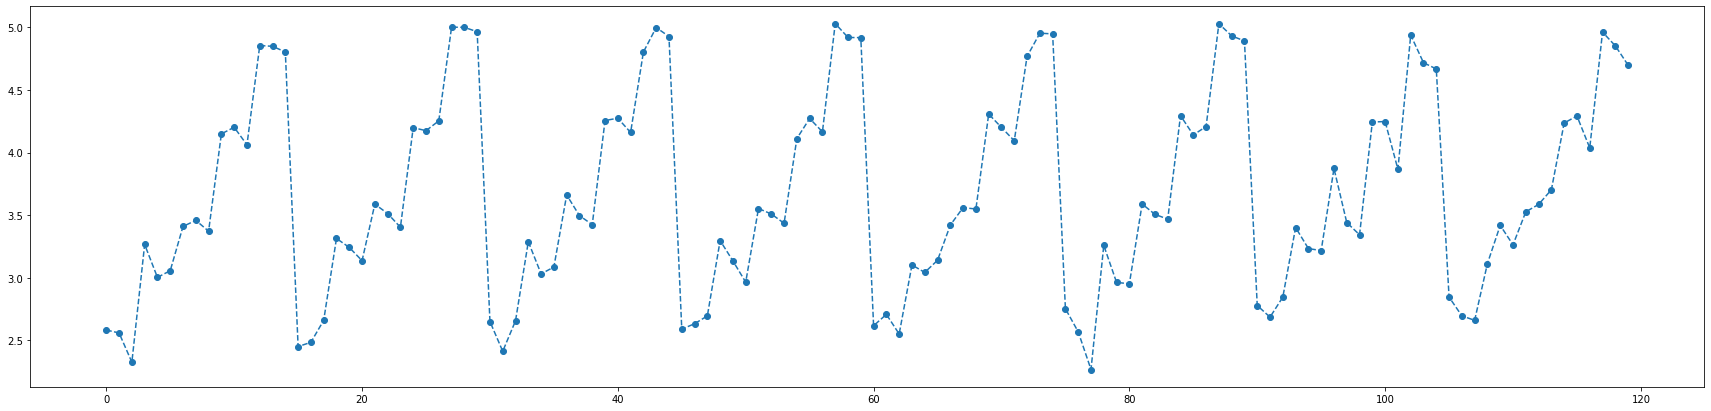

In [0]:
#plot all losses over all models
plt.rc('figure', figsize=(30,7))
plt.plot(all_losses, linestyle='--', marker='o')